**Run it twice.**


*   First time it will make csv file if not exist
*   Second time it will start working


In [ ]:
import requests
from bs4 import BeautifulSoup
import lxml
import csv
import json
import os, time
import pandas as pd

lastlistingpage = 0

with open('pakwheeldataset.csv', 'a', newline='', encoding='utf-8') as csvfile:
  fieldnames = ['Car Name','Rating', 'Exterior & Body', 'Engine/Transmission/Clutch', 'Suspension/Steering',
                'Interior', 'AC/Heater', 'Price', 'Model Date', 'Mileage',
                'Fuel Type', 'Transmission', 'Last Updated Date', 'Offer URL']

  writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

  if csvfile.tell() == 0:
    writer.writeheader()


  # Define the URL of the website you want to scrape
  url = 'https://www.pakwheels.com/used-cars/search/-/cert_pakwheels-certified/'

  # Send an HTTP request and get the website's content
  response = requests.get(url)

  # Parse the HTML content with BeautifulSoup
  soup = BeautifulSoup(response.text, 'html.parser')

  # Use find_all() method to find all <li> elements with the specified class
  lastpage = soup.find_all('li', class_='last next')

  for element in lastpage:
      a_tag = element.find('a')
      if a_tag:
          href = a_tag.get('href')
          page_number = href.split('=')[-1]

  lastpage = page_number
  print("Total pages: ",lastpage)
  lastlistingpage = lastpage
  print()

  ul_elements_with_class = soup.find_all('ul', class_="list-unstyled search-results search-results-mid next-prev car-search-results")


  for ul_element in ul_elements_with_class:
      # Find all list items within the ul element
      list_items = ul_element.find_all('li')

      for li in list_items:
          # Find script tags within each list item
          script_tags = li.find_all('script', type='application/ld+json')

          # Extract data from script tags
          for script in script_tags:
            script_content = script.get_text(strip=True)
            data = json.loads(script_content)

            suburl = data['offers']['url']
            subresponse = requests.get(suburl)
            subsoup = BeautifulSoup(subresponse.text, 'html.parser')

            subb = subsoup.find_all('div', class_="right pull-right primary-lang")
            for div in subb:
             print("Rating:", div.text)
             subb = div.text.strip()

            bar_counts = subsoup.find_all('div', class_="bar-count pull-right")
            arrays = ['Exterior & Body','Engine/Transmission/Clutch','Suspension/Steering','Interior','AC/Heater']
            looper = 0
            for bar_count in bar_counts:
              print(arrays[looper], bar_count.text.strip())
              looper = looper + 1

            div_element = subsoup.find('div', class_='well', id='scroll_car_info')

            # Extract the text from the h1 tag within the div
            if div_element:
              h1_element = div_element.find('h1')
              if h1_element:
                car_name = h1_element.text.strip()
                print("Car Name:", car_name)


            strong_element = subsoup.find('strong', class_='generic-green')

            # Extract the text from the strong and span tags
            if strong_element:
              strong_text = strong_element.text.strip()
              span_text = strong_element.find('span').text.strip()
              print("Price: ", strong_text)


            table = subsoup.find('table', class_='table-engine-detail')
            if table:
              rows = table.find_all('tr')

              for row in rows:
                columns = row.find_all('td')
                if len(columns) == 4:  # Ensure four columns are present
                  model_date = columns[0].find('a').text.strip() if columns[0].find('a') else "N/A"
                  mileage = columns[1].find('p').text.strip() if columns[1].find('p') else "N/A"
                  fuel_type = columns[2].find('a').text.strip() if columns[2].find('a') else "N/A"
                  transmission = columns[3].find('a').text.strip() if columns[3].find('a') else "N/A"

                  print(f"Model Date: {model_date}\nMileage: {mileage}\nFuel Type: {fuel_type}\nTransmission: {transmission}")


            last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')
            if last_updated_label:
              last_updated_date = last_updated_label.find_next_sibling('li').get_text(strip=True)
              print("Last Updated Date:", last_updated_date)
            else:
              print("Last Updated date not found.")


            print("Offer URL:", data['offers']['url'])
            print("---------------- \n")

            print("Page# 1")

            writer.writerow({
              'Car Name': car_name,
              'Rating': subb,
              'Exterior & Body': bar_counts[0].text.strip(),
              'Engine/Transmission/Clutch': bar_counts[1].text.strip(),
              'Suspension/Steering': bar_counts[2].text.strip(),
              'Interior': bar_counts[3].text.strip(),
              'AC/Heater': bar_counts[4].text.strip(),
              'Price': strong_text,
              'Model Date': model_date,
              'Mileage': mileage,
              'Fuel Type': fuel_type,
              'Transmission': transmission,
              'Last Updated Date': last_updated_date,
              'Offer URL': data['offers']['url']
            })

# Read the CSV file into a DataFrame
df = pd.read_csv("pakwheeldataset.csv")

# Remove duplicate rows based on all columns
df = df.drop_duplicates()

# Write the DataFrame back to a CSV file (overwrite the original file)
df.to_csv("pakwheeldataset.csv", index=False)

##############################

loo = 2
for i in range(2,int(lastlistingpage)+1):
  with open('pakwheeldataset.csv', 'a', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['Car Name','Rating', 'Exterior & Body', 'Engine/Transmission/Clutch', 'Suspension/Steering',
                  'Interior', 'AC/Heater', 'Price', 'Model Date', 'Mileage',
                  'Fuel Type', 'Transmission', 'Last Updated Date', 'Offer URL']

    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    if csvfile.tell() == 0:
      writer.writeheader()


    # Define the URL of the website you want to scrape
    url = 'https://www.pakwheels.com/used-cars/search/-/cert_pakwheels-certified/?page='+str(loo)

    # Send an HTTP request and get the website's content
    response = requests.get(url)

    # Parse the HTML content with BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Use find_all() method to find all <li> elements with the specified class
    lastpage = soup.find_all('li', class_='last next')

    for element in lastpage:
        a_tag = element.find('a')
        if a_tag:
            href = a_tag.get('href')
            page_number = href.split('=')[-1]

    lastpage = page_number
    print("Total pages: ",lastpage)
    lastlistingpage = lastpage
    print()

    ul_elements_with_class = soup.find_all('ul', class_="list-unstyled search-results search-results-mid next-prev car-search-results")


    for ul_element in ul_elements_with_class:
        # Find all list items within the ul element
        list_items = ul_element.find_all('li')

        for li in list_items:
            # Find script tags within each list item
            script_tags = li.find_all('script', type='application/ld+json')

            # Extract data from script tags
            for script in script_tags:
              script_content = script.get_text(strip=True)
              data = json.loads(script_content)

              suburl = data['offers']['url']
              subresponse = requests.get(suburl)
              subsoup = BeautifulSoup(subresponse.text, 'html.parser')

              subb = subsoup.find_all('div', class_="right pull-right primary-lang")
              for div in subb:
                print("Rating:", div.text)
                subb = div.text.strip()

              bar_counts = subsoup.find_all('div', class_="bar-count pull-right")
              arrays = ['Exterior & Body','Engine/Transmission/Clutch','Suspension/Steering','Interior','AC/Heater']
              looper = 0
              for bar_count in bar_counts:
                print(arrays[looper], bar_count.text.strip())
                looper = looper + 1

              div_element = subsoup.find('div', class_='well', id='scroll_car_info')

              # Extract the text from the h1 tag within the div
              if div_element:
                h1_element = div_element.find('h1')
                if h1_element:
                  car_name = h1_element.text.strip()
                  print("Car Name:", car_name)


              strong_element = subsoup.find('strong', class_='generic-green')

              # Extract the text from the strong and span tags
              if strong_element:
                strong_text = strong_element.text.strip()
                span_text = strong_element.find('span').text.strip()
                print("Price: ", strong_text)


              table = subsoup.find('table', class_='table-engine-detail')
              if table:
                rows = table.find_all('tr')

                for row in rows:
                  columns = row.find_all('td')
                  if len(columns) == 4:  # Ensure four columns are present
                    model_date = columns[0].find('a').text.strip() if columns[0].find('a') else "N/A"
                    mileage = columns[1].find('p').text.strip() if columns[1].find('p') else "N/A"
                    fuel_type = columns[2].find('a').text.strip() if columns[2].find('a') else "N/A"
                    transmission = columns[3].find('a').text.strip() if columns[3].find('a') else "N/A"

                    print(f"Model Date: {model_date}\nMileage: {mileage}\nFuel Type: {fuel_type}\nTransmission: {transmission}")


              last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')
              if last_updated_label:
                last_updated_date = last_updated_label.find_next_sibling('li').get_text(strip=True)
                print("Last Updated Date:", last_updated_date)
              else:
                print("Last Updated date not found.")


              print("Offer URL:", data['offers']['url'])
              print("---------------- \n")

              print("Page# ",loo)

              writer.writerow({
                'Car Name': car_name,
                'Rating': subb,
                'Exterior & Body': bar_counts[0].text.strip(),
                'Engine/Transmission/Clutch': bar_counts[1].text.strip(),
                'Suspension/Steering': bar_counts[2].text.strip(),
                'Interior': bar_counts[3].text.strip(),
                'AC/Heater': bar_counts[4].text.strip(),
                'Price': strong_text,
                'Model Date': model_date,
                'Mileage': mileage,
                'Fuel Type': fuel_type,
                'Transmission': transmission,
                'Last Updated Date': last_updated_date,
                'Offer URL': data['offers']['url']
              })

              df = pd.read_csv("pakwheeldataset.csv")

              # Remove duplicate rows based on all columns
              df = df.drop_duplicates()

              # Write the DataFrame back to a CSV file (overwrite the original file)
              df.to_csv("pakwheeldataset.csv", index=False)

  # Read the CSV file into a DataFrame
    df = pd.read_csv("pakwheeldataset.csv")

    # Remove duplicate rows based on all columns
    df = df.drop_duplicates()

    # Write the DataFrame back to a CSV file (overwrite the original file)
    df.to_csv("pakwheeldataset.csv", index=False)
    loo = loo + 1
    print("Page# ",loo)


Total pages:  19

Rating: 10/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Land Cruiser ZX Gasoline 3.5L 2022
Price:  PKR 7.98 crore
Model Date: 2022
Mileage: 12,380 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 24, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-land-cruiser-2022-for-sale-in-lahore-7937695
---------------- 

Page# 1


<ipython-input-1-487cb25ea054>:111: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: MG 4 Essence 2024
Price:  PKR 1.29 crore
Model Date: N/A
Mileage: 2,398 km
Fuel Type: N/A
Transmission: Automatic
Last Updated Date: Mar 24, 2024
Offer URL: https://www.pakwheels.com/used-cars/mg-4-2024-for-sale-in-lahore-8470474
---------------- 

Page# 1
Rating: 9.8/10
Exterior & Body 94%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda Fit 1.5 Hybrid S Package 2020
Price:  PKR 69.5 lacs
Model Date: 2020
Mileage: 27,616 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 24, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-fit-2020-for-sale-in-lahore-7954240
---------------- 

Page# 1
Rating: 9.6/10
Exterior & Body 90%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda Vezel Hybrid Z Honda Sensing  2019
Price:  PKR 72.5 lacs
Mod

<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 97%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Daihatsu Move L SA 3 2020
Price:  PKR 33 lacs
Model Date: 2020
Mileage: 43,475 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 24, 2024
Offer URL: https://www.pakwheels.com/used-cars/daihatsu-move-2020-for-sale-in-lahore-8395605
---------------- 

Page#  2


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 89%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: KIA Sportage AWD 2021
Price:  PKR 69.9 lacs
Model Date: 2021
Mileage: 31,064 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 24, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2021-for-sale-in-islamabad-8447102
---------------- 

Page#  2


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Peugeot 2008 Allure 2022
Price:  PKR 69 lacs
Model Date: 2022
Mileage: 10,878 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 24, 2024
Offer URL: https://www.pakwheels.com/used-cars/peugeot-2008-2022-for-sale-in-islamabad-8518672
---------------- 

Page#  2


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.0/10
Exterior & Body 41%
Engine/Transmission/Clutch 98%
Suspension/Steering 100%
Interior 84%
AC/Heater 100%
Car Name: Honda Civic Oriel 1.8 i-VTEC CVT 2020
Price:  PKR 58 lacs
Model Date: 2020
Mileage: 41,624 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 24, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2020-for-sale-in-karachi-8472527
---------------- 

Page#  2


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.1/10
Exterior & Body 70%
Engine/Transmission/Clutch 99%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Honda Civic Oriel 1.8 i-VTEC CVT 2021
Price:  PKR 63 lacs
Model Date: 2021
Mileage: 95,731 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 24, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2021-for-sale-in-lahore-8408521
---------------- 

Page#  2


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Peugeot 2008 Allure 2022
Price:  PKR 67 lacs
Model Date: 2022
Mileage: 25,992 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 24, 2024
Offer URL: https://www.pakwheels.com/used-cars/peugeot-2008-2022-for-sale-in-karachi-8522690
---------------- 

Page#  2


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 98%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 92%
AC/Heater 100%
Car Name: Suzuki Wagon R VXL 2022
Price:  PKR 30.5 lacs
Model Date: 2022
Mileage: 12,498 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 24, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-wagon-r-2022-for-sale-in-islamabad-8508376
---------------- 

Page#  2


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 90%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: Hyundai Sonata 2.0 2023
Price:  PKR 1 crore
Model Date: 2023
Mileage: 17,267 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 24, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-sonata-2023-for-sale-in-islamabad-8511702
---------------- 

Page#  2


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 98%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Honda Civic 1.8 i-VTEC CVT 2017
Price:  PKR 49.9 lacs
Model Date: 2017
Mileage: 21,241 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 24, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2017-for-sale-in-karachi-8496323
---------------- 

Page#  2


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 98%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Fortuner 2.7 G 2021
Price:  PKR 1.52 crore
Model Date: 2021
Mileage: 1,871 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 24, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-fortuner-2021-for-sale-in-karachi-8485294
---------------- 

Page#  2


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 87%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: KIA Sportage AWD 2020
Price:  PKR 69 lacs
Model Date: 2020
Mileage: 58,914 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2020-for-sale-in-peshawar-8519103
---------------- 

Page#  2


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 96%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota C-HR G 2018
Price:  PKR 85 lacs
Model Date: 2018
Mileage: 75,000 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-c-hr-2018-for-sale-in-islamabad-7880335
---------------- 

Page#  2


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.3/10
Exterior & Body 81%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Hilux Revo V Automatic 2.8 2022
Price:  PKR 1.35 crore
Model Date: 2022
Mileage: 24,659 km
Fuel Type: Diesel
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-hilux-2022-for-sale-in-islamabad-8469365
---------------- 

Page#  2


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 84%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda Civic Oriel 1.8 i-VTEC CVT 2018
Price:  PKR 54.5 lacs
Model Date: 2018
Mileage: 63,817 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2018-for-sale-in-rawalpindi-8390993
---------------- 

Page#  2


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 93%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Hyundai Elantra GLS 2023
Price:  PKR 67 lacs
Model Date: 2023
Mileage: 10,257 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-elantra-2023-for-sale-in-islamabad-8523463
---------------- 

Page#  2


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 91%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Suzuki Cultus VXR 2022
Price:  PKR 32 lacs
Model Date: 2022
Mileage: 16,429 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-cultus-2022-for-sale-in-islamabad-8522874
---------------- 

Page#  2


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.4/10
Exterior & Body 82%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Daihatsu Mira LSA 3 2021
Price:  PKR 35 lacs
Model Date: 2021
Mileage: 34,797 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/daihatsu-mira-2021-for-sale-in-lahore-8519312
---------------- 

Page#  2


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Honda City 1.2L CVT 2023
Price:  PKR 50.5 lacs
Model Date: 2023
Mileage: 1,129 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-city-2023-for-sale-in-islamabad-8520433
---------------- 

Page#  2


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 91%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: Honda Civic Oriel 1.8 i-VTEC CVT 2018
Price:  PKR 60 lacs
Model Date: 2018
Mileage: 9,024 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2018-for-sale-in-karachi-8490241
---------------- 

Page#  2


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.9/10
Exterior & Body 66%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Honda Vezel Hybrid Z Honda Sensing  2018
Price:  PKR 72.5 lacs
Model Date: 2018
Mileage: 37,501 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-vezel-2018-for-sale-in-karachi-8430232
---------------- 

Page#  2


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.1/10
Exterior & Body 75%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Honda City 1.5L ASPIRE CVT 2022
Price:  PKR 50 lacs
Model Date: 2022
Mileage: 38,652 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-city-2022-for-sale-in-lahore-8492229
---------------- 

Page#  2


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.4/10
Exterior & Body 50%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Toyota Corolla GLi Automatic 1.3 VVTi 2017
Price:  PKR 40.9 lacs
Model Date: 2017
Mileage: 72,341 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2017-for-sale-in-islamabad-8448041
---------------- 

Page#  2


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 87%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 88%
AC/Heater 100%
Car Name: Suzuki Wagon R VXR 2023
Price:  PKR 31 lacs
Model Date: 2023
Mileage: 13,788 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-wagon-r-2023-for-sale-in-rawalpindi-8515648
---------------- 

Page#  2


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 96%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: KIA Sorento 2.4 FWD 2022
Price:  PKR 83 lacs
Model Date: 2022
Mileage: 38,570 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sorento-2022-for-sale-in-karachi-8522428
---------------- 

Page#  2


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Corolla Altis Grande X CVT-i 1.8 Black Interior 2022
Price:  PKR 73 lacs
Model Date: 2022
Mileage: 30,390 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2022-for-sale-in-peshawar-8424431
---------------- 

Page#  2


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 87%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 90%
AC/Heater 100%
Car Name: Hyundai Sonata 2.5 2021
Price:  PKR 98 lacs
Model Date: 2021
Mileage: 31,952 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-sonata-2021-for-sale-in-rawalpindi-8487224
---------------- 

Page#  2


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 87%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Hyundai Elantra GLS 2022
Price:  PKR 64.5 lacs
Model Date: 2022
Mileage: 19,036 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-elantra-2022-for-sale-in-islamabad-8287543
---------------- 

Page#  2


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: KIA Sportage AWD 2023
Price:  PKR 84.75 lacs
Model Date: 2023
Mileage: 20,005 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2023-for-sale-in-islamabad-8460405
---------------- 

Page#  2


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 98%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: KIA Sportage AWD 2021
Price:  PKR 76 lacs
Model Date: 2021
Mileage: 18,071 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2021-for-sale-in-islamabad-8489288
---------------- 

Page#  2


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: KIA Sportage FWD 2022
Price:  PKR 75 lacs
Model Date: 2022
Mileage: 24,552 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2022-for-sale-in-islamabad-8453300
---------------- 

Page#  2


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 86%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: KIA Sportage FWD 2020
Price:  PKR 77 lacs
Model Date: 2020
Mileage: 8,799 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2020-for-sale-in-islamabad-8366723
---------------- 

Page#  2


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Land Cruiser ZX Gasoline 3.5L 2023
Price:  PKR 8.65 crore
Model Date: 2023
Mileage: 3,763 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-land-cruiser-2023-for-sale-in-islamabad-8351985
---------------- 

Page#  2


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Page#  3
Total pages:  19

Rating: 9.6/10
Exterior & Body 87%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: KIA Sportage AWD 2020
Price:  PKR 69 lacs
Model Date: 2020
Mileage: 58,914 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2020-for-sale-in-peshawar-8519103
---------------- 

Page#  3


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 96%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota C-HR G 2018
Price:  PKR 85 lacs
Model Date: 2018
Mileage: 75,000 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-c-hr-2018-for-sale-in-islamabad-7880335
---------------- 

Page#  3


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.3/10
Exterior & Body 81%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Hilux Revo V Automatic 2.8 2022
Price:  PKR 1.35 crore
Model Date: 2022
Mileage: 24,659 km
Fuel Type: Diesel
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-hilux-2022-for-sale-in-islamabad-8469365
---------------- 

Page#  3


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 84%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda Civic Oriel 1.8 i-VTEC CVT 2018
Price:  PKR 54.5 lacs
Model Date: 2018
Mileage: 63,817 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2018-for-sale-in-rawalpindi-8390993
---------------- 

Page#  3


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 93%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Hyundai Elantra GLS 2023
Price:  PKR 67 lacs
Model Date: 2023
Mileage: 10,257 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-elantra-2023-for-sale-in-islamabad-8523463
---------------- 

Page#  3


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 91%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Suzuki Cultus VXR 2022
Price:  PKR 32 lacs
Model Date: 2022
Mileage: 16,429 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-cultus-2022-for-sale-in-islamabad-8522874
---------------- 

Page#  3


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.4/10
Exterior & Body 82%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Daihatsu Mira LSA 3 2021
Price:  PKR 35 lacs
Model Date: 2021
Mileage: 34,797 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/daihatsu-mira-2021-for-sale-in-lahore-8519312
---------------- 

Page#  3


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Honda City 1.2L CVT 2023
Price:  PKR 50.5 lacs
Model Date: 2023
Mileage: 1,129 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-city-2023-for-sale-in-islamabad-8520433
---------------- 

Page#  3


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.1/10
Exterior & Body 75%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Honda City 1.5L ASPIRE CVT 2022
Price:  PKR 50 lacs
Model Date: 2022
Mileage: 38,652 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-city-2022-for-sale-in-lahore-8492229
---------------- 

Page#  3


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.4/10
Exterior & Body 50%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Toyota Corolla GLi Automatic 1.3 VVTi 2017
Price:  PKR 40.9 lacs
Model Date: 2017
Mileage: 72,341 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2017-for-sale-in-islamabad-8448041
---------------- 

Page#  3


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 85%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Fortuner 2.7 V 2021
Price:  PKR 1.48 crore
Model Date: 2021
Mileage: 40,628 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-fortuner-2021-for-sale-in-rawalpindi-8468348
---------------- 

Page#  3


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.8/10
Exterior & Body 59%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda Civic Turbo 1.5 VTEC CVT 2016
Price:  PKR 55 lacs
Model Date: 2016
Mileage: 33,539 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2016-for-sale-in-islamabad-8413135
---------------- 

Page#  3


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 95%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Suzuki Alto VXL AGS 2022
Price:  PKR 30 lacs
Model Date: 2022
Mileage: 18,837 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-alto-2022-for-sale-in-rawalpindi-8504065
---------------- 

Page#  3


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Prado TX L Package 2.7 2018
Price:  PKR 3.25 crore
Model Date: 2018
Mileage: 24,329 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-prado-2018-for-sale-in-islamabad-8294126
---------------- 

Page#  3


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.8/10
Exterior & Body 64%
Engine/Transmission/Clutch 98%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda Civic 1.8 i-VTEC CVT 2020
Price:  PKR 56.5 lacs
Model Date: 2020
Mileage: 61,774 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2020-for-sale-in-islamabad-8358076
---------------- 

Page#  3


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.1/10
Exterior & Body 76%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 85%
AC/Heater 100%
Car Name: Daihatsu Mira X 2019
Price:  PKR 38 lacs
Model Date: 2019
Mileage: 42,449 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/daihatsu-mira-2019-for-sale-in-islamabad-8306475
---------------- 

Page#  3


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Daihatsu Move X SA 2 2020
Price:  PKR 35.5 lacs
Model Date: 2020
Mileage: 14,518 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/daihatsu-move-2020-for-sale-in-islamabad-8321117
---------------- 

Page#  3


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 94%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Passo X S  2020
Price:  PKR 44 lacs
Model Date: 2020
Mileage: 15,720 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-passo-2020-for-sale-in-lahore-8519901
---------------- 

Page#  3


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.1/10
Exterior & Body 71%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: Suzuki Wagon R VXL 2019
Price:  PKR 26 lacs
Model Date: 2019
Mileage: 36,202 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-wagon-r-2019-for-sale-in-islamabad-8420763
---------------- 

Page#  3


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 94%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Peugeot 2008 Allure 2022
Price:  PKR 69.5 lacs
Model Date: 2022
Mileage: 15,959 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/peugeot-2008-2022-for-sale-in-islamabad-8381830
---------------- 

Page#  3


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: KIA Sportage Black Limited Edition 2024
Price:  PKR 92 lacs
Model Date: N/A
Mileage: 1,776 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2024-for-sale-in-islamabad-8328105
---------------- 

Page#  3


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Changan Karvaan Plus 2023
Price:  PKR 32 lacs
Model Date: 2023
Mileage: 6,217 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/changan-karvaan-2023-for-sale-in-islamabad-8457626
---------------- 

Page#  3


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Suzuki Wagon R VXR 2023
Price:  PKR 30.5 lacs
Model Date: 2023
Mileage: 44 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-wagon-r-2023-for-sale-in-islamabad-8252857
---------------- 

Page#  3


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: MG HS Essence 2024
Price:  PKR 81 lacs
Model Date: N/A
Mileage: 2,688 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/mg-hs-2024-for-sale-in-islamabad-8391864
---------------- 

Page#  3


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 95%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda City 1.5L ASPIRE CVT 2021
Price:  PKR 53.5 lacs
Model Date: 2021
Mileage: 4,250 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-city-2021-for-sale-in-islamabad-8279487
---------------- 

Page#  3


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: Changan Oshan X7 FutureSense 2022
Price:  PKR 90 lacs
Model Date: 2022
Mileage: 8,310 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/changan-oshan-x7-2022-for-sale-in-islamabad-8270990
---------------- 

Page#  3


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.0/10
Exterior & Body 68%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Changan Alsvin 1.5L DCT Lumiere 2022
Price:  PKR 42.8 lacs
Model Date: 2022
Mileage: 25,095 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/changan-alsvin-2022-for-sale-in-islamabad-8051114
---------------- 

Page#  3


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 92%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: Toyota C-HR G 2017
Price:  PKR 82 lacs
Model Date: 2017
Mileage: 66,855 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-c-hr-2017-for-sale-in-islamabad-8433380
---------------- 

Page#  3


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 87%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Changan Oshan X7 FutureSense 2022
Price:  PKR 85 lacs
Model Date: 2022
Mileage: 8,977 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/changan-oshan-x7-2022-for-sale-in-islamabad-8324996
---------------- 

Page#  3


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 93%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: Suzuki Alto VXL AGS 2022
Price:  PKR 30 lacs
Model Date: 2022
Mileage: 10,640 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-alto-2022-for-sale-in-rawalpindi-8448006
---------------- 

Page#  3


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 89%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 91%
AC/Heater 100%
Car Name: Suzuki Cultus VXL 2021
Price:  PKR 35.8 lacs
Model Date: 2021
Mileage: 40,266 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-cultus-2021-for-sale-in-islamabad-8430899
---------------- 

Page#  3


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.4/10
Exterior & Body 81%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Honda Civic Oriel 1.8 i-VTEC CVT 2021
Price:  PKR 76 lacs
Model Date: 2021
Mileage: 22,328 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2021-for-sale-in-islamabad-8370565
---------------- 

Page#  3


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.3/10
Exterior & Body 76%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Nissan Leaf 2020
Price:  PKR 98 lacs
Model Date: 2020
Mileage: 54,006 km
Fuel Type: N/A
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/nissan-leaf-2020-for-sale-in-islamabad-8430642
---------------- 

Page#  3


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda Civic RS 2023
Price:  PKR 1 crore
Model Date: 2023
Mileage: 44 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2023-for-sale-in-rawalpindi-8448663
---------------- 

Page#  3


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.1/10
Exterior & Body 75%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 86%
AC/Heater 100%
Car Name: Toyota Corolla GLi 1.3 VVTi Special Edition 2018
Price:  PKR 45 lacs
Model Date: 2018
Mileage: 65,339 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2018-for-sale-in-islamabad-8423875
---------------- 

Page#  3
Page#  4


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Total pages:  19

Rating: 9.5/10
Exterior & Body 87%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 88%
AC/Heater 100%
Car Name: Suzuki Wagon R VXR 2023
Price:  PKR 31 lacs
Model Date: 2023
Mileage: 13,788 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-wagon-r-2023-for-sale-in-rawalpindi-8515648
---------------- 

Page#  4


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 96%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: KIA Sorento 2.4 FWD 2022
Price:  PKR 83 lacs
Model Date: 2022
Mileage: 38,570 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sorento-2022-for-sale-in-karachi-8522428
---------------- 

Page#  4


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Corolla Altis Grande X CVT-i 1.8 Black Interior 2022
Price:  PKR 73 lacs
Model Date: 2022
Mileage: 30,390 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2022-for-sale-in-peshawar-8424431
---------------- 

Page#  4


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 87%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 90%
AC/Heater 100%
Car Name: Hyundai Sonata 2.5 2021
Price:  PKR 98 lacs
Model Date: 2021
Mileage: 31,952 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-sonata-2021-for-sale-in-rawalpindi-8487224
---------------- 

Page#  4


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 87%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Hyundai Elantra GLS 2022
Price:  PKR 64.5 lacs
Model Date: 2022
Mileage: 19,036 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-elantra-2022-for-sale-in-islamabad-8287543
---------------- 

Page#  4


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: KIA Sportage AWD 2023
Price:  PKR 84.75 lacs
Model Date: 2023
Mileage: 20,005 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2023-for-sale-in-islamabad-8460405
---------------- 

Page#  4


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 98%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: KIA Sportage AWD 2021
Price:  PKR 76 lacs
Model Date: 2021
Mileage: 18,071 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2021-for-sale-in-islamabad-8489288
---------------- 

Page#  4


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: KIA Sportage FWD 2022
Price:  PKR 75 lacs
Model Date: 2022
Mileage: 24,552 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2022-for-sale-in-islamabad-8453300
---------------- 

Page#  4


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 86%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: KIA Sportage FWD 2020
Price:  PKR 77 lacs
Model Date: 2020
Mileage: 8,799 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2020-for-sale-in-islamabad-8366723
---------------- 

Page#  4


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 85%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Fortuner 2.7 V 2021
Price:  PKR 1.48 crore
Model Date: 2021
Mileage: 40,628 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-fortuner-2021-for-sale-in-rawalpindi-8468348
---------------- 

Page#  4


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.8/10
Exterior & Body 59%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda Civic Turbo 1.5 VTEC CVT 2016
Price:  PKR 55 lacs
Model Date: 2016
Mileage: 33,539 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2016-for-sale-in-islamabad-8413135
---------------- 

Page#  4


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 95%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Suzuki Alto VXL AGS 2022
Price:  PKR 30 lacs
Model Date: 2022
Mileage: 18,837 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-alto-2022-for-sale-in-rawalpindi-8504065
---------------- 

Page#  4


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 89%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 88%
AC/Heater 100%
Car Name: Daihatsu Mira LSA 3 2021
Price:  PKR 37.5 lacs
Model Date: 2021
Mileage: 6,219 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/daihatsu-mira-2021-for-sale-in-islamabad-8464260
---------------- 

Page#  4


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.9/10
Exterior & Body 64%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Raize 2022
Price:  PKR 73 lacs
Model Date: 2022
Mileage: 15,886 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-raize-2022-for-sale-in-islamabad-8433226
---------------- 

Page#  4


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 96%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Proton X70 Premium FWD 2022
Price:  PKR 84 lacs
Model Date: 2022
Mileage: 3,503 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/proton-x70-2022-for-sale-in-rawalpindi-8455495
---------------- 

Page#  4


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.1/10
Exterior & Body 73%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 93%
AC/Heater 100%
Car Name: Daihatsu Mira X SA lll 2022
Price:  PKR 37.5 lacs
Model Date: 2022
Mileage: 23,177 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/daihatsu-mira-2022-for-sale-in-islamabad-8252930
---------------- 

Page#  4


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Suzuki Wagon R VXL 2023
Price:  PKR 32.5 lacs
Model Date: 2023
Mileage: 17,380 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-wagon-r-2023-for-sale-in-islamabad-8472933
---------------- 

Page#  4


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 85%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Haval H6 2.0T AWD 2023
Price:  PKR 1.05 crore
Model Date: 2023
Mileage: 15,482 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/haval-h6-2023-for-sale-in-rawalpindi-8472668
---------------- 

Page#  4


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 7.8/10
Exterior & Body 37%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 85%
AC/Heater 100%
Car Name: Suzuki Cultus Auto Gear Shift 2022
Price:  PKR 33 lacs
Model Date: 2022
Mileage: 32,514 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-cultus-2022-for-sale-in-islamabad-8461931
---------------- 

Page#  4


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 96%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Honda BR-V i-VTEC S 2022
Price:  PKR 57 lacs
Model Date: 2022
Mileage: 21,057 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-br-v-2022-for-sale-in-islamabad-8458630
---------------- 

Page#  4


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.9/10
Exterior & Body 67%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 90%
AC/Heater 100%
Car Name: Toyota Corolla Altis X Automatic 1.6 2021
Price:  PKR 55 lacs
Model Date: 2021
Mileage: 77,535 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2021-for-sale-in-islamabad-8399535
---------------- 

Page#  4


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 98%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Honda City 1.2L M/T 2021
Price:  PKR 43.5 lacs
Model Date: 2021
Mileage: 11,256 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-city-2021-for-sale-in-islamabad-8436782
---------------- 

Page#  4


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: MG HS Essence 2023
Price:  PKR 81 lacs
Model Date: 2023
Mileage: 976 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/mg-hs-2023-for-sale-in-rawalpindi-8423745
---------------- 

Page#  4


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 83%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Suzuki Wagon R Hybrid FX 2022
Price:  PKR 41.5 lacs
Model Date: 2022
Mileage: 12,869 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-wagon-r-2022-for-sale-in-rawalpindi-8269900
---------------- 

Page#  4


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 98%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Suzuki Alto L 2021
Price:  PKR 34 lacs
Model Date: 2021
Mileage: 4,630 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-alto-2021-for-sale-in-rawalpindi-8261383
---------------- 

Page#  4


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.3/10
Exterior & Body 47%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: Honda Civic Oriel 1.8 i-VTEC CVT 2020
Price:  PKR 58 lacs
Model Date: 2020
Mileage: 87,950 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2020-for-sale-in-islamabad-8382452
---------------- 

Page#  4


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 87%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Suzuki Wagon R VXL 2018
Price:  PKR 27 lacs
Model Date: 2018
Mileage: 9,384 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-wagon-r-2018-for-sale-in-islamabad-8352759
---------------- 

Page#  4


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.0/10
Exterior & Body 33%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Toyota Corolla GLi 1.3 VVTi 2015
Price:  PKR 35.5 lacs
Model Date: 2015
Mileage: 110,510 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2015-for-sale-in-islamabad-8482768
---------------- 

Page#  4


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.2/10
Exterior & Body 75%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: Haval H6 2.0T AWD 2023
Price:  PKR 1.05 crore
Model Date: 2023
Mileage: 24,645 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/haval-h6-2023-for-sale-in-islamabad-8411684
---------------- 

Page#  4


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.2/10
Exterior & Body 72%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Prado TX Limited 2.7 2016
Price:  PKR 2.4 crore
Model Date: 2016
Mileage: 82,012 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-prado-2016-for-sale-in-rawalpindi-8461223
---------------- 

Page#  4


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 97%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda Civic Oriel 1.8 i-VTEC CVT 2021
Price:  PKR 73 lacs
Model Date: 2021
Mileage: 22,989 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2021-for-sale-in-islamabad-8448331
---------------- 

Page#  4


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.3/10
Exterior & Body 84%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 83%
AC/Heater 100%
Car Name: Suzuki Alto VXL AGS 2022
Price:  PKR 28.5 lacs
Model Date: 2022
Mileage: 68,970 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-alto-2022-for-sale-in-islamabad-8495663
---------------- 

Page#  4


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 93%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota C-HR G-LED 2018
Price:  PKR 84 lacs
Model Date: 2018
Mileage: 51,396 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-c-hr-2018-for-sale-in-lahore-8436836
---------------- 

Page#  4


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.3/10
Exterior & Body 78%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Suzuki Cultus VXR 2022
Price:  PKR 32.9 lacs
Model Date: 2022
Mileage: 27,036 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-cultus-2022-for-sale-in-rawalpindi-8491649
---------------- 

Page#  4


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.8/10
Exterior & Body 67%
Engine/Transmission/Clutch 98%
Suspension/Steering 100%
Interior 92%
AC/Heater 100%
Car Name: Changan Karvaan Plus 2022
Price:  PKR 24.5 lacs
Model Date: 2022
Mileage: 51,622 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/changan-karvaan-2022-for-sale-in-islamabad-8495947
---------------- 

Page#  4


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.3/10
Exterior & Body 75%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Yaris ATIV X CVT 1.5 2020
Price:  PKR 44 lacs
Model Date: 2020
Mileage: 67,552 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-yaris-2020-for-sale-in-islamabad-8361960
---------------- 

Page#  4


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 86%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Corolla Altis Grande CVT-i 1.8 2016
Price:  PKR 50 lacs
Model Date: 2016
Mileage: 18,566 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2016-for-sale-in-islamabad-8519436
---------------- 

Page#  4
Page#  5


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Total pages:  19

Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Prado TX L Package 2.7 2018
Price:  PKR 3.25 crore
Model Date: 2018
Mileage: 24,329 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-prado-2018-for-sale-in-islamabad-8294126
---------------- 

Page#  5


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.1/10
Exterior & Body 76%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 85%
AC/Heater 100%
Car Name: Daihatsu Mira X 2019
Price:  PKR 38 lacs
Model Date: 2019
Mileage: 42,449 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/daihatsu-mira-2019-for-sale-in-islamabad-8306475
---------------- 

Page#  5


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Daihatsu Move X SA 2 2020
Price:  PKR 35.5 lacs
Model Date: 2020
Mileage: 14,518 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/daihatsu-move-2020-for-sale-in-islamabad-8321117
---------------- 

Page#  5


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 94%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Passo X S  2020
Price:  PKR 44 lacs
Model Date: 2020
Mileage: 15,720 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-passo-2020-for-sale-in-lahore-8519901
---------------- 

Page#  5


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.1/10
Exterior & Body 71%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: Suzuki Wagon R VXL 2019
Price:  PKR 26 lacs
Model Date: 2019
Mileage: 36,202 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-wagon-r-2019-for-sale-in-islamabad-8420763
---------------- 

Page#  5


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 94%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Peugeot 2008 Allure 2022
Price:  PKR 69.5 lacs
Model Date: 2022
Mileage: 15,959 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/peugeot-2008-2022-for-sale-in-islamabad-8381830
---------------- 

Page#  5


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: KIA Sportage Black Limited Edition 2024
Price:  PKR 92 lacs
Model Date: N/A
Mileage: 1,776 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2024-for-sale-in-islamabad-8328105
---------------- 

Page#  5


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Changan Karvaan Plus 2023
Price:  PKR 32 lacs
Model Date: 2023
Mileage: 6,217 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/changan-karvaan-2023-for-sale-in-islamabad-8457626
---------------- 

Page#  5


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Suzuki Wagon R VXR 2023
Price:  PKR 30.5 lacs
Model Date: 2023
Mileage: 44 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-wagon-r-2023-for-sale-in-islamabad-8252857
---------------- 

Page#  5


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: MG HS Essence 2024
Price:  PKR 81 lacs
Model Date: N/A
Mileage: 2,688 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/mg-hs-2024-for-sale-in-islamabad-8391864
---------------- 

Page#  5


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 95%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda City 1.5L ASPIRE CVT 2021
Price:  PKR 53.5 lacs
Model Date: 2021
Mileage: 4,250 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-city-2021-for-sale-in-islamabad-8279487
---------------- 

Page#  5


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: Changan Oshan X7 FutureSense 2022
Price:  PKR 90 lacs
Model Date: 2022
Mileage: 8,310 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/changan-oshan-x7-2022-for-sale-in-islamabad-8270990
---------------- 

Page#  5


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 90%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda HR-V VTi-S 2023
Price:  PKR 69.5 lacs
Model Date: 2023
Mileage: 24,090 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-hr-v-2023-for-sale-in-lahore-8383973
---------------- 

Page#  5


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 92%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Vitz F M Package 1.0 2018
Price:  PKR 41 lacs
Model Date: 2018
Mileage: 43,287 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-vitz-2018-for-sale-in-lahore-8467697
---------------- 

Page#  5


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 86%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 96%
AC/Heater 100%
Car Name: Toyota Hilux Revo V Automatic 2.8 2021
Price:  PKR 1.28 crore
Model Date: 2021
Mileage: 9,851 km
Fuel Type: Diesel
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-hilux-2021-for-sale-in-karachi-8048263
---------------- 

Page#  5


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 98%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Land Cruiser AX G Selection 2019
Price:  PKR 4.79 crore
Model Date: 2019
Mileage: 35,394 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-land-cruiser-2019-for-sale-in-karachi-8347939
---------------- 

Page#  5


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.3/10
Exterior & Body 75%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 99%
AC/Heater 100%
Car Name: Ford F 150 Raptor 5.0L 2018
Price:  PKR 2.45 crore
Model Date: 2018
Mileage: 83,221 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/ford-f-150-2018-for-sale-in-karachi-8260454
---------------- 

Page#  5


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 85%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Toyota Prado TX L Package 2.7 2013
Price:  PKR 2.08 crore
Model Date: 2013
Mileage: 31,813 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-prado-2013-for-sale-in-karachi-8512432
---------------- 

Page#  5


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 91%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 99%
AC/Heater 100%
Car Name: Toyota Land Cruiser 2004
Price:  PKR 1.45 crore
Model Date: 2004
Mileage: 99,000 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-land-cruiser-2004-for-sale-in-hyderabad-8454965
---------------- 

Page#  5


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 86%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Audi A4 1.4 TFSI  2019
Price:  PKR 1.48 crore
Model Date: 2019
Mileage: 40,632 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/audi-a4-2019-for-sale-in-lahore-8295805
---------------- 

Page#  5


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 96%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda Civic 1.8 i-VTEC CVT 2021
Price:  PKR 62 lacs
Model Date: 2021
Mileage: 31,294 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2021-for-sale-in-lahore-8516143
---------------- 

Page#  5


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 88%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Nissan Dayz 2022
Price:  PKR 39 lacs
Model Date: 2022
Mileage: 12,910 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/nissan-dayz-2022-for-sale-in-lahore-8514821
---------------- 

Page#  5


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Proton Saga 1.3L Ace A/T 2023
Price:  PKR 36.7 lacs
Model Date: 2023
Mileage: 48 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/proton-saga-2023-for-sale-in-lahore-8259390
---------------- 

Page#  5


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 91%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: KIA Sportage AWD 2021
Price:  PKR 78 lacs
Model Date: 2021
Mileage: 26,578 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2021-for-sale-in-faisalabad-8493206
---------------- 

Page#  5


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.9/10
Exterior & Body 73%
Engine/Transmission/Clutch 98%
Suspension/Steering 100%
Interior 89%
AC/Heater 100%
Car Name: Changan Karvaan Base Model 1.0 2021
Price:  PKR 23.5 lacs
Model Date: 2021
Mileage: 32,335 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/changan-karvaan-2021-for-sale-in-karachi-8507601
---------------- 

Page#  5


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 93%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Toyota Prado TX 2.7 2018
Price:  PKR 2.52 crore
Model Date: 2018
Mileage: 34,037 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-prado-2018-for-sale-in-karachi-8364224
---------------- 

Page#  5


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 92%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 90%
AC/Heater 100%
Car Name: Proton X70 Premium FWD 2022
Price:  PKR 68 lacs
Model Date: 2022
Mileage: 34,895 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/proton-x70-2022-for-sale-in-karachi-8488510
---------------- 

Page#  5


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.3/10
Exterior & Body 82%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 91%
AC/Heater 100%
Car Name: Suzuki Cultus VXL 2021
Price:  PKR 34 lacs
Model Date: 2021
Mileage: 47,265 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-cultus-2021-for-sale-in-lahore-8481981
---------------- 

Page#  5


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Toyota Yaris Hatchback G 1.0 2020
Price:  PKR 50 lacs
Model Date: 2020
Mileage: 43,463 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-yaris-hatchback-2020-for-sale-in-karachi-8470004
---------------- 

Page#  5


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 94%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: MG HS 1.5 Turbo 2021
Price:  PKR 68.5 lacs
Model Date: 2021
Mileage: 40,219 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/mg-hs-2021-for-sale-in-lahore-8515583
---------------- 

Page#  5


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 87%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Toyota Yaris Hatchback G 1.0 2020
Price:  PKR 55 lacs
Model Date: 2020
Mileage: 35,134 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-yaris-hatchback-2020-for-sale-in-karachi-8519012
---------------- 

Page#  5


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda City 1.5L ASPIRE CVT 2022
Price:  PKR 55 lacs
Model Date: 2022
Mileage: 908 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-city-2022-for-sale-in-karachi-8398200
---------------- 

Page#  5


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 7.8/10
Exterior & Body 35%
Engine/Transmission/Clutch 98%
Suspension/Steering 100%
Interior 85%
AC/Heater 100%
Car Name: Suzuki Ciaz Automatic 2019
Price:  PKR 36 lacs
Model Date: 2019
Mileage: 92,782 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-ciaz-2019-for-sale-in-karachi-8485143
---------------- 

Page#  5


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 87%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 99%
AC/Heater 100%
Car Name: Toyota Passo X L Package S  2020
Price:  PKR 41.8 lacs
Model Date: 2020
Mileage: 65,909 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-passo-2020-for-sale-in-rawalpindi-8326595
---------------- 

Page#  5


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Corolla Cross 1.8 HEV X 2024
Price:  PKR 1.06 crore
Model Date: N/A
Mileage: 1,934 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-cross-2024-for-sale-in-lahore-8515545
---------------- 

Page#  5


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 90%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: Toyota Roomy XS 2020
Price:  PKR 41.75 lacs
Model Date: 2020
Mileage: 23,788 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-roomy-2020-for-sale-in-lahore-8444154
---------------- 

Page#  5
Page#  6


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Total pages:  19

Rating: 9.0/10
Exterior & Body 68%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Changan Alsvin 1.5L DCT Lumiere 2022
Price:  PKR 42.8 lacs
Model Date: 2022
Mileage: 25,095 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/changan-alsvin-2022-for-sale-in-islamabad-8051114
---------------- 

Page#  6


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 92%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: Toyota C-HR G 2017
Price:  PKR 82 lacs
Model Date: 2017
Mileage: 66,855 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-c-hr-2017-for-sale-in-islamabad-8433380
---------------- 

Page#  6


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 87%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Changan Oshan X7 FutureSense 2022
Price:  PKR 85 lacs
Model Date: 2022
Mileage: 8,977 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/changan-oshan-x7-2022-for-sale-in-islamabad-8324996
---------------- 

Page#  6


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 93%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: Suzuki Alto VXL AGS 2022
Price:  PKR 30 lacs
Model Date: 2022
Mileage: 10,640 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-alto-2022-for-sale-in-rawalpindi-8448006
---------------- 

Page#  6


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 89%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 91%
AC/Heater 100%
Car Name: Suzuki Cultus VXL 2021
Price:  PKR 35.8 lacs
Model Date: 2021
Mileage: 40,266 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-cultus-2021-for-sale-in-islamabad-8430899
---------------- 

Page#  6


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.4/10
Exterior & Body 81%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Honda Civic Oriel 1.8 i-VTEC CVT 2021
Price:  PKR 76 lacs
Model Date: 2021
Mileage: 22,328 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2021-for-sale-in-islamabad-8370565
---------------- 

Page#  6


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.3/10
Exterior & Body 76%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Nissan Leaf 2020
Price:  PKR 98 lacs
Model Date: 2020
Mileage: 54,006 km
Fuel Type: N/A
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/nissan-leaf-2020-for-sale-in-islamabad-8430642
---------------- 

Page#  6


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda Civic RS 2023
Price:  PKR 1 crore
Model Date: 2023
Mileage: 44 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2023-for-sale-in-rawalpindi-8448663
---------------- 

Page#  6


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.1/10
Exterior & Body 75%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 86%
AC/Heater 100%
Car Name: Toyota Corolla GLi 1.3 VVTi Special Edition 2018
Price:  PKR 45 lacs
Model Date: 2018
Mileage: 65,339 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2018-for-sale-in-islamabad-8423875
---------------- 

Page#  6


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 89%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 88%
AC/Heater 100%
Car Name: Daihatsu Mira LSA 3 2021
Price:  PKR 37.5 lacs
Model Date: 2021
Mileage: 6,219 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/daihatsu-mira-2021-for-sale-in-islamabad-8464260
---------------- 

Page#  6


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.9/10
Exterior & Body 64%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Raize 2022
Price:  PKR 73 lacs
Model Date: 2022
Mileage: 15,886 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-raize-2022-for-sale-in-islamabad-8433226
---------------- 

Page#  6


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 96%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Proton X70 Premium FWD 2022
Price:  PKR 84 lacs
Model Date: 2022
Mileage: 3,503 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/proton-x70-2022-for-sale-in-rawalpindi-8455495
---------------- 

Page#  6


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.8/10
Exterior & Body 62%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: Toyota Yaris GLI MT 1.3 2021
Price:  PKR 36.5 lacs
Model Date: 2021
Mileage: 37,516 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-yaris-2021-for-sale-in-karachi-8363667
---------------- 

Page#  6


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 97%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: MG ZS EV Luxury 2022
Price:  PKR 90 lacs
Model Date: 2022
Mileage: 30,983 km
Fuel Type: N/A
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/mg-zs-ev-2022-for-sale-in-lahore-8497191
---------------- 

Page#  6


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 94%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 96%
AC/Heater 100%
Car Name: Changan Alsvin 1.5L DCT Lumiere 2021
Price:  PKR 41 lacs
Model Date: 2021
Mileage: 9,611 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/changan-alsvin-2021-for-sale-in-lahore-8436567
---------------- 

Page#  6


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.2/10
Exterior & Body 84%
Engine/Transmission/Clutch 98%
Suspension/Steering 96%
Interior 91%
AC/Heater 100%
Car Name: Toyota Corolla Altis X CVT-i 1.8 2021
Price:  PKR 65 lacs
Model Date: 2021
Mileage: 62,188 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2021-for-sale-in-lahore-8517082
---------------- 

Page#  6


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.3/10
Exterior & Body 77%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda City 1.5L ASPIRE CVT 2022
Price:  PKR 52.5 lacs
Model Date: 2022
Mileage: 11,261 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-city-2022-for-sale-in-lahore-8381276
---------------- 

Page#  6


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 85%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 94%
AC/Heater 100%
Car Name: KIA Picanto 1.0 AT 2021
Price:  PKR 35.4 lacs
Model Date: 2021
Mileage: 3,757 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-picanto-2021-for-sale-in-lahore-8394598
---------------- 

Page#  6


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 87%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: Honda HR-V VTi-S 2023
Price:  PKR 73 lacs
Model Date: 2023
Mileage: 10,731 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-hr-v-2023-for-sale-in-lahore-8404716
---------------- 

Page#  6


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Suzuki Swift GL Manual 2022
Price:  PKR 41.5 lacs
Model Date: 2022
Mileage: 2,758 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-swift-2022-for-sale-in-karachi-8401775
---------------- 

Page#  6


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 85%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 94%
AC/Heater 100%
Car Name: Suzuki Swift GLX CVT 2022
Price:  PKR 46 lacs
Model Date: 2022
Mileage: 22,596 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-swift-2022-for-sale-in-karachi-8412679
---------------- 

Page#  6


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.3/10
Exterior & Body 78%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Peugeot 2008 Active 2022
Price:  PKR 61 lacs
Model Date: 2022
Mileage: 53,983 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/peugeot-2008-2022-for-sale-in-karachi-8441952
---------------- 

Page#  6


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 92%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 99%
AC/Heater 100%
Car Name: Honda Vezel Hybrid RS Honda Sensing  2018
Price:  PKR 83 lacs
Model Date: 2018
Mileage: 69,317 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-vezel-2018-for-sale-in-gujranwala-8395364
---------------- 

Page#  6


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 90%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Prado TX L Package 2.7 2019
Price:  PKR 3.3 crore
Model Date: 2019
Mileage: 51,007 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-prado-2019-for-sale-in-lahore-8424155
---------------- 

Page#  6


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 90%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda City 1.5L ASPIRE CVT 2022
Price:  PKR 53 lacs
Model Date: 2022
Mileage: 7,113 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-city-2022-for-sale-in-lahore-8416512
---------------- 

Page#  6


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.9/10
Exterior & Body 64%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Suzuki Wagon R AGS 2021
Price:  PKR 35 lacs
Model Date: 2021
Mileage: 14,150 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-wagon-r-2021-for-sale-in-lahore-8410022
---------------- 

Page#  6


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.4/10
Exterior & Body 81%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda Civic Oriel 2022
Price:  PKR 80 lacs
Model Date: 2022
Mileage: 5,723 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2022-for-sale-in-lahore-8394579
---------------- 

Page#  6


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Fortuner 2.8 Sigma 4 2022
Price:  PKR 1.66 crore
Model Date: 2022
Mileage: 25,048 km
Fuel Type: Diesel
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-fortuner-2022-for-sale-in-karachi-8479483
---------------- 

Page#  6


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.1/10
Exterior & Body 76%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 90%
AC/Heater 100%
Car Name: KIA Stonic EX+ 2022
Price:  PKR 55 lacs
Model Date: 2022
Mileage: 23,135 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-stonic-2022-for-sale-in-lahore-8485321
---------------- 

Page#  6


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Suzuki Wagon R 2022
Price:  PKR 40.95 lacs
Model Date: 2022
Mileage: 17,000 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-wagon-r-2022-for-sale-in-islamabad-8221694
---------------- 

Page#  6


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.4/10
Exterior & Body 85%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Toyota Aqua G 2018
Price:  PKR 57 lacs
Model Date: 2018
Mileage: 53,664 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-aqua-2018-for-sale-in-islamabad-8515847
---------------- 

Page#  6


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 86%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Suzuki Alto VXR 2023
Price:  PKR 27.75 lacs
Model Date: 2023
Mileage: 8,424 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-alto-2023-for-sale-in-islamabad-8515538
---------------- 

Page#  6


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 88%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Daihatsu Taft 2020
Price:  PKR 42 lacs
Model Date: 2020
Mileage: 32,710 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/daihatsu-taft-2020-for-sale-in-karachi-8504612
---------------- 

Page#  6


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.4/10
Exterior & Body 84%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 89%
AC/Heater 100%
Car Name: KIA Picanto 1.0 AT 2020
Price:  PKR 29.5 lacs
Model Date: 2020
Mileage: 72,532 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-picanto-2020-for-sale-in-islamabad-8515844
---------------- 

Page#  6


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.4/10
Exterior & Body 88%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 91%
AC/Heater 100%
Car Name: KIA Sportage FWD 2020
Price:  PKR 67 lacs
Model Date: 2020
Mileage: 48,260 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2020-for-sale-in-islamabad-8515848
---------------- 

Page#  6


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 95%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: MG HS 1.5 Turbo 2021
Price:  PKR 70 lacs
Model Date: 2021
Mileage: 10,957 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/mg-hs-2021-for-sale-in-lahore-8515441
---------------- 

Page#  6


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 93%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda Vezel e-HEV Z 2021
Price:  PKR 1.17 crore
Model Date: 2021
Mileage: 7,171 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-vezel-2021-for-sale-in-lahore-8193641
---------------- 

Page#  6
Page#  7


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Total pages:  19

Rating: 9.1/10
Exterior & Body 73%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 93%
AC/Heater 100%
Car Name: Daihatsu Mira X SA lll 2022
Price:  PKR 37.5 lacs
Model Date: 2022
Mileage: 23,177 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/daihatsu-mira-2022-for-sale-in-islamabad-8252930
---------------- 

Page#  7


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Suzuki Wagon R VXL 2023
Price:  PKR 32.5 lacs
Model Date: 2023
Mileage: 17,380 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-wagon-r-2023-for-sale-in-islamabad-8472933
---------------- 

Page#  7


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 85%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Haval H6 2.0T AWD 2023
Price:  PKR 1.05 crore
Model Date: 2023
Mileage: 15,482 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/haval-h6-2023-for-sale-in-rawalpindi-8472668
---------------- 

Page#  7


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 7.8/10
Exterior & Body 37%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 85%
AC/Heater 100%
Car Name: Suzuki Cultus Auto Gear Shift 2022
Price:  PKR 33 lacs
Model Date: 2022
Mileage: 32,514 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-cultus-2022-for-sale-in-islamabad-8461931
---------------- 

Page#  7


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 96%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Honda BR-V i-VTEC S 2022
Price:  PKR 57 lacs
Model Date: 2022
Mileage: 21,057 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-br-v-2022-for-sale-in-islamabad-8458630
---------------- 

Page#  7


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.9/10
Exterior & Body 67%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 90%
AC/Heater 100%
Car Name: Toyota Corolla Altis X Automatic 1.6 2021
Price:  PKR 55 lacs
Model Date: 2021
Mileage: 77,535 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2021-for-sale-in-islamabad-8399535
---------------- 

Page#  7


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 98%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Honda City 1.2L M/T 2021
Price:  PKR 43.5 lacs
Model Date: 2021
Mileage: 11,256 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-city-2021-for-sale-in-islamabad-8436782
---------------- 

Page#  7


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: MG HS Essence 2023
Price:  PKR 81 lacs
Model Date: 2023
Mileage: 976 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/mg-hs-2023-for-sale-in-rawalpindi-8423745
---------------- 

Page#  7


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 83%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Suzuki Wagon R Hybrid FX 2022
Price:  PKR 41.5 lacs
Model Date: 2022
Mileage: 12,869 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-wagon-r-2022-for-sale-in-rawalpindi-8269900
---------------- 

Page#  7


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 98%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Suzuki Alto L 2021
Price:  PKR 34 lacs
Model Date: 2021
Mileage: 4,630 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-alto-2021-for-sale-in-rawalpindi-8261383
---------------- 

Page#  7


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.3/10
Exterior & Body 47%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: Honda Civic Oriel 1.8 i-VTEC CVT 2020
Price:  PKR 58 lacs
Model Date: 2020
Mileage: 87,950 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2020-for-sale-in-islamabad-8382452
---------------- 

Page#  7


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.0/10
Exterior & Body 33%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Toyota Corolla GLi 1.3 VVTi 2015
Price:  PKR 35.5 lacs
Model Date: 2015
Mileage: 110,510 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2015-for-sale-in-islamabad-8482768
---------------- 

Page#  7


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 93%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Chery Tiggo 8 Pro 1.6 DEX Plus 2023
Price:  PKR 96 lacs
Model Date: 2023
Mileage: 11,444 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/chery-tiggo-8-pro-2023-for-sale-in-lahore-8492751
---------------- 

Page#  7


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 96%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Suzuki Spacia X 2020
Price:  PKR 42 lacs
Model Date: 2020
Mileage: 17,358 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-spacia-2020-for-sale-in-islamabad-8514875
---------------- 

Page#  7


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: KIA Sportage Alpha 2023
Price:  PKR 82 lacs
Model Date: 2023
Mileage: 9,450 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2023-for-sale-in-rawalpindi-8512530
---------------- 

Page#  7


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 83%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Daihatsu Mira LSA 3 2020
Price:  PKR 33 lacs
Model Date: 2020
Mileage: 40,724 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/daihatsu-mira-2020-for-sale-in-islamabad-8515553
---------------- 

Page#  7


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 92%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: KIA Sportage AWD 2021
Price:  PKR 76 lacs
Model Date: 2021
Mileage: 34,369 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2021-for-sale-in-karachi-8512316
---------------- 

Page#  7


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 91%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 94%
AC/Heater 100%
Car Name: Hyundai Tucson AWD A/T Ultimate 2021
Price:  PKR 82 lacs
Model Date: 2021
Mileage: 10,802 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-tucson-2021-for-sale-in-karachi-8500119
---------------- 

Page#  7


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 96%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Hyundai Sonata 2.5 2022
Price:  PKR 1.09 crore
Model Date: 2022
Mileage: 16,172 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-sonata-2022-for-sale-in-karachi-8488673
---------------- 

Page#  7


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.1/10
Exterior & Body 72%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: Honda City Aspire Prosmatec 1.5 i-VTEC 2019
Price:  PKR 40.8 lacs
Model Date: 2019
Mileage: 51,063 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-city-2019-for-sale-in-karachi-8505740
---------------- 

Page#  7


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 82%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Prado TX 2.7 2015
Price:  PKR 1.85 crore
Model Date: 2015
Mileage: 94,753 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-prado-2015-for-sale-in-karachi-8515310
---------------- 

Page#  7


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Prado TX 2.7 2018
Price:  PKR 2.79 crore
Model Date: 2018
Mileage: 48,356 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-prado-2018-for-sale-in-lahore-8420824
---------------- 

Page#  7


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 90%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda City 1.5L ASPIRE CVT 2023
Price:  PKR 57 lacs
Model Date: 2023
Mileage: 4,609 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-city-2023-for-sale-in-lahore-8424197
---------------- 

Page#  7


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda Civic Oriel 1.8 i-VTEC CVT 2018
Price:  PKR 65 lacs
Model Date: 2018
Mileage: 11,708 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2018-for-sale-in-lahore-8470760
---------------- 

Page#  7


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.0/10
Exterior & Body 40%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 87%
AC/Heater 100%
Car Name: Suzuki Wagon R Hybrid FX 2018
Price:  PKR 34.5 lacs
Model Date: 2018
Mileage: 29,793 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-wagon-r-2018-for-sale-in-lahore-8365301
---------------- 

Page#  7


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.8/10
Exterior & Body 63%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 93%
AC/Heater 100%
Car Name: Toyota Fortuner 2.8 Sigma 4 2019
Price:  PKR 1.3 crore
Model Date: 2019
Mileage: 30,940 km
Fuel Type: Diesel
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-fortuner-2019-for-sale-in-lahore-8061338
---------------- 

Page#  7


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 96%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: KIA Grand Carnival GLS+ 2021
Price:  PKR 1.24 crore
Model Date: 2021
Mileage: 9,612 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-grand-carnival-2021-for-sale-in-lahore-8271698
---------------- 

Page#  7


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 91%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 91%
AC/Heater 100%
Car Name: DFSK Glory 580 Pro 2023
Price:  PKR 65 lacs
Model Date: 2023
Mileage: 9,798 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/dfsk-glory-580-2023-for-sale-in-karachi-8343590
---------------- 

Page#  7


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.0/10
Exterior & Body 33%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Honda Civic Oriel 1.8 i-VTEC CVT 2020
Price:  PKR 60 lacs
Model Date: 2020
Mileage: 36,281 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2020-for-sale-in-karachi-8351932
---------------- 

Page#  7


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 96%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 89%
AC/Heater 100%
Car Name: Honda Civic Oriel 2022
Price:  PKR 77.25 lacs
Model Date: 2022
Mileage: 33,386 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2022-for-sale-in-karachi-8346346
---------------- 

Page#  7


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 86%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: MG HS Trophy 2021
Price:  PKR 66 lacs
Model Date: 2021
Mileage: 34,831 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/mg-hs-2021-for-sale-in-karachi-8491812
---------------- 

Page#  7


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 98%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda Civic RS 2023
Price:  PKR 97 lacs
Model Date: 2023
Mileage: 12,348 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2023-for-sale-in-karachi-8330368
---------------- 

Page#  7


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.8/10
Exterior & Body 61%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 94%
AC/Heater 100%
Car Name: KIA Stonic EX+ 2021
Price:  PKR 55 lacs
Model Date: 2021
Mileage: 24,324 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-stonic-2021-for-sale-in-karachi-8330828
---------------- 

Page#  7


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 97%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda Civic Oriel 2022
Price:  PKR 77.75 lacs
Model Date: 2022
Mileage: 20,448 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2022-for-sale-in-karachi-8349635
---------------- 

Page#  7


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Audi e-tron 50 Quattro 230 kW 2021
Price:  PKR 2.3 crore
Model Date: 2021
Mileage: 39,404 km
Fuel Type: N/A
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/audi-e-tron-2021-for-sale-in-islamabad-8512422
---------------- 

Page#  7


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.8/10
Exterior & Body 62%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 92%
AC/Heater 100%
Car Name: Suzuki Cultus VXR 2021
Price:  PKR 31 lacs
Model Date: 2021
Mileage: 22,326 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-cultus-2021-for-sale-in-lahore-8317157
---------------- 

Page#  7


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 85%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 94%
AC/Heater 100%
Car Name: Toyota Corolla XLi Automatic 2019
Price:  PKR 54 lacs
Model Date: 2019
Mileage: 22,895 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2019-for-sale-in-lahore-8514986
---------------- 

Page#  7


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Page#  8
Total pages:  19

Rating: 9.2/10
Exterior & Body 75%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: Haval H6 2.0T AWD 2023
Price:  PKR 1.05 crore
Model Date: 2023
Mileage: 24,645 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/haval-h6-2023-for-sale-in-islamabad-8411684
---------------- 

Page#  8


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.2/10
Exterior & Body 72%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Prado TX Limited 2.7 2016
Price:  PKR 2.4 crore
Model Date: 2016
Mileage: 82,012 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-prado-2016-for-sale-in-rawalpindi-8461223
---------------- 

Page#  8


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 97%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda Civic Oriel 1.8 i-VTEC CVT 2021
Price:  PKR 73 lacs
Model Date: 2021
Mileage: 22,989 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2021-for-sale-in-islamabad-8448331
---------------- 

Page#  8


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.3/10
Exterior & Body 84%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 83%
AC/Heater 100%
Car Name: Suzuki Alto VXL AGS 2022
Price:  PKR 28.5 lacs
Model Date: 2022
Mileage: 68,970 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-alto-2022-for-sale-in-islamabad-8495663
---------------- 

Page#  8


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 93%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota C-HR G-LED 2018
Price:  PKR 84 lacs
Model Date: 2018
Mileage: 51,396 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-c-hr-2018-for-sale-in-lahore-8436836
---------------- 

Page#  8


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.3/10
Exterior & Body 78%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Suzuki Cultus VXR 2022
Price:  PKR 32.9 lacs
Model Date: 2022
Mileage: 27,036 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-cultus-2022-for-sale-in-rawalpindi-8491649
---------------- 

Page#  8


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.8/10
Exterior & Body 67%
Engine/Transmission/Clutch 98%
Suspension/Steering 100%
Interior 92%
AC/Heater 100%
Car Name: Changan Karvaan Plus 2022
Price:  PKR 24.5 lacs
Model Date: 2022
Mileage: 51,622 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/changan-karvaan-2022-for-sale-in-islamabad-8495947
---------------- 

Page#  8


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 86%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Corolla Altis Grande CVT-i 1.8 2016
Price:  PKR 50 lacs
Model Date: 2016
Mileage: 18,566 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2016-for-sale-in-islamabad-8519436
---------------- 

Page#  8


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 90%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda HR-V VTi-S 2023
Price:  PKR 69.5 lacs
Model Date: 2023
Mileage: 24,090 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-hr-v-2023-for-sale-in-lahore-8383973
---------------- 

Page#  8


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 92%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Vitz F M Package 1.0 2018
Price:  PKR 41 lacs
Model Date: 2018
Mileage: 43,287 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 23, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-vitz-2018-for-sale-in-lahore-8467697
---------------- 

Page#  8


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 86%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 96%
AC/Heater 100%
Car Name: Toyota Hilux Revo V Automatic 2.8 2021
Price:  PKR 1.28 crore
Model Date: 2021
Mileage: 9,851 km
Fuel Type: Diesel
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-hilux-2021-for-sale-in-karachi-8048263
---------------- 

Page#  8


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 98%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Land Cruiser AX G Selection 2019
Price:  PKR 4.79 crore
Model Date: 2019
Mileage: 35,394 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-land-cruiser-2019-for-sale-in-karachi-8347939
---------------- 

Page#  8


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 88%
Engine/Transmission/Clutch 100%
Suspension/Steering 96%
Interior 100%
AC/Heater 100%
Car Name: KIA Sportage AWD 2020
Price:  PKR 69.5 lacs
Model Date: 2020
Mileage: 62,794 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2020-for-sale-in-lahore-8377783
---------------- 

Page#  8


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 96%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Changan Alsvin 1.5L DCT Lumiere 2024
Price:  PKR 47.5 lacs
Model Date: N/A
Mileage: 9,721 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/changan-alsvin-2024-for-sale-in-islamabad-8512629
---------------- 

Page#  8


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 97%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Chery Tiggo 8 Pro 1.6 DEX Plus 2023
Price:  PKR 1.01 crore
Model Date: 2023
Mileage: 2,481 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/chery-tiggo-8-pro-2023-for-sale-in-faisalabad-8310987
---------------- 

Page#  8


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.7/10
Exterior & Body 62%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 82%
AC/Heater 100%
Car Name: Daihatsu Mira LSA 3 2018
Price:  PKR 31 lacs
Model Date: 2018
Mileage: 112,196 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/daihatsu-mira-2018-for-sale-in-karachi-8504330
---------------- 

Page#  8


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.0/10
Exterior & Body 71%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 96%
AC/Heater 100%
Car Name: Changan Alsvin 1.5L DCT Comfort 2022
Price:  PKR 37 lacs
Model Date: 2022
Mileage: 49,111 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/changan-alsvin-2022-for-sale-in-lahore-8471540
---------------- 

Page#  8


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 96%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Corolla Altis Grande X CVT-i 1.8 Beige Interior 2022
Price:  PKR 67.5 lacs
Model Date: 2022
Mileage: 33,532 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2022-for-sale-in-rawalpindi-8416006
---------------- 

Page#  8


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 88%
Engine/Transmission/Clutch 99%
Suspension/Steering 100%
Interior 92%
AC/Heater 100%
Car Name: Honda Civic Oriel 1.8 i-VTEC CVT 2020
Price:  PKR 64 lacs
Model Date: 2020
Mileage: 90,742 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2020-for-sale-in-islamabad-8505759
---------------- 

Page#  8


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Proton X70 Premium FWD 2022
Price:  PKR 69.5 lacs
Model Date: 2022
Mileage: 11,686 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/proton-x70-2022-for-sale-in-karachi-8257825
---------------- 

Page#  8


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.4/10
Exterior & Body 81%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Land Cruiser ZX 2017
Price:  PKR 4.5 crore
Model Date: 2017
Mileage: 40,273 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-land-cruiser-2017-for-sale-in-lahore-8450308
---------------- 

Page#  8


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Audi e-tron 50 Quattro Sportback 230kW 2022
Price:  PKR 2.95 crore
Model Date: 2022
Mileage: 17,763 km
Fuel Type: N/A
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/audi-e-tron-2022-for-sale-in-karachi-8487234
---------------- 

Page#  8


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.0/10
Exterior & Body 65%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Suzuki Alto L 2019
Price:  PKR 31.9 lacs
Model Date: 2019
Mileage: 47,482 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-alto-2019-for-sale-in-lahore-8496752
---------------- 

Page#  8


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Yaris AERO CVT 1.5 2024
Price:  PKR 58.5 lacs
Model Date: N/A
Mileage: 4,010 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-yaris-2024-for-sale-in-lahore-8511687
---------------- 

Page#  8


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.2/10
Exterior & Body 76%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 92%
AC/Heater 100%
Car Name: Toyota Fortuner 2.7 VVTi 2018
Price:  PKR 1.35 crore
Model Date: 2018
Mileage: 47,893 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-fortuner-2018-for-sale-in-karachi-8434257
---------------- 

Page#  8


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 7.9/10
Exterior & Body 35%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 81%
AC/Heater 100%
Car Name: Suzuki Cultus Auto Gear Shift 2019
Price:  PKR 28.5 lacs
Model Date: 2019
Mileage: 49,730 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-cultus-2019-for-sale-in-karachi-8392524
---------------- 

Page#  8


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 85%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda Vezel Hybrid Z Honda Sensing  2018
Price:  PKR 78.5 lacs
Model Date: 2018
Mileage: 62,234 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-vezel-2018-for-sale-in-gujranwala-8505788
---------------- 

Page#  8


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 91%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Hyundai Sonata 2.0 2022
Price:  PKR 89 lacs
Model Date: 2022
Mileage: 22,029 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-sonata-2022-for-sale-in-lahore-8327896
---------------- 

Page#  8


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.3/10
Exterior & Body 84%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Toyota Hilux Revo G Automatic 2.8 2020
Price:  PKR 1.1 crore
Model Date: 2020
Mileage: 76,213 km
Fuel Type: Diesel
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-hilux-2020-for-sale-in-lahore-8508560
---------------- 

Page#  8


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 96%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Nissan Leaf 2020
Price:  PKR 87.9 lacs
Model Date: 2020
Mileage: 13,098 km
Fuel Type: N/A
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/nissan-leaf-2020-for-sale-in-lahore-8309676
---------------- 

Page#  8


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 92%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: Toyota Hilux Revo Rocco 2022
Price:  PKR 1.45 crore
Model Date: 2022
Mileage: 43,515 km
Fuel Type: Diesel
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-hilux-2022-for-sale-in-lahore-8437085
---------------- 

Page#  8


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 95%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Prius A Premium Touring Selection 2020
Price:  PKR 1.05 crore
Model Date: 2020
Mileage: 74,370 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-prius-2020-for-sale-in-lahore-8462017
---------------- 

Page#  8


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 95%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Raize Z 2020
Price:  PKR 65 lacs
Model Date: 2020
Mileage: 25,520 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-raize-2020-for-sale-in-lahore-8448275
---------------- 

Page#  8


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.9/10
Exterior & Body 68%
Engine/Transmission/Clutch 98%
Suspension/Steering 100%
Interior 90%
AC/Heater 100%
Car Name: Honda Civic Oriel 1.8 i-VTEC CVT 2019
Price:  PKR 53 lacs
Model Date: 2019
Mileage: 60,294 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2019-for-sale-in-islamabad-8481897
---------------- 

Page#  8


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda City 1.5L ASPIRE M/T 2022
Price:  PKR 60 lacs
Model Date: 2022
Mileage: 12,542 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-city-2022-for-sale-in-peshawar-8458688
---------------- 

Page#  8


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 98%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda BR-V i-VTEC S 2022
Price:  PKR 57 lacs
Model Date: 2022
Mileage: 9,614 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-br-v-2022-for-sale-in-peshawar-8404595
---------------- 

Page#  8


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.1/10
Exterior & Body 71%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 96%
AC/Heater 100%
Car Name: Suzuki Alto L 2020
Price:  PKR 33.5 lacs
Model Date: 2020
Mileage: 88,144 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-alto-2020-for-sale-in-peshawar-8469755
---------------- 

Page#  8
Page#  9


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Total pages:  19

Rating: 9.3/10
Exterior & Body 75%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 99%
AC/Heater 100%
Car Name: Ford F 150 Raptor 5.0L 2018
Price:  PKR 2.45 crore
Model Date: 2018
Mileage: 83,221 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/ford-f-150-2018-for-sale-in-karachi-8260454
---------------- 

Page#  9


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 85%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Toyota Prado TX L Package 2.7 2013
Price:  PKR 2.08 crore
Model Date: 2013
Mileage: 31,813 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-prado-2013-for-sale-in-karachi-8512432
---------------- 

Page#  9


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 91%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 99%
AC/Heater 100%
Car Name: Toyota Land Cruiser 2004
Price:  PKR 1.45 crore
Model Date: 2004
Mileage: 99,000 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-land-cruiser-2004-for-sale-in-hyderabad-8454965
---------------- 

Page#  9


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 86%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Audi A4 1.4 TFSI  2019
Price:  PKR 1.48 crore
Model Date: 2019
Mileage: 40,632 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/audi-a4-2019-for-sale-in-lahore-8295805
---------------- 

Page#  9


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 96%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda Civic 1.8 i-VTEC CVT 2021
Price:  PKR 62 lacs
Model Date: 2021
Mileage: 31,294 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2021-for-sale-in-lahore-8516143
---------------- 

Page#  9


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 88%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Nissan Dayz 2022
Price:  PKR 39 lacs
Model Date: 2022
Mileage: 12,910 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/nissan-dayz-2022-for-sale-in-lahore-8514821
---------------- 

Page#  9


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Proton Saga 1.3L Ace A/T 2023
Price:  PKR 36.7 lacs
Model Date: 2023
Mileage: 48 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/proton-saga-2023-for-sale-in-lahore-8259390
---------------- 

Page#  9


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 91%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: KIA Sportage AWD 2021
Price:  PKR 78 lacs
Model Date: 2021
Mileage: 26,578 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2021-for-sale-in-faisalabad-8493206
---------------- 

Page#  9


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.9/10
Exterior & Body 73%
Engine/Transmission/Clutch 98%
Suspension/Steering 100%
Interior 89%
AC/Heater 100%
Car Name: Changan Karvaan Base Model 1.0 2021
Price:  PKR 23.5 lacs
Model Date: 2021
Mileage: 32,335 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/changan-karvaan-2021-for-sale-in-karachi-8507601
---------------- 

Page#  9


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 93%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Toyota Prado TX 2.7 2018
Price:  PKR 2.52 crore
Model Date: 2018
Mileage: 34,037 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-prado-2018-for-sale-in-karachi-8364224
---------------- 

Page#  9


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 92%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 90%
AC/Heater 100%
Car Name: Proton X70 Premium FWD 2022
Price:  PKR 68 lacs
Model Date: 2022
Mileage: 34,895 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/proton-x70-2022-for-sale-in-karachi-8488510
---------------- 

Page#  9


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.3/10
Exterior & Body 82%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 91%
AC/Heater 100%
Car Name: Suzuki Cultus VXL 2021
Price:  PKR 34 lacs
Model Date: 2021
Mileage: 47,265 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-cultus-2021-for-sale-in-lahore-8481981
---------------- 

Page#  9


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 90%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Toyota Corolla Altis Grande X CVT-i 1.8 Black Interior 2022
Price:  PKR 70 lacs
Model Date: 2022
Mileage: 21,746 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2022-for-sale-in-peshawar-8465331
---------------- 

Page#  9


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 94%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Hilux Revo V Automatic 2.8 2021
Price:  PKR 1.38 crore
Model Date: 2021
Mileage: 5,826 km
Fuel Type: Diesel
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-hilux-2021-for-sale-in-lahore-8492914
---------------- 

Page#  9


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Audi e-tron 50 Quattro 230 kW 2021
Price:  PKR 2.8 crore
Model Date: 2021
Mileage: 5,161 km
Fuel Type: N/A
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/audi-e-tron-2021-for-sale-in-karachi-8508419
---------------- 

Page#  9


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 89%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 94%
AC/Heater 100%
Car Name: Tesla Model 3 Standard Range Plus 2021
Price:  PKR 1.65 crore
Model Date: 2021
Mileage: 14,346 km
Fuel Type: N/A
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/tesla-model-3-2021-for-sale-in-lahore-8482761
---------------- 

Page#  9


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Hyundai Tucson AWD A/T Ultimate 2023
Price:  PKR 85 lacs
Model Date: 2023
Mileage: 30,172 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-tucson-2023-for-sale-in-islamabad-8508374
---------------- 

Page#  9


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 94%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Suzuki Vitara GL+ 1.6 2018
Price:  PKR 62 lacs
Model Date: 2018
Mileage: 3,334 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-vitara-2018-for-sale-in-faisalabad-8367388
---------------- 

Page#  9


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 97%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Changan Oshan X7 FutureSense 2022
Price:  PKR 83 lacs
Model Date: 2022
Mileage: 13,264 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/changan-oshan-x7-2022-for-sale-in-faisalabad-8482727
---------------- 

Page#  9


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 98%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Hilux Revo Rocco 2022
Price:  PKR 1.42 crore
Model Date: 2022
Mileage: 3,958 km
Fuel Type: Diesel
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-hilux-2022-for-sale-in-karachi-8004527
---------------- 

Page#  9


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Nissan Leaf 2020
Price:  PKR 86.9 lacs
Model Date: 2020
Mileage: 52,463 km
Fuel Type: N/A
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/nissan-leaf-2020-for-sale-in-lahore-8309840
---------------- 

Page#  9


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.9/10
Exterior & Body 64%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Honda Vezel Hybrid RS Honda Sensing  2016
Price:  PKR 63.9 lacs
Model Date: 2016
Mileage: 128,298 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-vezel-2016-for-sale-in-lahore-8497393
---------------- 

Page#  9


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 89%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Prius A Premium Touring Selection 2020
Price:  PKR 1.05 crore
Model Date: 2020
Mileage: 55,677 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-prius-2020-for-sale-in-faisalabad-8509395
---------------- 

Page#  9


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Peugeot 2008 Allure 2023
Price:  PKR 72 lacs
Model Date: 2023
Mileage: 26,429 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/peugeot-2008-2023-for-sale-in-lahore-8488125
---------------- 

Page#  9


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.4/10
Exterior & Body 82%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 91%
AC/Heater 100%
Car Name: Toyota Yaris ATIV X CVT 1.5 2022
Price:  PKR 48.5 lacs
Model Date: 2022
Mileage: 14,704 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-yaris-2022-for-sale-in-islamabad-8422576
---------------- 

Page#  9


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 92%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Toyota Yaris GLI MT 1.3 2022
Price:  PKR 40.5 lacs
Model Date: 2022
Mileage: 40,258 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-yaris-2022-for-sale-in-islamabad-8331742
---------------- 

Page#  9


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 93%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda Civic RS 2022
Price:  PKR 95 lacs
Model Date: 2022
Mileage: 16,747 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2022-for-sale-in-islamabad-8343625
---------------- 

Page#  9


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Prado TX Limited 2.7 2018
Price:  PKR 3.2 crore
Model Date: 2018
Mileage: 22,595 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-prado-2018-for-sale-in-islamabad-8482743
---------------- 

Page#  9


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.4/10
Exterior & Body 84%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 93%
AC/Heater 100%
Car Name: Honda N Box Custom GL 2020
Price:  PKR 33 lacs
Model Date: 2020
Mileage: 20,609 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-n-box-2020-for-sale-in-gujranwala-8279308
---------------- 

Page#  9


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 88%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda HR-V VTi-S 2023
Price:  PKR 70 lacs
Model Date: 2023
Mileage: 20,138 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-hr-v-2023-for-sale-in-islamabad-8471456
---------------- 

Page#  9


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 86%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 96%
AC/Heater 100%
Car Name: Toyota Corolla 2024
Price:  PKR 90 lacs
Model Date: N/A
Mileage: 43,687 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2024-for-sale-in-lahore-8505783
---------------- 

Page#  9


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 96%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Peugeot 2008 Active 2023
Price:  PKR 67.5 lacs
Model Date: 2023
Mileage: 17,022 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/peugeot-2008-2023-for-sale-in-gujranwala-8303808
---------------- 

Page#  9


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 89%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 90%
AC/Heater 100%
Car Name: KIA Sportage FWD 2021
Price:  PKR 71 lacs
Model Date: 2021
Mileage: 62,148 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2021-for-sale-in-lahore-8504834
---------------- 

Page#  9


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.1/10
Exterior & Body 42%
Engine/Transmission/Clutch 99%
Suspension/Steering 100%
Interior 89%
AC/Heater 100%
Car Name: Suzuki Every PC 2019
Price:  PKR 26 lacs
Model Date: 2019
Mileage: 72,229 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-every-2019-for-sale-in-lahore-8491866
---------------- 

Page#  9


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.4/10
Exterior & Body 86%
Engine/Transmission/Clutch 98%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: Suzuki Wagon R VXL 2019
Price:  PKR 26 lacs
Model Date: 2019
Mileage: 22,172 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-wagon-r-2019-for-sale-in-islamabad-8368033
---------------- 

Page#  9


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 87%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda Vezel Hybrid Z Honda Sensing  2018
Price:  PKR 80 lacs
Model Date: 2018
Mileage: 70,289 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-vezel-2018-for-sale-in-islamabad-8456963
---------------- 

Page#  9


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.0/10
Exterior & Body 72%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 94%
AC/Heater 100%
Car Name: Honda Vezel e-HEV Z 2021
Price:  PKR 1.25 crore
Model Date: 2021
Mileage: 22,926 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-vezel-2021-for-sale-in-gujranwala-8346179
---------------- 

Page#  9
Page#  10


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Total pages:  19

Rating: 10/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Toyota Yaris Hatchback G 1.0 2020
Price:  PKR 50 lacs
Model Date: 2020
Mileage: 43,463 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-yaris-hatchback-2020-for-sale-in-karachi-8470004
---------------- 

Page#  10


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 94%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: MG HS 1.5 Turbo 2021
Price:  PKR 68.5 lacs
Model Date: 2021
Mileage: 40,219 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/mg-hs-2021-for-sale-in-lahore-8515583
---------------- 

Page#  10


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 87%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Toyota Yaris Hatchback G 1.0 2020
Price:  PKR 55 lacs
Model Date: 2020
Mileage: 35,134 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-yaris-hatchback-2020-for-sale-in-karachi-8519012
---------------- 

Page#  10


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda City 1.5L ASPIRE CVT 2022
Price:  PKR 55 lacs
Model Date: 2022
Mileage: 908 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-city-2022-for-sale-in-karachi-8398200
---------------- 

Page#  10


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 7.8/10
Exterior & Body 35%
Engine/Transmission/Clutch 98%
Suspension/Steering 100%
Interior 85%
AC/Heater 100%
Car Name: Suzuki Ciaz Automatic 2019
Price:  PKR 36 lacs
Model Date: 2019
Mileage: 92,782 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-ciaz-2019-for-sale-in-karachi-8485143
---------------- 

Page#  10


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 87%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 99%
AC/Heater 100%
Car Name: Toyota Passo X L Package S  2020
Price:  PKR 41.8 lacs
Model Date: 2020
Mileage: 65,909 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-passo-2020-for-sale-in-rawalpindi-8326595
---------------- 

Page#  10


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Corolla Cross 1.8 HEV X 2024
Price:  PKR 1.06 crore
Model Date: N/A
Mileage: 1,934 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-cross-2024-for-sale-in-lahore-8515545
---------------- 

Page#  10


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 90%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: Toyota Roomy XS 2020
Price:  PKR 41.75 lacs
Model Date: 2020
Mileage: 23,788 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-roomy-2020-for-sale-in-lahore-8444154
---------------- 

Page#  10


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 97%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: MG ZS EV Luxury 2022
Price:  PKR 90 lacs
Model Date: 2022
Mileage: 30,983 km
Fuel Type: N/A
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/mg-zs-ev-2022-for-sale-in-lahore-8497191
---------------- 

Page#  10


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 94%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 96%
AC/Heater 100%
Car Name: Changan Alsvin 1.5L DCT Lumiere 2021
Price:  PKR 41 lacs
Model Date: 2021
Mileage: 9,611 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/changan-alsvin-2021-for-sale-in-lahore-8436567
---------------- 

Page#  10


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.2/10
Exterior & Body 84%
Engine/Transmission/Clutch 98%
Suspension/Steering 96%
Interior 91%
AC/Heater 100%
Car Name: Toyota Corolla Altis X CVT-i 1.8 2021
Price:  PKR 65 lacs
Model Date: 2021
Mileage: 62,188 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2021-for-sale-in-lahore-8517082
---------------- 

Page#  10


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.3/10
Exterior & Body 77%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda City 1.5L ASPIRE CVT 2022
Price:  PKR 52.5 lacs
Model Date: 2022
Mileage: 11,261 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-city-2022-for-sale-in-lahore-8381276
---------------- 

Page#  10


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 90%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Proton X70 Premium FWD 2022
Price:  PKR 88 lacs
Model Date: 2022
Mileage: 7,311 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/proton-x70-2022-for-sale-in-islamabad-8444419
---------------- 

Page#  10


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: KIA Sportage AWD 2022
Price:  PKR 81 lacs
Model Date: 2022
Mileage: 8,159 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2022-for-sale-in-islamabad-8427993
---------------- 

Page#  10


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 83%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota C-HR 1.2 Turbo 2018
Price:  PKR 66.5 lacs
Model Date: 2018
Mileage: 34,060 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-c-hr-2018-for-sale-in-islamabad-8328399
---------------- 

Page#  10


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.2/10
Exterior & Body 78%
Engine/Transmission/Clutch 98%
Suspension/Steering 100%
Interior 93%
AC/Heater 100%
Car Name: Isuzu D-Max V-Cross Automatic 3.0 2020
Price:  PKR 95 lacs
Model Date: 2020
Mileage: 70,450 km
Fuel Type: Diesel
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/isuzu-d-max-2020-for-sale-in-islamabad-8430011
---------------- 

Page#  10


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 93%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Chery Tiggo 8 Pro 1.6 DEX Plus 2022
Price:  PKR 85 lacs
Model Date: 2022
Mileage: 4,301 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/chery-tiggo-8-pro-2022-for-sale-in-islamabad-8352776
---------------- 

Page#  10


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Prado TX Limited 2.7 2019
Price:  PKR 3.4 crore
Model Date: 2019
Mileage: 59,723 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-prado-2019-for-sale-in-rawalpindi-8410037
---------------- 

Page#  10


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 97%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Prius S Touring Selection 2020
Price:  PKR 90 lacs
Model Date: 2020
Mileage: 48,209 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-prius-2020-for-sale-in-islamabad-8476122
---------------- 

Page#  10


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 89%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Toyota Vitz F 1.0 2019
Price:  PKR 48 lacs
Model Date: 2019
Mileage: 18,315 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-vitz-2019-for-sale-in-lahore-8486089
---------------- 

Page#  10


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 95%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota C-HR G 2018
Price:  PKR 80 lacs
Model Date: 2018
Mileage: 117,151 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-c-hr-2018-for-sale-in-lahore-8479749
---------------- 

Page#  10


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.3/10
Exterior & Body 84%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 86%
AC/Heater 100%
Car Name: Mazda Flair XG 2018
Price:  PKR 35 lacs
Model Date: 2018
Mileage: 64,649 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/mazda-flair-2018-for-sale-in-islamabad-8348676
---------------- 

Page#  10


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 86%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda Civic 1.5 RS Turbo 2021
Price:  PKR 75 lacs
Model Date: 2021
Mileage: 43,975 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2021-for-sale-in-islamabad-8351632
---------------- 

Page#  10


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 97%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda BR-V i-VTEC S 2020
Price:  PKR 54 lacs
Model Date: 2020
Mileage: 30,865 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-br-v-2020-for-sale-in-islamabad-8383482
---------------- 

Page#  10


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.8/10
Exterior & Body 59%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda Civic Oriel 1.8 i-VTEC CVT 2021
Price:  PKR 69 lacs
Model Date: 2021
Mileage: 18,467 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2021-for-sale-in-karachi-8405275
---------------- 

Page#  10


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.3/10
Exterior & Body 90%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Hyundai Tucson AWD A/T Ultimate 2022
Price:  PKR 82 lacs
Model Date: 2022
Mileage: 13,255 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-tucson-2022-for-sale-in-karachi-8413570
---------------- 

Page#  10


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Daihatsu Boon X SA 2 2021
Price:  PKR 41 lacs
Model Date: 2021
Mileage: 6,180 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/daihatsu-boon-2021-for-sale-in-karachi-8231921
---------------- 

Page#  10


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 97%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Daihatsu Mira X 2023
Price:  PKR 38.9 lacs
Model Date: 2023
Mileage: 886 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/daihatsu-mira-2023-for-sale-in-karachi-8383522
---------------- 

Page#  10


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 94%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 93%
AC/Heater 100%
Car Name: KIA Sportage AWD 2021
Price:  PKR 72 lacs
Model Date: 2021
Mileage: 24,316 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2021-for-sale-in-karachi-8270309
---------------- 

Page#  10


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 88%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Toyota Corolla Altis X Automatic 1.6 2021
Price:  PKR 54 lacs
Model Date: 2021
Mileage: 54,618 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2021-for-sale-in-karachi-8467410
---------------- 

Page#  10


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 94%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Fortuner 2.8 Sigma 4 2021
Price:  PKR 1.77 crore
Model Date: 2021
Mileage: 7,938 km
Fuel Type: Diesel
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-fortuner-2021-for-sale-in-karachi-8284841
---------------- 

Page#  10


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.7/10
Exterior & Body 63%
Engine/Transmission/Clutch 96%
Suspension/Steering 100%
Interior 96%
AC/Heater 100%
Car Name: Toyota Fortuner 2.7 VVTi 2017
Price:  PKR 1.15 crore
Model Date: 2017
Mileage: 30,264 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-fortuner-2017-for-sale-in-karachi-8426832
---------------- 

Page#  10


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.1/10
Exterior & Body 73%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 94%
AC/Heater 100%
Car Name: Honda Civic Oriel 1.8 i-VTEC CVT 2021
Price:  PKR 67 lacs
Model Date: 2021
Mileage: 34,709 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2021-for-sale-in-karachi-8320139
---------------- 

Page#  10


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 95%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Hyundai Sonata 2.5 2022
Price:  PKR 1.04 crore
Model Date: 2022
Mileage: 11,867 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-sonata-2022-for-sale-in-karachi-8454775
---------------- 

Page#  10


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Hyundai Santa Fe Signature 2024
Price:  PKR 1.48 crore
Model Date: N/A
Mileage: 442 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-santa-fe-2024-for-sale-in-karachi-8456767
---------------- 

Page#  10


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Hyundai Elantra GL 2023
Price:  PKR 64 lacs
Model Date: 2023
Mileage: 2,466 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-elantra-2023-for-sale-in-karachi-8495834
---------------- 

Page#  10


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Hyundai Elantra GL 2023
Price:  PKR 67.75 lacs
Model Date: 2023
Mileage: 183 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-elantra-2023-for-sale-in-karachi-8384993
---------------- 

Page#  10
Page#  11


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Total pages:  19

Rating: 9.5/10
Exterior & Body 85%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 94%
AC/Heater 100%
Car Name: KIA Picanto 1.0 AT 2021
Price:  PKR 35.4 lacs
Model Date: 2021
Mileage: 3,757 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-picanto-2021-for-sale-in-lahore-8394598
---------------- 

Page#  11


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 87%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: Honda HR-V VTi-S 2023
Price:  PKR 73 lacs
Model Date: 2023
Mileage: 10,731 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-hr-v-2023-for-sale-in-lahore-8404716
---------------- 

Page#  11


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Suzuki Swift GL Manual 2022
Price:  PKR 41.5 lacs
Model Date: 2022
Mileage: 2,758 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-swift-2022-for-sale-in-karachi-8401775
---------------- 

Page#  11


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 85%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 94%
AC/Heater 100%
Car Name: Suzuki Swift GLX CVT 2022
Price:  PKR 46 lacs
Model Date: 2022
Mileage: 22,596 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-swift-2022-for-sale-in-karachi-8412679
---------------- 

Page#  11


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.3/10
Exterior & Body 78%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Peugeot 2008 Active 2022
Price:  PKR 61 lacs
Model Date: 2022
Mileage: 53,983 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/peugeot-2008-2022-for-sale-in-karachi-8441952
---------------- 

Page#  11


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 92%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 99%
AC/Heater 100%
Car Name: Honda Vezel Hybrid RS Honda Sensing  2018
Price:  PKR 83 lacs
Model Date: 2018
Mileage: 69,317 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-vezel-2018-for-sale-in-gujranwala-8395364
---------------- 

Page#  11


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 90%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Prado TX L Package 2.7 2019
Price:  PKR 3.3 crore
Model Date: 2019
Mileage: 51,007 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-prado-2019-for-sale-in-lahore-8424155
---------------- 

Page#  11


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 90%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda City 1.5L ASPIRE CVT 2022
Price:  PKR 53 lacs
Model Date: 2022
Mileage: 7,113 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-city-2022-for-sale-in-lahore-8416512
---------------- 

Page#  11


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.9/10
Exterior & Body 64%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Suzuki Wagon R AGS 2021
Price:  PKR 35 lacs
Model Date: 2021
Mileage: 14,150 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-wagon-r-2021-for-sale-in-lahore-8410022
---------------- 

Page#  11


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.4/10
Exterior & Body 81%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda Civic Oriel 2022
Price:  PKR 80 lacs
Model Date: 2022
Mileage: 5,723 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2022-for-sale-in-lahore-8394579
---------------- 

Page#  11


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Fortuner 2.8 Sigma 4 2022
Price:  PKR 1.66 crore
Model Date: 2022
Mileage: 25,048 km
Fuel Type: Diesel
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-fortuner-2022-for-sale-in-karachi-8479483
---------------- 

Page#  11


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.1/10
Exterior & Body 76%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 90%
AC/Heater 100%
Car Name: KIA Stonic EX+ 2022
Price:  PKR 55 lacs
Model Date: 2022
Mileage: 23,135 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 22, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-stonic-2022-for-sale-in-lahore-8485321
---------------- 

Page#  11


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Hyundai Elantra GLS 2023
Price:  PKR 74.5 lacs
Model Date: 2023
Mileage: 1,916 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-elantra-2023-for-sale-in-karachi-8228807
---------------- 

Page#  11


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 86%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: KIA Sportage Alpha 2022
Price:  PKR 68 lacs
Model Date: 2022
Mileage: 11,317 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2022-for-sale-in-karachi-8448746
---------------- 

Page#  11


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: KIA Sportage FWD 2022
Price:  PKR 74 lacs
Model Date: 2022
Mileage: 3,955 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2022-for-sale-in-karachi-8422837
---------------- 

Page#  11


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.5/10
Exterior & Body 58%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: KIA Sportage AWD 2019
Price:  PKR 65 lacs
Model Date: 2019
Mileage: 52,807 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2019-for-sale-in-karachi-8440809
---------------- 

Page#  11


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: MG HS Trophy 2022
Price:  PKR 76 lacs
Model Date: 2022
Mileage: 367 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/mg-hs-2022-for-sale-in-karachi-8415086
---------------- 

Page#  11


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 93%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: KIA Sportage AWD 2020
Price:  PKR 74 lacs
Model Date: 2020
Mileage: 31,277 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2020-for-sale-in-karachi-8280223
---------------- 

Page#  11


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 96%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: MG ZS EV Luxury 2022
Price:  PKR 1.15 crore
Model Date: 2022
Mileage: 3,500 km
Fuel Type: N/A
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/mg-zs-ev-2022-for-sale-in-karachi-8273171
---------------- 

Page#  11


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 89%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 94%
AC/Heater 100%
Car Name: MG HS Trophy 2021
Price:  PKR 65 lacs
Model Date: 2021
Mileage: 36,832 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/mg-hs-2021-for-sale-in-karachi-8366563
---------------- 

Page#  11


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.9/10
Exterior & Body 66%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 94%
AC/Heater 100%
Car Name: MG HS PHEV 2022
Price:  PKR 1.3 crore
Model Date: 2022
Mileage: 44,143 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/mg-hs-2022-for-sale-in-karachi-8331756
---------------- 

Page#  11


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.8/10
Exterior & Body 64%
Engine/Transmission/Clutch 98%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: MG ZS 1.5L 2021
Price:  PKR 52 lacs
Model Date: 2021
Mileage: 42,222 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/mg-zs-2021-for-sale-in-karachi-8391995
---------------- 

Page#  11


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Land Cruiser ZX Gasoline 3.5L 2023
Price:  PKR 8.6 crore
Model Date: 2023
Mileage: 46 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-land-cruiser-2023-for-sale-in-karachi-8388501
---------------- 

Page#  11


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.1/10
Exterior & Body 39%
Engine/Transmission/Clutch 98%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Honda Civic Oriel 1.8 i-VTEC CVT 2018
Price:  PKR 50 lacs
Model Date: 2018
Mileage: 66,169 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2018-for-sale-in-karachi-8495707
---------------- 

Page#  11


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.4/10
Exterior & Body 81%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda Civic Oriel 1.8 i-VTEC CVT 2020
Price:  PKR 66 lacs
Model Date: 2020
Mileage: 22,640 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2020-for-sale-in-karachi-8482770
---------------- 

Page#  11


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 7.4/10
Exterior & Body 21%
Engine/Transmission/Clutch 96%
Suspension/Steering 100%
Interior 82%
AC/Heater 100%
Car Name: Honda Civic MX (Hybrid) 2006
Price:  PKR 25 lacs
Model Date: 2006
Mileage: 149,284 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2006-for-sale-in-karachi-8420148
---------------- 

Page#  11


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 87%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Honda Civic Oriel 1.8 i-VTEC CVT 2019
Price:  PKR 57.5 lacs
Model Date: 2019
Mileage: 69,775 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2019-for-sale-in-karachi-8324420
---------------- 

Page#  11


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 98%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Honda Civic Oriel 1.8 i-VTEC CVT 2021
Price:  PKR 69.5 lacs
Model Date: 2021
Mileage: 14,624 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2021-for-sale-in-karachi-8300638
---------------- 

Page#  11


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.1/10
Exterior & Body 37%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Honda Civic Oriel 1.8 i-VTEC CVT 2019
Price:  PKR 52 lacs
Model Date: 2019
Mileage: 27,893 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2019-for-sale-in-karachi-8316566
---------------- 

Page#  11


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.9/10
Exterior & Body 68%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Honda Civic 1.8 i-VTEC CVT 2020
Price:  PKR 55 lacs
Model Date: 2020
Mileage: 32,428 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2020-for-sale-in-karachi-8259365
---------------- 

Page#  11


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 88%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Proton Saga 1.3L Standard A/T 2023
Price:  PKR 37.5 lacs
Model Date: 2023
Mileage: 7,905 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/proton-saga-2023-for-sale-in-karachi-8364624
---------------- 

Page#  11


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.7/10
Exterior & Body 61%
Engine/Transmission/Clutch 98%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: Honda Civic Oriel 1.8 i-VTEC CVT 2017
Price:  PKR 50 lacs
Model Date: 2017
Mileage: 23,300 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2017-for-sale-in-karachi-8408540
---------------- 

Page#  11


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 87%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 88%
AC/Heater 100%
Car Name: Honda Civic Oriel 1.8 i-VTEC CVT 2021
Price:  PKR 69 lacs
Model Date: 2021
Mileage: 13,662 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2021-for-sale-in-karachi-8356423
---------------- 

Page#  11


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 85%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: KIA Sorento 2.4 FWD 2021
Price:  PKR 84 lacs
Model Date: 2021
Mileage: 11,235 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sorento-2021-for-sale-in-karachi-8434715
---------------- 

Page#  11


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 91%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 93%
AC/Heater 100%
Car Name: KIA Sorento 2.4 FWD 2021
Price:  PKR 84 lacs
Model Date: 2021
Mileage: 55,780 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sorento-2021-for-sale-in-karachi-8412616
---------------- 

Page#  11


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.0/10
Exterior & Body 69%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: KIA Picanto 1.0 AT 2021
Price:  PKR 31 lacs
Model Date: 2021
Mileage: 35,065 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-picanto-2021-for-sale-in-karachi-8497202
---------------- 

Page#  11


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Toyota Corolla Altis X Automatic 1.6 Special Edition 2022
Price:  PKR 67.5 lacs
Model Date: 2022
Mileage: 2,040 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2022-for-sale-in-karachi-8454835
---------------- 

Page#  11
Page#  12


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Total pages:  19

Rating: 9.9/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Suzuki Wagon R 2022
Price:  PKR 40.95 lacs
Model Date: 2022
Mileage: 17,000 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-wagon-r-2022-for-sale-in-islamabad-8221694
---------------- 

Page#  12


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.4/10
Exterior & Body 85%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Toyota Aqua G 2018
Price:  PKR 57 lacs
Model Date: 2018
Mileage: 53,664 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-aqua-2018-for-sale-in-islamabad-8515847
---------------- 

Page#  12


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 86%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Suzuki Alto VXR 2023
Price:  PKR 27.75 lacs
Model Date: 2023
Mileage: 8,424 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-alto-2023-for-sale-in-islamabad-8515538
---------------- 

Page#  12


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 88%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Daihatsu Taft 2020
Price:  PKR 42 lacs
Model Date: 2020
Mileage: 32,710 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/daihatsu-taft-2020-for-sale-in-karachi-8504612
---------------- 

Page#  12


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.4/10
Exterior & Body 84%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 89%
AC/Heater 100%
Car Name: KIA Picanto 1.0 AT 2020
Price:  PKR 29.5 lacs
Model Date: 2020
Mileage: 72,532 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-picanto-2020-for-sale-in-islamabad-8515844
---------------- 

Page#  12


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.4/10
Exterior & Body 88%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 91%
AC/Heater 100%
Car Name: KIA Sportage FWD 2020
Price:  PKR 67 lacs
Model Date: 2020
Mileage: 48,260 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2020-for-sale-in-islamabad-8515848
---------------- 

Page#  12


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 95%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: MG HS 1.5 Turbo 2021
Price:  PKR 70 lacs
Model Date: 2021
Mileage: 10,957 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/mg-hs-2021-for-sale-in-lahore-8515441
---------------- 

Page#  12


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 93%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda Vezel e-HEV Z 2021
Price:  PKR 1.17 crore
Model Date: 2021
Mileage: 7,171 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-vezel-2021-for-sale-in-lahore-8193641
---------------- 

Page#  12


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 93%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Chery Tiggo 8 Pro 1.6 DEX Plus 2023
Price:  PKR 96 lacs
Model Date: 2023
Mileage: 11,444 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/chery-tiggo-8-pro-2023-for-sale-in-lahore-8492751
---------------- 

Page#  12


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 96%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Suzuki Spacia X 2020
Price:  PKR 42 lacs
Model Date: 2020
Mileage: 17,358 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-spacia-2020-for-sale-in-islamabad-8514875
---------------- 

Page#  12


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: KIA Sportage Alpha 2023
Price:  PKR 82 lacs
Model Date: 2023
Mileage: 9,450 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2023-for-sale-in-rawalpindi-8512530
---------------- 

Page#  12


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 83%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Daihatsu Mira LSA 3 2020
Price:  PKR 33 lacs
Model Date: 2020
Mileage: 40,724 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/daihatsu-mira-2020-for-sale-in-islamabad-8515553
---------------- 

Page#  12


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Prado TX L Package 2.7 2019
Price:  PKR 3.4 crore
Model Date: 2019
Mileage: 18,117 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-prado-2019-for-sale-in-karachi-8433638
---------------- 

Page#  12


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.0/10
Exterior & Body 66%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 96%
AC/Heater 100%
Car Name: Changan Karvaan Plus 2021
Price:  PKR 25 lacs
Model Date: 2021
Mileage: 13,063 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/changan-karvaan-2021-for-sale-in-karachi-8440850
---------------- 

Page#  12


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 93%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 96%
AC/Heater 100%
Car Name: Toyota Aqua L 2020
Price:  PKR 58.75 lacs
Model Date: 2020
Mileage: 110,775 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-aqua-2020-for-sale-in-islamabad-8497231
---------------- 

Page#  12


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 88%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Honda Civic Oriel 1.8 i-VTEC CVT 2021
Price:  PKR 65 lacs
Model Date: 2021
Mileage: 47,523 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2021-for-sale-in-karachi-8356296
---------------- 

Page#  12


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 86%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: KIA Picanto 1.0 AT 2021
Price:  PKR 30 lacs
Model Date: 2021
Mileage: 5,224 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-picanto-2021-for-sale-in-karachi-8268456
---------------- 

Page#  12


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 86%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 92%
AC/Heater 100%
Car Name: Daihatsu Mira L 2020
Price:  PKR 32.7 lacs
Model Date: 2020
Mileage: 24,884 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/daihatsu-mira-2020-for-sale-in-karachi-8458421
---------------- 

Page#  12


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 90%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Honda BR-V i-VTEC S 2022
Price:  PKR 55 lacs
Model Date: 2022
Mileage: 6,851 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-br-v-2022-for-sale-in-karachi-8303920
---------------- 

Page#  12


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 82%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Corolla GLi Automatic 1.3 VVTi 2018
Price:  PKR 45 lacs
Model Date: 2018
Mileage: 23,799 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2018-for-sale-in-karachi-8479433
---------------- 

Page#  12


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 7.5/10
Exterior & Body 23%
Engine/Transmission/Clutch 98%
Suspension/Steering 100%
Interior 81%
AC/Heater 100%
Car Name: Suzuki Cultus VXL 2018
Price:  PKR 25 lacs
Model Date: 2018
Mileage: 38,558 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-cultus-2018-for-sale-in-karachi-8497215
---------------- 

Page#  12


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: KIA Sorento 2.4 FWD 2021
Price:  PKR 83 lacs
Model Date: 2021
Mileage: 5,272 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sorento-2021-for-sale-in-karachi-8447455
---------------- 

Page#  12


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 84%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Yaris Hatchback 2020
Price:  PKR 43.5 lacs
Model Date: 2020
Mileage: 96,703 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-yaris-hatchback-2020-for-sale-in-karachi-8467327
---------------- 

Page#  12


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 86%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda HR-V VTi-S 2022
Price:  PKR 71.5 lacs
Model Date: 2022
Mileage: 8,623 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-hr-v-2022-for-sale-in-karachi-8402927
---------------- 

Page#  12


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.3/10
Exterior & Body 79%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 94%
AC/Heater 100%
Car Name: Porsche Cayenne Hybrid 2013
Price:  PKR 1.7 crore
Model Date: 2013
Mileage: 50,633 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/porsche-cayenne-2013-for-sale-in-karachi-8296631
---------------- 

Page#  12


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.3/10
Exterior & Body 77%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Changan Oshan X7 FutureSense 2023
Price:  PKR 82 lacs
Model Date: 2023
Mileage: 12,427 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/changan-oshan-x7-2023-for-sale-in-karachi-8448485
---------------- 

Page#  12


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.4/10
Exterior & Body 80%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: KIA Sportage AWD 2022
Price:  PKR 77 lacs
Model Date: 2022
Mileage: 7,081 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2022-for-sale-in-karachi-8341929
---------------- 

Page#  12


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 94%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Changan Oshan X7 Comfort 2022
Price:  PKR 75.48 lacs
Model Date: 2022
Mileage: 17,215 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/changan-oshan-x7-2022-for-sale-in-karachi-8398088
---------------- 

Page#  12


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.0/10
Exterior & Body 66%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Porsche Cayenne Hybrid 2014
Price:  PKR 1.45 crore
Model Date: 2014
Mileage: 47,279 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/porsche-cayenne-2014-for-sale-in-karachi-8296898
---------------- 

Page#  12


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.2/10
Exterior & Body 75%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: Toyota Yaris ATIV X CVT 1.5 2021
Price:  PKR 45 lacs
Model Date: 2021
Mileage: 42,216 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-yaris-2021-for-sale-in-karachi-8447151
---------------- 

Page#  12


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.3/10
Exterior & Body 83%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 92%
AC/Heater 100%
Car Name: Toyota Yaris ATIV MT 1.3 2022
Price:  PKR 42 lacs
Model Date: 2022
Mileage: 45,656 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-yaris-2022-for-sale-in-karachi-8341858
---------------- 

Page#  12


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 92%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 90%
AC/Heater 100%
Car Name: Toyota Corolla Altis X Automatic 1.6 2021
Price:  PKR 56 lacs
Model Date: 2021
Mileage: 28,180 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2021-for-sale-in-karachi-8456861
---------------- 

Page#  12


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 98%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Toyota Corolla Altis X Automatic 1.6 2021
Price:  PKR 58 lacs
Model Date: 2021
Mileage: 27,858 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2021-for-sale-in-karachi-8331850
---------------- 

Page#  12


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.7/10
Exterior & Body 62%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 90%
AC/Heater 100%
Car Name: Toyota Corolla Altis Automatic 1.6 2018
Price:  PKR 45 lacs
Model Date: 2018
Mileage: 63,901 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2018-for-sale-in-karachi-8487243
---------------- 

Page#  12


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Corolla Altis 1.6 X CVT-i 2023
Price:  PKR 65 lacs
Model Date: 2023
Mileage: 4,136 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2023-for-sale-in-karachi-8416225
---------------- 

Page#  12


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 88%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Toyota Corolla Altis X CVT-i 1.8 2021
Price:  PKR 59 lacs
Model Date: 2021
Mileage: 39,523 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2021-for-sale-in-karachi-8368061
---------------- 

Page#  12


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.3/10
Exterior & Body 46%
Engine/Transmission/Clutch 98%
Suspension/Steering 100%
Interior 93%
AC/Heater 100%
Car Name: Toyota Corolla Altis Grande CVT-i 1.8 2016
Price:  PKR 44 lacs
Model Date: 2016
Mileage: 64,578 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2016-for-sale-in-karachi-8320121
---------------- 

Page#  12


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Page#  13
Total pages:  19

Rating: 9.7/10
Exterior & Body 92%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: KIA Sportage AWD 2021
Price:  PKR 76 lacs
Model Date: 2021
Mileage: 34,369 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2021-for-sale-in-karachi-8512316
---------------- 

Page#  13


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 91%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 94%
AC/Heater 100%
Car Name: Hyundai Tucson AWD A/T Ultimate 2021
Price:  PKR 82 lacs
Model Date: 2021
Mileage: 10,802 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-tucson-2021-for-sale-in-karachi-8500119
---------------- 

Page#  13


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 96%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Hyundai Sonata 2.5 2022
Price:  PKR 1.09 crore
Model Date: 2022
Mileage: 16,172 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-sonata-2022-for-sale-in-karachi-8488673
---------------- 

Page#  13


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.1/10
Exterior & Body 72%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: Honda City Aspire Prosmatec 1.5 i-VTEC 2019
Price:  PKR 40.8 lacs
Model Date: 2019
Mileage: 51,063 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-city-2019-for-sale-in-karachi-8505740
---------------- 

Page#  13


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 82%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Prado TX 2.7 2015
Price:  PKR 1.85 crore
Model Date: 2015
Mileage: 94,753 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-prado-2015-for-sale-in-karachi-8515310
---------------- 

Page#  13


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Prado TX 2.7 2018
Price:  PKR 2.79 crore
Model Date: 2018
Mileage: 48,356 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-prado-2018-for-sale-in-lahore-8420824
---------------- 

Page#  13


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 90%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda City 1.5L ASPIRE CVT 2023
Price:  PKR 57 lacs
Model Date: 2023
Mileage: 4,609 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-city-2023-for-sale-in-lahore-8424197
---------------- 

Page#  13


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda Civic Oriel 1.8 i-VTEC CVT 2018
Price:  PKR 65 lacs
Model Date: 2018
Mileage: 11,708 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2018-for-sale-in-lahore-8470760
---------------- 

Page#  13


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.0/10
Exterior & Body 40%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 87%
AC/Heater 100%
Car Name: Suzuki Wagon R Hybrid FX 2018
Price:  PKR 34.5 lacs
Model Date: 2018
Mileage: 29,793 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-wagon-r-2018-for-sale-in-lahore-8365301
---------------- 

Page#  13


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.8/10
Exterior & Body 63%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 93%
AC/Heater 100%
Car Name: Toyota Fortuner 2.8 Sigma 4 2019
Price:  PKR 1.3 crore
Model Date: 2019
Mileage: 30,940 km
Fuel Type: Diesel
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-fortuner-2019-for-sale-in-lahore-8061338
---------------- 

Page#  13


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 96%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: KIA Grand Carnival GLS+ 2021
Price:  PKR 1.24 crore
Model Date: 2021
Mileage: 9,612 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-grand-carnival-2021-for-sale-in-lahore-8271698
---------------- 

Page#  13


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 91%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 91%
AC/Heater 100%
Car Name: DFSK Glory 580 Pro 2023
Price:  PKR 65 lacs
Model Date: 2023
Mileage: 9,798 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/dfsk-glory-580-2023-for-sale-in-karachi-8343590
---------------- 

Page#  13


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 89%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Yaris ATIV X CVT 1.5 2022
Price:  PKR 49.5 lacs
Model Date: 2022
Mileage: 9,356 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-yaris-2022-for-sale-in-karachi-8225968
---------------- 

Page#  13


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 86%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Toyota Yaris Hatchback 2020
Price:  PKR 49 lacs
Model Date: 2020
Mileage: 44,602 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-yaris-hatchback-2020-for-sale-in-karachi-8470856
---------------- 

Page#  13


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 97%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Toyota Yaris Hatchback 2020
Price:  PKR 47 lacs
Model Date: 2020
Mileage: 27,097 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-yaris-hatchback-2020-for-sale-in-karachi-8254972
---------------- 

Page#  13


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.9/10
Exterior & Body 70%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 91%
AC/Heater 84%
Car Name: Honda City 1.3 i-VTEC 2021
Price:  PKR 39 lacs
Model Date: 2021
Mileage: 11,150 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-city-2021-for-sale-in-karachi-8287754
---------------- 

Page#  13


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.3/10
Exterior & Body 79%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: Honda City Aspire Prosmatec 1.5 i-VTEC 2020
Price:  PKR 45 lacs
Model Date: 2020
Mileage: 8,358 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-city-2020-for-sale-in-karachi-8286895
---------------- 

Page#  13


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 95%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Honda City 1.5L CVT 2022
Price:  PKR 50 lacs
Model Date: 2022
Mileage: 15,061 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-city-2022-for-sale-in-karachi-8371536
---------------- 

Page#  13


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.9/10
Exterior & Body 69%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 91%
AC/Heater 100%
Car Name: Honda City Aspire Prosmatec 1.5 i-VTEC 2021
Price:  PKR 43.5 lacs
Model Date: 2021
Mileage: 29,982 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-city-2021-for-sale-in-karachi-8381557
---------------- 

Page#  13


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 84%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: Chery Tiggo 8 Pro 1.6 DEX Plus 2022
Price:  PKR 85 lacs
Model Date: 2022
Mileage: 20,558 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/chery-tiggo-8-pro-2022-for-sale-in-karachi-8306269
---------------- 

Page#  13


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 7.7/10
Exterior & Body 28%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 90%
AC/Heater 100%
Car Name: Honda Vezel Hybrid Z 2016
Price:  PKR 50 lacs
Model Date: 2016
Mileage: 50,593 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-vezel-2016-for-sale-in-karachi-8312901
---------------- 

Page#  13


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Suzuki Alto VXL AGS 2022
Price:  PKR 30 lacs
Model Date: 2022
Mileage: 53 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-alto-2022-for-sale-in-karachi-8346142
---------------- 

Page#  13


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 96%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Nissan Dayz Highway star X 2022
Price:  PKR 44.5 lacs
Model Date: 2022
Mileage: 6,175 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/nissan-dayz-2022-for-sale-in-karachi-8479541
---------------- 

Page#  13


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Daihatsu Mira L 2022
Price:  PKR 39 lacs
Model Date: 2022
Mileage: 2,490 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/daihatsu-mira-2022-for-sale-in-karachi-8478222
---------------- 

Page#  13


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.2/10
Exterior & Body 75%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Proton X70 Executive AWD 2021
Price:  PKR 69.5 lacs
Model Date: 2021
Mileage: 58,062 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/proton-x70-2021-for-sale-in-karachi-8284048
---------------- 

Page#  13


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 91%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Passo X S  2020
Price:  PKR 39.9 lacs
Model Date: 2020
Mileage: 20,212 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-passo-2020-for-sale-in-karachi-8331743
---------------- 

Page#  13


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.0/10
Exterior & Body 71%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 88%
AC/Heater 100%
Car Name: Toyota Hilux Revo V Automatic 2.8 2021
Price:  PKR 1.3 crore
Model Date: 2021
Mileage: 20,947 km
Fuel Type: Diesel
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-hilux-2021-for-sale-in-karachi-8448273
---------------- 

Page#  13


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Chery Tiggo 8 Pro 1.6 DEX Plus 2023
Price:  PKR 1.03 crore
Model Date: 2023
Mileage: 634 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/chery-tiggo-8-pro-2023-for-sale-in-karachi-8320958
---------------- 

Page#  13


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 98%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Chery Tiggo 8 Pro 1.6 DEX Plus 2022
Price:  PKR 89 lacs
Model Date: 2022
Mileage: 12,658 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/chery-tiggo-8-pro-2022-for-sale-in-karachi-8276855
---------------- 

Page#  13


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.1/10
Exterior & Body 72%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Toyota Corolla XLi VVTi 2019
Price:  PKR 39 lacs
Model Date: 2019
Mileage: 87,866 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2019-for-sale-in-karachi-8287342
---------------- 

Page#  13


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.8/10
Exterior & Body 59%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: Toyota Corolla XLi Automatic 2019
Price:  PKR 42 lacs
Model Date: 2019
Mileage: 39,123 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2019-for-sale-in-karachi-8289503
---------------- 

Page#  13


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Suzuki Spacia X 2020
Price:  PKR 35 lacs
Model Date: 2020
Mileage: 47,065 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-spacia-2020-for-sale-in-lahore-8457219
---------------- 

Page#  13


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 94%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 94%
AC/Heater 100%
Car Name: Toyota C-HR G-LED 2018
Price:  PKR 80.5 lacs
Model Date: 2018
Mileage: 39,619 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-c-hr-2018-for-sale-in-karachi-8479518
---------------- 

Page#  13


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 97%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: Nissan Dayz Highway star G 2021
Price:  PKR 44.5 lacs
Model Date: 2021
Mileage: 5,104 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/nissan-dayz-2021-for-sale-in-karachi-8454805
---------------- 

Page#  13


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.6/10
Exterior & Body 54%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Nissan Dayz X 2023
Price:  PKR 36.7 lacs
Model Date: 2023
Mileage: 5,828 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/nissan-dayz-2023-for-sale-in-karachi-8317669
---------------- 

Page#  13


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.9/10
Exterior & Body 62%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Sienta G 2018
Price:  PKR 65 lacs
Model Date: 2018
Mileage: 62,892 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-sienta-2018-for-sale-in-karachi-8324345
---------------- 

Page#  13


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 94%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 90%
AC/Heater 100%
Car Name: Mazda Scrum 2018
Price:  PKR 24 lacs
Model Date: 2018
Mileage: 122,552 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/mazda-scrum-2018-for-sale-in-karachi-8461355
---------------- 

Page#  13
Page#  14


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Total pages:  19

Rating: 8.0/10
Exterior & Body 33%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Honda Civic Oriel 1.8 i-VTEC CVT 2020
Price:  PKR 60 lacs
Model Date: 2020
Mileage: 36,281 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2020-for-sale-in-karachi-8351932
---------------- 

Page#  14


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 96%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 89%
AC/Heater 100%
Car Name: Honda Civic Oriel 2022
Price:  PKR 77.25 lacs
Model Date: 2022
Mileage: 33,386 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2022-for-sale-in-karachi-8346346
---------------- 

Page#  14


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 86%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: MG HS Trophy 2021
Price:  PKR 66 lacs
Model Date: 2021
Mileage: 34,831 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/mg-hs-2021-for-sale-in-karachi-8491812
---------------- 

Page#  14


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 98%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda Civic RS 2023
Price:  PKR 97 lacs
Model Date: 2023
Mileage: 12,348 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2023-for-sale-in-karachi-8330368
---------------- 

Page#  14


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.8/10
Exterior & Body 61%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 94%
AC/Heater 100%
Car Name: KIA Stonic EX+ 2021
Price:  PKR 55 lacs
Model Date: 2021
Mileage: 24,324 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-stonic-2021-for-sale-in-karachi-8330828
---------------- 

Page#  14


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 97%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda Civic Oriel 2022
Price:  PKR 77.75 lacs
Model Date: 2022
Mileage: 20,448 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2022-for-sale-in-karachi-8349635
---------------- 

Page#  14


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Audi e-tron 50 Quattro 230 kW 2021
Price:  PKR 2.3 crore
Model Date: 2021
Mileage: 39,404 km
Fuel Type: N/A
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/audi-e-tron-2021-for-sale-in-islamabad-8512422
---------------- 

Page#  14


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.8/10
Exterior & Body 62%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 92%
AC/Heater 100%
Car Name: Suzuki Cultus VXR 2021
Price:  PKR 31 lacs
Model Date: 2021
Mileage: 22,326 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-cultus-2021-for-sale-in-lahore-8317157
---------------- 

Page#  14


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 85%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 94%
AC/Heater 100%
Car Name: Toyota Corolla XLi Automatic 2019
Price:  PKR 54 lacs
Model Date: 2019
Mileage: 22,895 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2019-for-sale-in-lahore-8514986
---------------- 

Page#  14


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 88%
Engine/Transmission/Clutch 100%
Suspension/Steering 96%
Interior 100%
AC/Heater 100%
Car Name: KIA Sportage AWD 2020
Price:  PKR 69.5 lacs
Model Date: 2020
Mileage: 62,794 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2020-for-sale-in-lahore-8377783
---------------- 

Page#  14


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 96%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Changan Alsvin 1.5L DCT Lumiere 2024
Price:  PKR 47.5 lacs
Model Date: N/A
Mileage: 9,721 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/changan-alsvin-2024-for-sale-in-islamabad-8512629
---------------- 

Page#  14


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 97%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Chery Tiggo 8 Pro 1.6 DEX Plus 2023
Price:  PKR 1.01 crore
Model Date: 2023
Mileage: 2,481 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/chery-tiggo-8-pro-2023-for-sale-in-faisalabad-8310987
---------------- 

Page#  14


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 96%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota C-HR G-LED 2018
Price:  PKR 85 lacs
Model Date: 2018
Mileage: 42,060 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-c-hr-2018-for-sale-in-karachi-8454885
---------------- 

Page#  14


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 91%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Subaru Stella L 2022
Price:  PKR 36.5 lacs
Model Date: 2022
Mileage: 10,996 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/subaru-stella-2022-for-sale-in-lahore-8325197
---------------- 

Page#  14


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 90%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Proton Saga 1.3L Ace A/T 2022
Price:  PKR 35 lacs
Model Date: 2022
Mileage: 348 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/proton-saga-2022-for-sale-in-karachi-8231527
---------------- 

Page#  14


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.1/10
Exterior & Body 41%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: Daihatsu Mira G SA III 2017
Price:  PKR 34 lacs
Model Date: 2017
Mileage: 87,685 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/daihatsu-mira-2017-for-sale-in-karachi-8387658
---------------- 

Page#  14


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 95%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 96%
AC/Heater 100%
Car Name: Daihatsu Mira X SA lll 2020
Price:  PKR 36.2 lacs
Model Date: 2020
Mileage: 32,232 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/daihatsu-mira-2020-for-sale-in-karachi-8436716
---------------- 

Page#  14


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Suzuki Wagon R AGS 2023
Price:  PKR 36 lacs
Model Date: 2023
Mileage: 72 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-wagon-r-2023-for-sale-in-karachi-8356410
---------------- 

Page#  14


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.0/10
Exterior & Body 68%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Suzuki Alto VXL AGS 2022
Price:  PKR 28.5 lacs
Model Date: 2022
Mileage: 9,609 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-alto-2022-for-sale-in-karachi-8367705
---------------- 

Page#  14


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.9/10
Exterior & Body 69%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 90%
AC/Heater 100%
Car Name: Suzuki Cultus Auto Gear Shift 2020
Price:  PKR 34 lacs
Model Date: 2020
Mileage: 33,276 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-cultus-2020-for-sale-in-karachi-8255634
---------------- 

Page#  14


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.4/10
Exterior & Body 90%
Engine/Transmission/Clutch 98%
Suspension/Steering 100%
Interior 78%
AC/Heater 100%
Car Name: Changan Karvaan Plus 2022
Price:  PKR 29 lacs
Model Date: 2022
Mileage: 2,866 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/changan-karvaan-2022-for-sale-in-karachi-8232285
---------------- 

Page#  14


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.1/10
Exterior & Body 44%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 86%
AC/Heater 100%
Car Name: Suzuki Alto VXL AGS 2019
Price:  PKR 24.5 lacs
Model Date: 2019
Mileage: 45,313 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-alto-2019-for-sale-in-karachi-8451691
---------------- 

Page#  14


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 94%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Suzuki Alto L limited 40th anniversary edition 2020
Price:  PKR 34.9 lacs
Model Date: 2020
Mileage: 13,561 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-alto-2020-for-sale-in-karachi-8261750
---------------- 

Page#  14


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 89%
Engine/Transmission/Clutch 99%
Suspension/Steering 100%
Interior 96%
AC/Heater 100%
Car Name: Mazda Scrum 2019
Price:  PKR 24 lacs
Model Date: 2019
Mileage: 182,128 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/mazda-scrum-2019-for-sale-in-karachi-8252387
---------------- 

Page#  14


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 91%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: KIA Picanto 1.0 AT 2022
Price:  PKR 31 lacs
Model Date: 2022
Mileage: 5,951 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-picanto-2022-for-sale-in-karachi-8257807
---------------- 

Page#  14


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 89%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Daihatsu Mira X SA lll 2020
Price:  PKR 36.3 lacs
Model Date: 2020
Mileage: 52,748 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/daihatsu-mira-2020-for-sale-in-karachi-8261752
---------------- 

Page#  14


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.4/10
Exterior & Body 85%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 90%
AC/Heater 100%
Car Name: KIA Picanto 1.0 AT 2020
Price:  PKR 29.5 lacs
Model Date: 2020
Mileage: 30,352 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-picanto-2020-for-sale-in-karachi-8419234
---------------- 

Page#  14


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.4/10
Exterior & Body 87%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Passo X L Package S  2019
Price:  PKR 38.5 lacs
Model Date: 2019
Mileage: 43,685 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-passo-2019-for-sale-in-karachi-8314023
---------------- 

Page#  14


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.9/10
Exterior & Body 73%
Engine/Transmission/Clutch 100%
Suspension/Steering 96%
Interior 91%
AC/Heater 100%
Car Name: KIA Picanto 1.0 AT 2022
Price:  PKR 31 lacs
Model Date: 2022
Mileage: 15,244 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-picanto-2022-for-sale-in-karachi-8447367
---------------- 

Page#  14


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.3/10
Exterior & Body 50%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 85%
AC/Heater 100%
Car Name: KIA Picanto 1.0 AT 2021
Price:  PKR 27 lacs
Model Date: 2021
Mileage: 37,628 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-picanto-2021-for-sale-in-karachi-8410031
---------------- 

Page#  14


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 95%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Corolla Altis Grande X CVT-i 1.8 Black Interior 2023
Price:  PKR 74 lacs
Model Date: 2023
Mileage: 1,955 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2023-for-sale-in-lahore-8405769
---------------- 

Page#  14


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.5/10
Exterior & Body 52%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Toyota Corolla Altis Grande CVT-i 1.8 2019
Price:  PKR 57 lacs
Model Date: 2019
Mileage: 98,155 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2019-for-sale-in-lahore-8457063
---------------- 

Page#  14


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 95%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Suzuki Swift GL CVT 2022
Price:  PKR 42 lacs
Model Date: 2022
Mileage: 22,484 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-swift-2022-for-sale-in-islamabad-8363798
---------------- 

Page#  14


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 91%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 96%
AC/Heater 100%
Car Name: Suzuki Swift GLX CVT 2022
Price:  PKR 47 lacs
Model Date: 2022
Mileage: 26,965 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-swift-2022-for-sale-in-lahore-8434386
---------------- 

Page#  14


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.1/10
Exterior & Body 68%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: KIA Grand Carnival EX 2018
Price:  PKR 83 lacs
Model Date: 2018
Mileage: 68,850 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-grand-carnival-2018-for-sale-in-rawalpindi-8243594
---------------- 

Page#  14


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 93%
AC/Heater 100%
Car Name: Suzuki Alto VXL AGS 2023
Price:  PKR 31.5 lacs
Model Date: 2023
Mileage: 9,817 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-alto-2023-for-sale-in-lahore-8474928
---------------- 

Page#  14


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 90%
AC/Heater 100%
Car Name: Hyundai Sonata 2.5 2021
Price:  PKR 1.03 crore
Model Date: 2021
Mileage: 20,313 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-sonata-2021-for-sale-in-lahore-8410063
---------------- 

Page#  14
Page#  15


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Total pages:  19

Rating: 8.7/10
Exterior & Body 62%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 82%
AC/Heater 100%
Car Name: Daihatsu Mira LSA 3 2018
Price:  PKR 31 lacs
Model Date: 2018
Mileage: 112,196 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/daihatsu-mira-2018-for-sale-in-karachi-8504330
---------------- 

Page#  15


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.0/10
Exterior & Body 71%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 96%
AC/Heater 100%
Car Name: Changan Alsvin 1.5L DCT Comfort 2022
Price:  PKR 37 lacs
Model Date: 2022
Mileage: 49,111 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/changan-alsvin-2022-for-sale-in-lahore-8471540
---------------- 

Page#  15


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 96%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Corolla Altis Grande X CVT-i 1.8 Beige Interior 2022
Price:  PKR 67.5 lacs
Model Date: 2022
Mileage: 33,532 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 21, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2022-for-sale-in-rawalpindi-8416006
---------------- 

Page#  15


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 88%
Engine/Transmission/Clutch 99%
Suspension/Steering 100%
Interior 92%
AC/Heater 100%
Car Name: Honda Civic Oriel 1.8 i-VTEC CVT 2020
Price:  PKR 64 lacs
Model Date: 2020
Mileage: 90,742 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2020-for-sale-in-islamabad-8505759
---------------- 

Page#  15


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Proton X70 Premium FWD 2022
Price:  PKR 69.5 lacs
Model Date: 2022
Mileage: 11,686 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/proton-x70-2022-for-sale-in-karachi-8257825
---------------- 

Page#  15


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.4/10
Exterior & Body 81%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Land Cruiser ZX 2017
Price:  PKR 4.5 crore
Model Date: 2017
Mileage: 40,273 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-land-cruiser-2017-for-sale-in-lahore-8450308
---------------- 

Page#  15


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Audi e-tron 50 Quattro Sportback 230kW 2022
Price:  PKR 2.95 crore
Model Date: 2022
Mileage: 17,763 km
Fuel Type: N/A
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/audi-e-tron-2022-for-sale-in-karachi-8487234
---------------- 

Page#  15


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.0/10
Exterior & Body 65%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Suzuki Alto L 2019
Price:  PKR 31.9 lacs
Model Date: 2019
Mileage: 47,482 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-alto-2019-for-sale-in-lahore-8496752
---------------- 

Page#  15


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Yaris AERO CVT 1.5 2024
Price:  PKR 58.5 lacs
Model Date: N/A
Mileage: 4,010 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-yaris-2024-for-sale-in-lahore-8511687
---------------- 

Page#  15


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.2/10
Exterior & Body 76%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 92%
AC/Heater 100%
Car Name: Toyota Fortuner 2.7 VVTi 2018
Price:  PKR 1.35 crore
Model Date: 2018
Mileage: 47,893 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-fortuner-2018-for-sale-in-karachi-8434257
---------------- 

Page#  15


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 7.9/10
Exterior & Body 35%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 81%
AC/Heater 100%
Car Name: Suzuki Cultus Auto Gear Shift 2019
Price:  PKR 28.5 lacs
Model Date: 2019
Mileage: 49,730 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-cultus-2019-for-sale-in-karachi-8392524
---------------- 

Page#  15


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 85%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda Vezel Hybrid Z Honda Sensing  2018
Price:  PKR 78.5 lacs
Model Date: 2018
Mileage: 62,234 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-vezel-2018-for-sale-in-gujranwala-8505788
---------------- 

Page#  15


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 92%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 96%
AC/Heater 100%
Car Name: Hyundai Tucson FWD A/T GLS Sport 2022
Price:  PKR 77 lacs
Model Date: 2022
Mileage: 26,445 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-tucson-2022-for-sale-in-lahore-8491885
---------------- 

Page#  15


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 95%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 99%
AC/Heater 100%
Car Name: Toyota Prado TX L Package 2.7 2019
Price:  PKR 2.88 crore
Model Date: 2019
Mileage: 45,054 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-prado-2019-for-sale-in-gujranwala-8429825
---------------- 

Page#  15


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 93%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Proton X70 Premium FWD 2022
Price:  PKR 77 lacs
Model Date: 2022
Mileage: 4,805 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/proton-x70-2022-for-sale-in-islamabad-8383800
---------------- 

Page#  15


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Mercedes Benz EQS 450 4MATIC 2023
Price:  PKR 6 crore
Model Date: 2023
Mileage: 601 km
Fuel Type: N/A
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/mercedes-benz-eqs-2023-for-sale-in-lahore-8231520
---------------- 

Page#  15


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.1/10
Exterior & Body 71%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 99%
AC/Heater 100%
Car Name: Mercedes Benz E Class E 180 Exclusive 2020
Price:  PKR 2.55 crore
Model Date: 2020
Mileage: 47,335 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/mercedes-benz-e-class-2020-for-sale-in-lahore-8296509
---------------- 

Page#  15


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Mercedes Benz EQE 350+ SUV 2022
Price:  PKR 4.25 crore
Model Date: 2022
Mileage: 10,223 km
Fuel Type: N/A
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/mercedes-benz-eqe-2022-for-sale-in-lahore-8352873
---------------- 

Page#  15


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.4/10
Exterior & Body 82%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: Audi e-tron 50 Quattro 230 kW 2020
Price:  PKR 2.3 crore
Model Date: 2020
Mileage: 31,002 km
Fuel Type: N/A
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/audi-e-tron-2020-for-sale-in-lahore-8297345
---------------- 

Page#  15


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Audi e-tron 50 Quattro 230 kW 2022
Price:  PKR 2.75 crore
Model Date: 2022
Mileage: 21,582 km
Fuel Type: N/A
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/audi-e-tron-2022-for-sale-in-lahore-8253210
---------------- 

Page#  15


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: KIA Picanto 1.0 MT 2023
Price:  PKR 35 lacs
Model Date: 2023
Mileage: 6,493 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-picanto-2023-for-sale-in-islamabad-8471312
---------------- 

Page#  15


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.4/10
Exterior & Body 83%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 90%
AC/Heater 100%
Car Name: Hyundai Tucson FWD A/T GLS Sport 2022
Price:  PKR 75 lacs
Model Date: 2022
Mileage: 23,848 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-tucson-2022-for-sale-in-lahore-8234436
---------------- 

Page#  15


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 98%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 90%
AC/Heater 100%
Car Name: Hyundai Tucson FWD A/T GLS Sport 2022
Price:  PKR 78 lacs
Model Date: 2022
Mileage: 35,823 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-tucson-2022-for-sale-in-faisalabad-8244881
---------------- 

Page#  15


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 97%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Hyundai Tucson AWD A/T Ultimate 2021
Price:  PKR 85 lacs
Model Date: 2021
Mileage: 16,282 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-tucson-2021-for-sale-in-islamabad-8457421
---------------- 

Page#  15


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 94%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Hyundai Tucson AWD A/T Ultimate 2023
Price:  PKR 85 lacs
Model Date: 2023
Mileage: 32,618 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-tucson-2023-for-sale-in-rawalpindi-8470714
---------------- 

Page#  15


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 98%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Hyundai Santa Fe Signature 2023
Price:  PKR 1.5 crore
Model Date: 2023
Mileage: 3,051 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-santa-fe-2023-for-sale-in-lahore-8361916
---------------- 

Page#  15


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 94%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Hyundai Tucson AWD A/T Ultimate 2020
Price:  PKR 75 lacs
Model Date: 2020
Mileage: 33,709 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-tucson-2020-for-sale-in-lahore-8343597
---------------- 

Page#  15


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 98%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Hyundai Sonata 2.5 2022
Price:  PKR 1.1 crore
Model Date: 2022
Mileage: 5,158 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-sonata-2022-for-sale-in-lahore-8243590
---------------- 

Page#  15


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 90%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Hyundai Sonata 2.0 2021
Price:  PKR 90 lacs
Model Date: 2021
Mileage: 35,596 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-sonata-2021-for-sale-in-islamabad-8364732
---------------- 

Page#  15


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 93%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Hyundai Sonata 2.0 2021
Price:  PKR 89.5 lacs
Model Date: 2021
Mileage: 25,534 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-sonata-2021-for-sale-in-islamabad-8423485
---------------- 

Page#  15


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 92%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Hyundai Sonata 2.5 2022
Price:  PKR 1.05 crore
Model Date: 2022
Mileage: 6,257 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-sonata-2022-for-sale-in-faisalabad-8467481
---------------- 

Page#  15


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 87%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Hyundai Sonata 2.0 2021
Price:  PKR 86.95 lacs
Model Date: 2021
Mileage: 45,551 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-sonata-2021-for-sale-in-lahore-8337665
---------------- 

Page#  15


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 87%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: Hyundai Sonata 2.5 2023
Price:  PKR 1.05 crore
Model Date: 2023
Mileage: 31,332 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-sonata-2023-for-sale-in-gujranwala-8391122
---------------- 

Page#  15


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 94%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Hyundai Elantra GLS 2023
Price:  PKR 69.8 lacs
Model Date: 2023
Mileage: 7,247 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-elantra-2023-for-sale-in-lahore-8234780
---------------- 

Page#  15


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.4/10
Exterior & Body 79%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Hyundai Elantra GLS 2023
Price:  PKR 69.5 lacs
Model Date: 2023
Mileage: 8,581 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-elantra-2023-for-sale-in-lahore-8255926
---------------- 

Page#  15


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 94%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: KIA Sportage FWD 2022
Price:  PKR 77.5 lacs
Model Date: 2022
Mileage: 15,423 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2022-for-sale-in-lahore-8294182
---------------- 

Page#  15


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.0/10
Exterior & Body 68%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 93%
AC/Heater 100%
Car Name: KIA Sportage FWD 2020
Price:  PKR 60 lacs
Model Date: 2020
Mileage: 49,160 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2020-for-sale-in-faisalabad-8405388
---------------- 

Page#  15
Page#  16


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Total pages:  19

Rating: 9.7/10
Exterior & Body 91%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Hyundai Sonata 2.0 2022
Price:  PKR 89 lacs
Model Date: 2022
Mileage: 22,029 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-sonata-2022-for-sale-in-lahore-8327896
---------------- 

Page#  16


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.3/10
Exterior & Body 84%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Toyota Hilux Revo G Automatic 2.8 2020
Price:  PKR 1.1 crore
Model Date: 2020
Mileage: 76,213 km
Fuel Type: Diesel
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-hilux-2020-for-sale-in-lahore-8508560
---------------- 

Page#  16


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 92%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: Toyota Hilux Revo Rocco 2022
Price:  PKR 1.45 crore
Model Date: 2022
Mileage: 43,515 km
Fuel Type: Diesel
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-hilux-2022-for-sale-in-lahore-8437085
---------------- 

Page#  16


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 95%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Prius A Premium Touring Selection 2020
Price:  PKR 1.05 crore
Model Date: 2020
Mileage: 74,370 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-prius-2020-for-sale-in-lahore-8462017
---------------- 

Page#  16


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 95%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Raize Z 2020
Price:  PKR 65 lacs
Model Date: 2020
Mileage: 25,520 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-raize-2020-for-sale-in-lahore-8448275
---------------- 

Page#  16


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.9/10
Exterior & Body 68%
Engine/Transmission/Clutch 98%
Suspension/Steering 100%
Interior 90%
AC/Heater 100%
Car Name: Honda Civic Oriel 1.8 i-VTEC CVT 2019
Price:  PKR 53 lacs
Model Date: 2019
Mileage: 60,294 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2019-for-sale-in-islamabad-8481897
---------------- 

Page#  16


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda City 1.5L ASPIRE M/T 2022
Price:  PKR 60 lacs
Model Date: 2022
Mileage: 12,542 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-city-2022-for-sale-in-peshawar-8458688
---------------- 

Page#  16


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 98%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda BR-V i-VTEC S 2022
Price:  PKR 57 lacs
Model Date: 2022
Mileage: 9,614 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-br-v-2022-for-sale-in-peshawar-8404595
---------------- 

Page#  16


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.1/10
Exterior & Body 71%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 96%
AC/Heater 100%
Car Name: Suzuki Alto L 2020
Price:  PKR 33.5 lacs
Model Date: 2020
Mileage: 88,144 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-alto-2020-for-sale-in-peshawar-8469755
---------------- 

Page#  16


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 90%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Toyota Corolla Altis Grande X CVT-i 1.8 Black Interior 2022
Price:  PKR 70 lacs
Model Date: 2022
Mileage: 21,746 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2022-for-sale-in-peshawar-8465331
---------------- 

Page#  16


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 94%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Hilux Revo V Automatic 2.8 2021
Price:  PKR 1.38 crore
Model Date: 2021
Mileage: 5,826 km
Fuel Type: Diesel
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-hilux-2021-for-sale-in-lahore-8492914
---------------- 

Page#  16


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Audi e-tron 50 Quattro 230 kW 2021
Price:  PKR 2.8 crore
Model Date: 2021
Mileage: 5,161 km
Fuel Type: N/A
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/audi-e-tron-2021-for-sale-in-karachi-8508419
---------------- 

Page#  16


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 91%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: KIA Sportage FWD 2019
Price:  PKR 70 lacs
Model Date: 2019
Mileage: 48,942 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2019-for-sale-in-lahore-8398483
---------------- 

Page#  16


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: MG 4 Essence 2024
Price:  PKR 1.35 crore
Model Date: N/A
Mileage: 31 km
Fuel Type: N/A
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/mg-4-2024-for-sale-in-lahore-8293713
---------------- 

Page#  16


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 94%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Land Cruiser AX 2018
Price:  PKR 3.8 crore
Model Date: 2018
Mileage: 54,861 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-land-cruiser-2018-for-sale-in-lahore-8457750
---------------- 

Page#  16


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.4/10
Exterior & Body 80%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 96%
AC/Heater 100%
Car Name: Toyota Fortuner 2.7 VVTi 2017
Price:  PKR 1.35 crore
Model Date: 2017
Mileage: 22,173 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-fortuner-2017-for-sale-in-lahore-8249785
---------------- 

Page#  16


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.2/10
Exterior & Body 76%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Toyota Fortuner 2.7 VVTi 2019
Price:  PKR 1.62 crore
Model Date: 2019
Mileage: 37,063 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-fortuner-2019-for-sale-in-lahore-8259370
---------------- 

Page#  16


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.0/10
Exterior & Body 68%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Toyota Fortuner 2.7 VVTi 2018
Price:  PKR 1.2 crore
Model Date: 2018
Mileage: 118,261 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-fortuner-2018-for-sale-in-lahore-8458608
---------------- 

Page#  16


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 97%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Fortuner 2.7 G 2022
Price:  PKR 1.44 crore
Model Date: 2022
Mileage: 433 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-fortuner-2022-for-sale-in-lahore-8364842
---------------- 

Page#  16


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Daihatsu Mira X 2020
Price:  PKR 42 lacs
Model Date: 2020
Mileage: 4,554 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/daihatsu-mira-2020-for-sale-in-lahore-8300783
---------------- 

Page#  16


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 92%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: MG HS Trophy 2021
Price:  PKR 76 lacs
Model Date: 2021
Mileage: 17,250 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/mg-hs-2021-for-sale-in-lahore-8295977
---------------- 

Page#  16


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.4/10
Exterior & Body 82%
Engine/Transmission/Clutch 100%
Suspension/Steering 96%
Interior 98%
AC/Heater 100%
Car Name: KIA Stonic EX+ 2022
Price:  PKR 51 lacs
Model Date: 2022
Mileage: 33,153 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-stonic-2022-for-sale-in-lahore-8463836
---------------- 

Page#  16


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 95%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 92%
AC/Heater 100%
Car Name: Toyota Corolla Altis X Automatic 1.6 2022
Price:  PKR 59.8 lacs
Model Date: 2022
Mileage: 22,820 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2022-for-sale-in-lahore-8457663
---------------- 

Page#  16


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 95%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Suzuki Cultus VXR 2022
Price:  PKR 33.8 lacs
Model Date: 2022
Mileage: 7,866 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-cultus-2022-for-sale-in-lahore-8348043
---------------- 

Page#  16


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.2/10
Exterior & Body 78%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 96%
AC/Heater 84%
Car Name: Toyota Pixis Epoch 2019
Price:  PKR 37 lacs
Model Date: 2019
Mileage: 23,405 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-pixis-epoch-2019-for-sale-in-lahore-8349806
---------------- 

Page#  16


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.2/10
Exterior & Body 75%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Hilux Revo V Automatic 2.8 2021
Price:  PKR 1.25 crore
Model Date: 2021
Mileage: 39,621 km
Fuel Type: Diesel
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-hilux-2021-for-sale-in-lahore-8299371
---------------- 

Page#  16


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.3/10
Exterior & Body 79%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 94%
AC/Heater 100%
Car Name: Hyundai Tucson AWD A/T Ultimate 2021
Price:  PKR 76 lacs
Model Date: 2021
Mileage: 57,182 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-tucson-2021-for-sale-in-lahore-8317085
---------------- 

Page#  16


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 98%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda HR-V VTi-S 2023
Price:  PKR 79 lacs
Model Date: 2023
Mileage: 93 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-hr-v-2023-for-sale-in-lahore-8314041
---------------- 

Page#  16


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.1/10
Exterior & Body 76%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 93%
AC/Heater 100%
Car Name: MG HS 1.5 Turbo 2021
Price:  PKR 69.5 lacs
Model Date: 2021
Mileage: 30,281 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/mg-hs-2021-for-sale-in-lahore-8320176
---------------- 

Page#  16


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.4/10
Exterior & Body 86%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Toyota Vitz F 1.0 2018
Price:  PKR 41 lacs
Model Date: 2018
Mileage: 60,655 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-vitz-2018-for-sale-in-lahore-8261705
---------------- 

Page#  16


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 95%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: MG ZS EV Luxury 2021
Price:  PKR 82 lacs
Model Date: 2021
Mileage: 34,520 km
Fuel Type: N/A
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/mg-zs-ev-2021-for-sale-in-lahore-8478116
---------------- 

Page#  16


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 83%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda BR-V i-VTEC S 2022
Price:  PKR 58 lacs
Model Date: 2022
Mileage: 12,830 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-br-v-2022-for-sale-in-lahore-8331005
---------------- 

Page#  16


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 87%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Honda Civic 1.5 VTEC Turbo Oriel 2021
Price:  PKR 70 lacs
Model Date: 2021
Mileage: 128,927 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2021-for-sale-in-gujranwala-8464677
---------------- 

Page#  16


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 94%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: KIA Sportage AWD 2022
Price:  PKR 78 lacs
Model Date: 2022
Mileage: 25,970 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2022-for-sale-in-gujranwala-8429895
---------------- 

Page#  16


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.6/10
Exterior & Body 65%
Engine/Transmission/Clutch 97%
Suspension/Steering 96%
Interior 88%
AC/Heater 100%
Car Name: Toyota Corolla Altis 1.8 2018
Price:  PKR 47 lacs
Model Date: 2018
Mileage: 102,190 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2018-for-sale-in-faisalabad-8316668
---------------- 

Page#  16


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 92%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Passo X S  2020
Price:  PKR 39 lacs
Model Date: 2020
Mileage: 33,218 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-passo-2020-for-sale-in-gujranwala-8399452
---------------- 

Page#  16


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 87%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda N Wgn G 2020
Price:  PKR 35.5 lacs
Model Date: 2020
Mileage: 31,501 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-n-wgn-2020-for-sale-in-gujranwala-8335209
---------------- 

Page#  16
Page#  17


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Total pages:  19

Rating: 9.5/10
Exterior & Body 89%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 94%
AC/Heater 100%
Car Name: Tesla Model 3 Standard Range Plus 2021
Price:  PKR 1.65 crore
Model Date: 2021
Mileage: 14,346 km
Fuel Type: N/A
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/tesla-model-3-2021-for-sale-in-lahore-8482761
---------------- 

Page#  17


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Hyundai Tucson AWD A/T Ultimate 2023
Price:  PKR 85 lacs
Model Date: 2023
Mileage: 30,172 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-tucson-2023-for-sale-in-islamabad-8508374
---------------- 

Page#  17


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 94%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Suzuki Vitara GL+ 1.6 2018
Price:  PKR 62 lacs
Model Date: 2018
Mileage: 3,334 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-vitara-2018-for-sale-in-faisalabad-8367388
---------------- 

Page#  17


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 97%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Changan Oshan X7 FutureSense 2022
Price:  PKR 83 lacs
Model Date: 2022
Mileage: 13,264 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/changan-oshan-x7-2022-for-sale-in-faisalabad-8482727
---------------- 

Page#  17


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 98%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Hilux Revo Rocco 2022
Price:  PKR 1.42 crore
Model Date: 2022
Mileage: 3,958 km
Fuel Type: Diesel
Transmission: Automatic
Last Updated Date: Mar 20, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-hilux-2022-for-sale-in-karachi-8004527
---------------- 

Page#  17


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.9/10
Exterior & Body 64%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Honda Vezel Hybrid RS Honda Sensing  2016
Price:  PKR 63.9 lacs
Model Date: 2016
Mileage: 128,298 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-vezel-2016-for-sale-in-lahore-8497393
---------------- 

Page#  17


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 89%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Prius A Premium Touring Selection 2020
Price:  PKR 1.05 crore
Model Date: 2020
Mileage: 55,677 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-prius-2020-for-sale-in-faisalabad-8509395
---------------- 

Page#  17


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Peugeot 2008 Allure 2023
Price:  PKR 72 lacs
Model Date: 2023
Mileage: 26,429 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/peugeot-2008-2023-for-sale-in-lahore-8488125
---------------- 

Page#  17


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.4/10
Exterior & Body 82%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 91%
AC/Heater 100%
Car Name: Toyota Yaris ATIV X CVT 1.5 2022
Price:  PKR 48.5 lacs
Model Date: 2022
Mileage: 14,704 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-yaris-2022-for-sale-in-islamabad-8422576
---------------- 

Page#  17


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 92%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Toyota Yaris GLI MT 1.3 2022
Price:  PKR 40.5 lacs
Model Date: 2022
Mileage: 40,258 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-yaris-2022-for-sale-in-islamabad-8331742
---------------- 

Page#  17


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Prado TX Limited 2.7 2018
Price:  PKR 3.2 crore
Model Date: 2018
Mileage: 22,595 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-prado-2018-for-sale-in-islamabad-8482743
---------------- 

Page#  17


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.4/10
Exterior & Body 84%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 93%
AC/Heater 100%
Car Name: Honda N Box Custom GL 2020
Price:  PKR 33 lacs
Model Date: 2020
Mileage: 20,609 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-n-box-2020-for-sale-in-gujranwala-8279308
---------------- 

Page#  17


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 96%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Toyota Corolla Altis X Automatic 1.6 2021
Price:  PKR 61 lacs
Model Date: 2021
Mileage: 1,577 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2021-for-sale-in-lahore-8468303
---------------- 

Page#  17


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Hilux Revo GR-S 2023
Price:  PKR 1.75 crore
Model Date: 2023
Mileage: 12,176 km
Fuel Type: Diesel
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-hilux-2023-for-sale-in-faisalabad-8359165
---------------- 

Page#  17


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.2/10
Exterior & Body 80%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 91%
AC/Heater 100%
Car Name: Suzuki Cultus VXL 2021
Price:  PKR 34 lacs
Model Date: 2021
Mileage: 36,488 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-cultus-2021-for-sale-in-lahore-8423855
---------------- 

Page#  17


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.4/10
Exterior & Body 83%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Hyundai Sonata 2.5 2022
Price:  PKR 1 crore
Model Date: 2022
Mileage: 35,859 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-sonata-2022-for-sale-in-gujranwala-8461617
---------------- 

Page#  17


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 96%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: Suzuki Cultus VXR 2022
Price:  PKR 34 lacs
Model Date: 2022
Mileage: 10,667 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-cultus-2022-for-sale-in-lahore-8413520
---------------- 

Page#  17


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 87%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 92%
AC/Heater 100%
Car Name: Suzuki Alto VXR 2021
Price:  PKR 25.5 lacs
Model Date: 2021
Mileage: 24,009 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-alto-2021-for-sale-in-lahore-8497020
---------------- 

Page#  17


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 98%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Honda Insight EX 2019
Price:  PKR 1.15 crore
Model Date: 2019
Mileage: 36,380 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-insight-2019-for-sale-in-faisalabad-8458311
---------------- 

Page#  17


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.4/10
Exterior & Body 84%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda Freed + Hybrid G Honda Sensing 2018
Price:  PKR 56 lacs
Model Date: 2018
Mileage: 72,439 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 18, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-freed-2018-for-sale-in-gujranwala-8107755
---------------- 

Page#  17


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda Vezel e-HEV Play 2021
Price:  PKR 1.46 crore
Model Date: 2021
Mileage: 19,469 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 17, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-vezel-2021-for-sale-in-lahore-8367990
---------------- 

Page#  17


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 97%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Chery Tiggo 4 Pro DEX Plus 1.5T 2023
Price:  PKR 67 lacs
Model Date: 2023
Mileage: 19,050 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 17, 2024
Offer URL: https://www.pakwheels.com/used-cars/chery-tiggo-4-pro-2023-for-sale-in-lahore-8470628
---------------- 

Page#  17


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 87%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Toyota Corolla Altis 1.6 X CVT-i Special Edition 2022
Price:  PKR 64.9 lacs
Model Date: 2022
Mileage: 13,543 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 17, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2022-for-sale-in-lahore-8408292
---------------- 

Page#  17


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.4/10
Exterior & Body 87%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: KIA Sportage FWD 2019
Price:  PKR 69.9 lacs
Model Date: 2019
Mileage: 75,769 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 17, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2019-for-sale-in-lahore-8475920
---------------- 

Page#  17


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Peugeot 2008 Allure 2023
Price:  PKR 73.5 lacs
Model Date: 2023
Mileage: 10,573 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 17, 2024
Offer URL: https://www.pakwheels.com/used-cars/peugeot-2008-2023-for-sale-in-lahore-8500164
---------------- 

Page#  17


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 97%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: KIA Sportage FWD 2023
Price:  PKR 78 lacs
Model Date: 2023
Mileage: 10,816 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 17, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2023-for-sale-in-lahore-8479909
---------------- 

Page#  17


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 83%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Range Rover Vogue P400e 2019
Price:  PKR 7.25 crore
Model Date: 2019
Mileage: 42,203 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 16, 2024
Offer URL: https://www.pakwheels.com/used-cars/range-rover-vogue-2019-for-sale-in-lahore-8383114
---------------- 

Page#  17


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 93%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Toyota Corolla Altis X Automatic 1.6 2022
Price:  PKR 60 lacs
Model Date: 2022
Mileage: 23,716 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 16, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2022-for-sale-in-lahore-8352953
---------------- 

Page#  17


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.4/10
Exterior & Body 85%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 92%
AC/Heater 100%
Car Name: Honda HR-V VTi-S 2023
Price:  PKR 72 lacs
Model Date: 2023
Mileage: 26,299 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 16, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-hr-v-2023-for-sale-in-lahore-8375195
---------------- 

Page#  17


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.9/10
Exterior & Body 64%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Hyundai Tucson AWD A/T Ultimate 2020
Price:  PKR 73.75 lacs
Model Date: 2020
Mileage: 54,639 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 16, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-tucson-2020-for-sale-in-lahore-8216716
---------------- 

Page#  17


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: KIA Sportage AWD 2023
Price:  PKR 91 lacs
Model Date: 2023
Mileage: 11,183 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 16, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2023-for-sale-in-lahore-8241202
---------------- 

Page#  17


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.6/10
Exterior & Body 66%
Engine/Transmission/Clutch 98%
Suspension/Steering 100%
Interior 86%
AC/Heater 100%
Car Name: Toyota Corolla Altis X Manual 1.6 2021
Price:  PKR 55 lacs
Model Date: 2021
Mileage: 76,756 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 16, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2021-for-sale-in-lahore-8228457
---------------- 

Page#  17


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 96%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda HR-V VTi-S 2022
Price:  PKR 72 lacs
Model Date: 2022
Mileage: 7,108 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 16, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-hr-v-2022-for-sale-in-lahore-8234472
---------------- 

Page#  17


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.4/10
Exterior & Body 83%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 85%
AC/Heater 100%
Car Name: Honda Civic Oriel 2022
Price:  PKR 83 lacs
Model Date: 2022
Mileage: 18,485 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 16, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2022-for-sale-in-lahore-8232022
---------------- 

Page#  17


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.2/10
Exterior & Body 79%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Daihatsu Mira L 2019
Price:  PKR 32 lacs
Model Date: 2019
Mileage: 37,007 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 16, 2024
Offer URL: https://www.pakwheels.com/used-cars/daihatsu-mira-2019-for-sale-in-lahore-8229466
---------------- 

Page#  17


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 90%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Honda Insight EX 2021
Price:  PKR 1.42 crore
Model Date: 2021
Mileage: 32,775 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 16, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-insight-2021-for-sale-in-lahore-8237877
---------------- 

Page#  17


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 90%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: KIA Stonic EX+ 2021
Price:  PKR 55 lacs
Model Date: 2021
Mileage: 25,823 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 16, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-stonic-2021-for-sale-in-lahore-8240222
---------------- 

Page#  17


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Page#  18
Total pages:  19

Rating: 9.6/10
Exterior & Body 88%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda HR-V VTi-S 2023
Price:  PKR 70 lacs
Model Date: 2023
Mileage: 20,138 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-hr-v-2023-for-sale-in-islamabad-8471456
---------------- 

Page#  18


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 86%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 96%
AC/Heater 100%
Car Name: Toyota Corolla 2024
Price:  PKR 90 lacs
Model Date: N/A
Mileage: 43,687 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2024-for-sale-in-lahore-8505783
---------------- 

Page#  18


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 96%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Peugeot 2008 Active 2023
Price:  PKR 67.5 lacs
Model Date: 2023
Mileage: 17,022 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/peugeot-2008-2023-for-sale-in-gujranwala-8303808
---------------- 

Page#  18


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 89%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 90%
AC/Heater 100%
Car Name: KIA Sportage FWD 2021
Price:  PKR 71 lacs
Model Date: 2021
Mileage: 62,148 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2021-for-sale-in-lahore-8504834
---------------- 

Page#  18


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.1/10
Exterior & Body 42%
Engine/Transmission/Clutch 99%
Suspension/Steering 100%
Interior 89%
AC/Heater 100%
Car Name: Suzuki Every PC 2019
Price:  PKR 26 lacs
Model Date: 2019
Mileage: 72,229 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-every-2019-for-sale-in-lahore-8491866
---------------- 

Page#  18


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.4/10
Exterior & Body 86%
Engine/Transmission/Clutch 98%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: Suzuki Wagon R VXL 2019
Price:  PKR 26 lacs
Model Date: 2019
Mileage: 22,172 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-wagon-r-2019-for-sale-in-islamabad-8368033
---------------- 

Page#  18


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 87%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda Vezel Hybrid Z Honda Sensing  2018
Price:  PKR 80 lacs
Model Date: 2018
Mileage: 70,289 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-vezel-2018-for-sale-in-islamabad-8456963
---------------- 

Page#  18


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.0/10
Exterior & Body 72%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 94%
AC/Heater 100%
Car Name: Honda Vezel e-HEV Z 2021
Price:  PKR 1.25 crore
Model Date: 2021
Mileage: 22,926 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-vezel-2021-for-sale-in-gujranwala-8346179
---------------- 

Page#  18


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 90%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Proton X70 Premium FWD 2022
Price:  PKR 88 lacs
Model Date: 2022
Mileage: 7,311 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/proton-x70-2022-for-sale-in-islamabad-8444419
---------------- 

Page#  18


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: KIA Sportage AWD 2022
Price:  PKR 81 lacs
Model Date: 2022
Mileage: 8,159 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2022-for-sale-in-islamabad-8427993
---------------- 

Page#  18


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 83%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota C-HR 1.2 Turbo 2018
Price:  PKR 66.5 lacs
Model Date: 2018
Mileage: 34,060 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-c-hr-2018-for-sale-in-islamabad-8328399
---------------- 

Page#  18


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.2/10
Exterior & Body 78%
Engine/Transmission/Clutch 98%
Suspension/Steering 100%
Interior 93%
AC/Heater 100%
Car Name: Isuzu D-Max V-Cross Automatic 3.0 2020
Price:  PKR 95 lacs
Model Date: 2020
Mileage: 70,450 km
Fuel Type: Diesel
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/isuzu-d-max-2020-for-sale-in-islamabad-8430011
---------------- 

Page#  18


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Yaris ATIV CVT 1.3 2021
Price:  PKR 48.95 lacs
Model Date: 2021
Mileage: 1,261 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 16, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-yaris-2021-for-sale-in-lahore-8388389
---------------- 

Page#  18


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Proton Saga 1.3L Ace A/T 2023
Price:  PKR 39 lacs
Model Date: 2023
Mileage: 35 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 16, 2024
Offer URL: https://www.pakwheels.com/used-cars/proton-saga-2023-for-sale-in-lahore-8252899
---------------- 

Page#  18


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Yaris ATIV CVT 1.3 2023
Price:  PKR 52.9 lacs
Model Date: 2023
Mileage: 1,390 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 16, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-yaris-2023-for-sale-in-lahore-8300670
---------------- 

Page#  18


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 95%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Corolla Altis Grande X CVT-i 1.8 Black Interior 2022
Price:  PKR 74 lacs
Model Date: 2022
Mileage: 11,397 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 16, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2022-for-sale-in-lahore-8286471
---------------- 

Page#  18


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda City 1.2L CVT 2023
Price:  PKR 50 lacs
Model Date: 2023
Mileage: 47 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 16, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-city-2023-for-sale-in-lahore-8289887
---------------- 

Page#  18


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 93%
Engine/Transmission/Clutch 98%
Suspension/Steering 100%
Interior 92%
AC/Heater 100%
Car Name: KIA Sorento 2.4 FWD 2022
Price:  PKR 86 lacs
Model Date: 2022
Mileage: 32,637 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 16, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sorento-2022-for-sale-in-lahore-8261153
---------------- 

Page#  18


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.4/10
Exterior & Body 80%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 96%
AC/Heater 100%
Car Name: Mazda Flair XG 2020
Price:  PKR 36 lacs
Model Date: 2020
Mileage: 28,214 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 16, 2024
Offer URL: https://www.pakwheels.com/used-cars/mazda-flair-2020-for-sale-in-lahore-8258031
---------------- 

Page#  18


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 94%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 94%
AC/Heater 100%
Car Name: Toyota Prius A Touring Selection 2020
Price:  PKR 1 crore
Model Date: 2020
Mileage: 62,809 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 16, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-prius-2020-for-sale-in-lahore-8261760
---------------- 

Page#  18


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 91%
Engine/Transmission/Clutch 100%
Suspension/Steering 96%
Interior 97%
AC/Heater 100%
Car Name: Toyota Yaris ATIV X CVT 1.5 2022
Price:  PKR 51.5 lacs
Model Date: 2022
Mileage: 15,700 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 16, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-yaris-2022-for-sale-in-lahore-8261754
---------------- 

Page#  18


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 89%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 98%
AC/Heater 100%
Car Name: Toyota Corolla 2020
Price:  PKR 98 lacs
Model Date: 2020
Mileage: 6,631 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 16, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2020-for-sale-in-lahore-8263857
---------------- 

Page#  18


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.1/10
Exterior & Body 72%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Toyota Aqua G 2018
Price:  PKR 54.5 lacs
Model Date: 2018
Mileage: 50,610 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 16, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-aqua-2018-for-sale-in-lahore-8286869
---------------- 

Page#  18


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.9/10
Exterior & Body 68%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 96%
AC/Heater 100%
Car Name: Honda N Wgn G 2020
Price:  PKR 35.9 lacs
Model Date: 2020
Mileage: 5,345 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 16, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-n-wgn-2020-for-sale-in-lahore-8270794
---------------- 

Page#  18


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.1/10
Exterior & Body 74%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 91%
AC/Heater 100%
Car Name: Toyota Prado TX Limited 3.0D 2007
Price:  PKR 1.5 crore
Model Date: 2007
Mileage: 202,386 km
Fuel Type: Diesel
Transmission: N/A
Last Updated Date: Mar 16, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-prado-2007-for-sale-in-lahore-8284011
---------------- 

Page#  18


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.3/10
Exterior & Body 76%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Proton X70 Premium FWD 2022
Price:  PKR 81 lacs
Model Date: 2022
Mileage: 24,200 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 16, 2024
Offer URL: https://www.pakwheels.com/used-cars/proton-x70-2022-for-sale-in-lahore-8273898
---------------- 

Page#  18


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 92%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 92%
AC/Heater 100%
Car Name: KIA Picanto 1.0 AT 2023
Price:  PKR 35.5 lacs
Model Date: 2023
Mileage: 12,563 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 16, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-picanto-2023-for-sale-in-lahore-8284000
---------------- 

Page#  18


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 92%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Prince Pearl MT 2023
Price:  PKR 18 lacs
Model Date: 2023
Mileage: 25 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 16, 2024
Offer URL: https://www.pakwheels.com/used-cars/prince-pearl-2023-for-sale-in-lahore-8287484
---------------- 

Page#  18


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.2/10
Exterior & Body 75%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Suzuki Wagon R Hybrid FX 2020
Price:  PKR 32.5 lacs
Model Date: 2020
Mileage: 9,744 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 15, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-wagon-r-2020-for-sale-in-lahore-8293485
---------------- 

Page#  18


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Nissan Leaf 2020
Price:  PKR 1.2 crore
Model Date: 2020
Mileage: 65,670 km
Fuel Type: N/A
Transmission: Automatic
Last Updated Date: Mar 15, 2024
Offer URL: https://www.pakwheels.com/used-cars/nissan-leaf-2020-for-sale-in-lahore-8454397
---------------- 

Page#  18


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.2/10
Exterior & Body 72%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda Civic Oriel 1.8 i-VTEC CVT 2020
Price:  PKR 62 lacs
Model Date: 2020
Mileage: 58,786 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 15, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2020-for-sale-in-lahore-8430210
---------------- 

Page#  18


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.5/10
Exterior & Body 85%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 95%
AC/Heater 100%
Car Name: Honda Civic Oriel 1.8 i-VTEC CVT 2018
Price:  PKR 60 lacs
Model Date: 2018
Mileage: 35,772 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 15, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2018-for-sale-in-lahore-8465679
---------------- 

Page#  18


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Peugeot 2008 Allure 2022
Price:  PKR 70 lacs
Model Date: 2022
Mileage: 12,301 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 15, 2024
Offer URL: https://www.pakwheels.com/used-cars/peugeot-2008-2022-for-sale-in-lahore-8404925
---------------- 

Page#  18


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.2/10
Exterior & Body 81%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 88%
AC/Heater 100%
Car Name: Toyota Hilux Revo V Automatic 2.8 2021
Price:  PKR 1.2 crore
Model Date: 2021
Mileage: 84,659 km
Fuel Type: Diesel
Transmission: Automatic
Last Updated Date: Mar 15, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-hilux-2021-for-sale-in-lahore-8408679
---------------- 

Page#  18


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 91%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Peugeot 2008 Allure 2023
Price:  PKR 72 lacs
Model Date: 2023
Mileage: 13,914 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 15, 2024
Offer URL: https://www.pakwheels.com/used-cars/peugeot-2008-2023-for-sale-in-lahore-8407700
---------------- 

Page#  18


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 92%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Voxy X 2018
Price:  PKR 78.5 lacs
Model Date: 2018
Mileage: 58,185 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 15, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-voxy-2018-for-sale-in-gujranwala-8336286
---------------- 

Page#  18


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda City 1.5L ASPIRE CVT 2022
Price:  PKR 56.25 lacs
Model Date: 2022
Mileage: 2,850 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 15, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-city-2022-for-sale-in-lahore-8330619
---------------- 

Page#  18
Page#  19


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Total pages:  19

Rating: 9.8/10
Exterior & Body 93%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Chery Tiggo 8 Pro 1.6 DEX Plus 2022
Price:  PKR 85 lacs
Model Date: 2022
Mileage: 4,301 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/chery-tiggo-8-pro-2022-for-sale-in-islamabad-8352776
---------------- 

Page#  19


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Prado TX Limited 2.7 2019
Price:  PKR 3.4 crore
Model Date: 2019
Mileage: 59,723 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-prado-2019-for-sale-in-rawalpindi-8410037
---------------- 

Page#  19


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 97%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota Prius S Touring Selection 2020
Price:  PKR 90 lacs
Model Date: 2020
Mileage: 48,209 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-prius-2020-for-sale-in-islamabad-8476122
---------------- 

Page#  19


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 89%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Toyota Vitz F 1.0 2019
Price:  PKR 48 lacs
Model Date: 2019
Mileage: 18,315 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-vitz-2019-for-sale-in-lahore-8486089
---------------- 

Page#  19


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.8/10
Exterior & Body 95%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Toyota C-HR G 2018
Price:  PKR 80 lacs
Model Date: 2018
Mileage: 117,151 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-c-hr-2018-for-sale-in-lahore-8479749
---------------- 

Page#  19


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 97%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda BR-V i-VTEC S 2020
Price:  PKR 54 lacs
Model Date: 2020
Mileage: 30,865 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-br-v-2020-for-sale-in-islamabad-8383482
---------------- 

Page#  19


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.8/10
Exterior & Body 59%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda Civic Oriel 1.8 i-VTEC CVT 2021
Price:  PKR 69 lacs
Model Date: 2021
Mileage: 18,467 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2021-for-sale-in-karachi-8405275
---------------- 

Page#  19


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.3/10
Exterior & Body 90%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Hyundai Tucson AWD A/T Ultimate 2022
Price:  PKR 82 lacs
Model Date: 2022
Mileage: 13,255 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-tucson-2022-for-sale-in-karachi-8413570
---------------- 

Page#  19


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 99%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Daihatsu Boon X SA 2 2021
Price:  PKR 41 lacs
Model Date: 2021
Mileage: 6,180 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/daihatsu-boon-2021-for-sale-in-karachi-8231921
---------------- 

Page#  19


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 97%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Daihatsu Mira X 2023
Price:  PKR 38.9 lacs
Model Date: 2023
Mileage: 886 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/daihatsu-mira-2023-for-sale-in-karachi-8383522
---------------- 

Page#  19


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.7/10
Exterior & Body 94%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 93%
AC/Heater 100%
Car Name: KIA Sportage AWD 2021
Price:  PKR 72 lacs
Model Date: 2021
Mileage: 24,316 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-sportage-2021-for-sale-in-karachi-8270309
---------------- 

Page#  19


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 88%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 97%
AC/Heater 100%
Car Name: Toyota Corolla Altis X Automatic 1.6 2021
Price:  PKR 54 lacs
Model Date: 2021
Mileage: 54,618 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 19, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-corolla-2021-for-sale-in-karachi-8467410
---------------- 

Page#  19


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.8/10
Exterior & Body 63%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 92%
AC/Heater 100%
Car Name: Toyota Camry Hybrid 2015
Price:  PKR 1.03 crore
Model Date: 2015
Mileage: 65,557 km
Fuel Type: Hybrid
Transmission: Automatic
Last Updated Date: Mar 15, 2024
Offer URL: https://www.pakwheels.com/used-cars/toyota-camry-2015-for-sale-in-gujranwala-8332225
---------------- 

Page#  19


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.4/10
Exterior & Body 83%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 92%
AC/Heater 100%
Car Name: DFSK Glory 580 Pro 2021
Price:  PKR 50.5 lacs
Model Date: 2021
Mileage: 26,671 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 14, 2024
Offer URL: https://www.pakwheels.com/used-cars/dfsk-glory-580-2021-for-sale-in-karachi-7891559
---------------- 

Page#  19


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.9/10
Exterior & Body 97%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: KIA Picanto 1.0 AT 2021
Price:  PKR 37 lacs
Model Date: 2021
Mileage: 8,490 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 14, 2024
Offer URL: https://www.pakwheels.com/used-cars/kia-picanto-2021-for-sale-in-lahore-8375184
---------------- 

Page#  19


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 10/10
Exterior & Body 100%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Peugeot 2008 Allure 2022
Price:  PKR 73 lacs
Model Date: 2022
Mileage: 3,932 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 14, 2024
Offer URL: https://www.pakwheels.com/used-cars/peugeot-2008-2022-for-sale-in-lahore-8381685
---------------- 

Page#  19


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 9.6/10
Exterior & Body 85%
Engine/Transmission/Clutch 100%
Suspension/Steering 100%
Interior 100%
AC/Heater 100%
Car Name: Honda Civic Oriel 1.8 i-VTEC CVT 2020
Price:  PKR 61.5 lacs
Model Date: 2020
Mileage: 61,174 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 14, 2024
Offer URL: https://www.pakwheels.com/used-cars/honda-civic-2020-for-sale-in-lahore-8458196
---------------- 

Page#  19


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Rating: 8.8/10
Exterior & Body 71%
Engine/Transmission/Clutch 97%
Suspension/Steering 100%
Interior 94%
AC/Heater 100%
Car Name: Suzuki Wagon R VXL 2022
Price:  PKR 29 lacs
Model Date: 2022
Mileage: 16,981 km
Fuel Type: Petrol
Transmission: N/A
Last Updated Date: Mar 14, 2024
Offer URL: https://www.pakwheels.com/used-cars/suzuki-wagon-r-2022-for-sale-in-lahore-8461474
---------------- 

Page#  19


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


Car Name: Hyundai Sonata 2.5 2021
Price:  PKR 97 lacs
Model Date: 2021
Mileage: 31,952 km
Fuel Type: Petrol
Transmission: Automatic
Last Updated Date: Mar 14, 2024
Offer URL: https://www.pakwheels.com/used-cars/hyundai-sonata-2021-for-sale-in-rawalpindi-8487167
---------------- 

Page#  19


<ipython-input-1-487cb25ea054>:254: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  last_updated_label = subsoup.find('li', class_='ad-data', text='Last Updated:')


IndexError: list index out of range

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Replace 'file_path.csv' with the path to your CSV file
file_path = 'pakwheeldataset.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Droping columns
data = data.drop(columns=['Offer URL'])
data = data.drop(columns=['Last Updated Date'])


# Drop rows with null values in the 'AC/Heater' column
data.dropna(subset=['AC/Heater'], inplace=True)
data.dropna(subset=['Rating'], inplace=True)
data.dropna(subset=['Exterior & Body'], inplace=True)
data.dropna(subset=['Engine/Transmission/Clutch'], inplace=True)
data.dropna(subset=['Suspension/Steering'], inplace=True)
data.dropna(subset=['Interior'], inplace=True)
data.dropna(subset=['Price'], inplace=True)
data.dropna(subset=['Model Date'], inplace=True)
data.dropna(subset=['Mileage'], inplace=True)
data.dropna(subset=['Fuel Type'], inplace=True)



# Replace '10-Oct' with '10'
data['Rating'] = data['Rating'].replace('10-Oct', '10')

# Replace missing values in 'Transmission' column with 'Manual'
data['Transmission'] = data['Transmission'].fillna('Manual')

# Replace missing values in 'Transmission' column with 'Manual'
data['Fuel Type'] = data['Fuel Type'].fillna('Electric')

# Remove 'PKR' and 'lacs'/'crore', then convert to numerical form
data['Price'] = data['Price'].str.replace('PKR', '').str.replace(' lacs', 'e4').str.replace(' crore', 'e7').astype(float)

# Remove ' km' from 'Mileage' column
data['Mileage'] = data['Mileage'].str.replace(' km', '').str.replace(',', '').astype(int)

# Remove '%' from 'Interior' column
data['Interior'] = data['Interior'].str.replace('%', '').str.replace(',', '').astype(int)

# Remove '%' from 'Suspension/Steering' column
data['Suspension/Steering'] = data['Suspension/Steering'].str.replace('%', '').str.replace(',', '').astype(int)

# Remove '%' from 'Engine/Transmission/Clutch' column
data['Engine/Transmission/Clutch'] = data['Engine/Transmission/Clutch'].str.replace('%', '').str.replace(',', '').astype(int)

# Remove '%' from 'Exterior & Body' column
data['Exterior & Body'] = data['Exterior & Body'].str.replace('%', '').str.replace(',', '').astype(int)

# Remove '%' from 'AC/Heater' column
data['AC/Heater'] = data['AC/Heater'].str.replace('%', '').str.replace(',', '').astype(int)



# Remove forward slash and data after it from 'Rating' column
data['Rating'] = data['Rating'].str.split('/').str[0]

# Create a new column 'Company' containing the first word of 'Car Name'
data['Company'] = data['Car Name'].str.split().str[0]

# Create a new column 'Variant' containing data from 'Car Name' without first and last words
data['Variant'] = data['Car Name'].str.split().apply(lambda x: ' '.join(x[1:]))

# Droping columns
#data = data.drop(columns=['Car Name'])
data['Car Name'] = data['Car Name'] +','+data['Fuel Type']+ ','+data['Transmission']+ ',' + data['Model Date'].astype(int).astype(str)

# Apply a mapping function to convert 'Manual' to 0 and other values to 1
data['Transmission'] = data['Transmission'].map(lambda x: 0 if x == 'Manual' else 1)


# Convert 'Rating' column to numeric
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')

#Data type changed of Model Date to int
data['Model Date'] = data['Model Date'].astype(int)

#Data type changed of Price to int
data['Price'] = data['Price'].astype(int)

#------------------
# Perform one-hot encoding

encoder = LabelEncoder()
data['Company'] = encoder.fit_transform(data['Company'])
data['Variant'] = encoder.fit_transform(data['Variant'])
data['Model Date'] = encoder.fit_transform(data['Model Date'])
data['Fuel Type'] = encoder.fit_transform(data['Fuel Type'])
data['Rating'] = data['Rating'] * 10
data['Rating'] = data['Rating'].astype(int)
value_counts = data['Variant'].value_counts()
# Get unique values that occur more than once
duplicate_values = value_counts[value_counts > 5].index.tolist()
# Remove rows with unique values in column 'A'
data = data[data['Variant'].isin(duplicate_values)]
value_counts = data['Company'].value_counts()
# Get unique values that occur more than once
duplicate_values = value_counts[value_counts > 5].index.tolist()
# Remove rows with unique values in column 'A'
data = data[data['Company'].isin(duplicate_values)]



data.columns = map(str.lower, data.columns)

#------------------


# Display the first few rows of the DataFrame
print(data.info())


# Save cleaned data to a separate file
data.to_csv('cleaned_data.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 2287 entries, 0 to 3344
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   car name                    2287 non-null   object
 1   rating                      2287 non-null   int64 
 2   exterior & body             2287 non-null   int64 
 3   engine/transmission/clutch  2287 non-null   int64 
 4   suspension/steering         2287 non-null   int64 
 5   interior                    2287 non-null   int64 
 6   ac/heater                   2287 non-null   int64 
 7   price                       2287 non-null   int64 
 8   model date                  2287 non-null   int64 
 9   mileage                     2287 non-null   int64 
 10  fuel type                   2287 non-null   int64 
 11  transmission                2287 non-null   int64 
 12  company                     2287 non-null   int64 
 13  variant                     2287 non-null   int64 
dt

Old: **45.69%** Data is wasted during cleaning.

New: **31.6%** Data is wasted after removing new prices column.

**XGBoost**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

def train_xgboost_regressor_from_csv(csv_file, target_column, columns_to_include, test_size=0.2, random_state=42):
    # Read data from CSV file
    df = pd.read_csv(csv_file)

    # Split data into features (X) and target variable (y)
    X = df[columns_to_include]
    y = df[target_column]

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize and train the XGBoost Regressor model
    xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=random_state)
    xgb_regressor.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = xgb_regressor.predict(X_test)

    # Ensure predicted values are non-negative
    y_pred = y_pred.clip(min=0)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)

    # Calculate NMSE
    y_mean = y_test.mean()
    nmse = ((y_test - y_pred) ** 2).mean() / y_mean ** 2

    return mse, r_squared, y_test, y_pred, nmse

# Example usage
csv_file = 'cleaned_data.csv'
target_column = 'price'
columns_to_include = ['rating', 'exterior & body', 'engine/transmission/clutch',
                     'suspension/steering','interior','ac/heater',
                     'company','variant','fuel type','model date','mileage']

mse, r_squared, y_test, y_pred,nmse = train_xgboost_regressor_from_csv(csv_file, target_column, columns_to_include)

print('Mean Squared Error:', mse)
print('R-squared:', r_squared)
print('NMSE', nmse)

# Show predicted price and original price side by side
print('Original Price   Predicted Price')
for i in range(len(y_test)):
    print(f'{y_test.iloc[i]}               {y_pred[i]}')


Mean Squared Error: 578761151909.9011
R-squared: 0.9936913617733507
NMSE 0.03754528491663003
Original Price   Predicted Price
10200000               10179121.0
15000000               15018266.0
15200000               15178265.0
470000               482783.21875
355000               339121.625
280000               302414.34375
490000               476805.125
779000               751639.875
345000               351295.4375
500000               501466.09375
530000               2333001.25
16900000               16497308.0
520000               523679.3125
565000               564039.8125
310000               249559.421875
720000               722277.8125
490000               476805.125
830000               816928.5625
415000               397310.8125
500000               491606.78125
810000               785966.3125
625000               632604.9375
735000               728873.875
519000               511102.53125
700000               740275.5
690000               685636.625
480000         

**Random Forest**

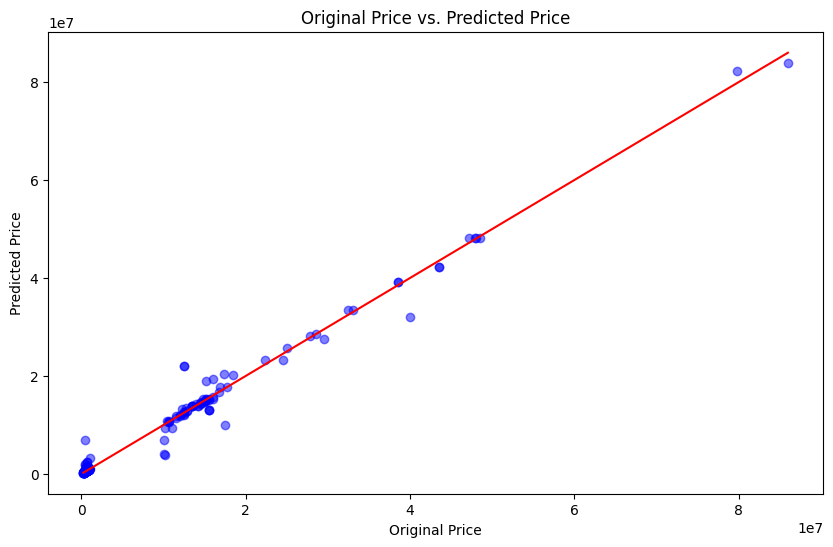

Mean Squared Error: 1170074295538.3174
R-squared: 0.9872459037644568
NMSE: 0.07590484028625721
Original Price   Predicted Price
10200000               9318965.0
15000000               14945000.0
15200000               15189833.333333332
470000               470000.0
355000               354225.8333333334
280000               286500.0
490000               485587.5
779000               731575.880952381
345000               353349.1666666666
500000               594700.0
530000               967442.0833333335
16900000               17726583.333333332
520000               533755.0
565000               939028.3333333333
310000               307307.5
720000               713450.0
490000               485587.5
830000               822650.0
415000               511700.0
500000               498660.0
810000               802200.0
625000               896075.0
735000               718050.0
519000               513070.0
700000               700190.0
690000               689700.0
480000           

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


def train_random_forest_from_csv(csv_file, target_column, columns_to_include, test_size=0.2, random_state=42):

    # Read data from CSV file
    df = pd.read_csv(csv_file)

    # Split data into features (X) and target variable (y)
    X = df[columns_to_include]
    y = df[target_column]

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize and train the Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=random_state)
    rf_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)

    # Calculate NMSE
    y_mean = y_test.mean()
    nmse = ((y_test - y_pred) ** 2).mean() / y_mean ** 2

    return mse, y_test, y_pred, nmse

# Example usage
# Specify the path to the CSV file and the target column
csv_file = 'cleaned_data.csv'
target_column = 'price'

# Specify the columns to include in the model
columns_to_include = ['rating', 'exterior & body', 'engine/transmission/clutch',
                     'suspension/steering','interior','ac/heater',
                      'company','variant','fuel type','model date','mileage']

# Call the function with the specified parameters
mse,y_test, y_pred, nmse = train_random_forest_from_csv(csv_file, target_column, columns_to_include)

# Plotting the original prices against the predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.title('Original Price vs. Predicted Price')
plt.xlabel('Original Price')
plt.ylabel('Predicted Price')
plt.show()



print('Mean Squared Error:', mse)
# Calculate R-squared (Coefficient of Determination)
r_squared = r2_score(y_test, y_pred)
print('R-squared:', r_squared)
print('NMSE:', nmse)


# Show predicted price and original price side by side
print('Original Price   Predicted Price')
for i in range(len(y_test)):
    print(f'{y_test.iloc[i]}               {y_pred[i]}')

**Simple Regression**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def train_linear_regression_from_csv(csv_file, target_column, columns_to_include, test_size=0.2, random_state=42):
    # Read data from CSV file
    df = pd.read_csv(csv_file)

    # Split data into features (X) and target variable (y)
    X = df[columns_to_include]
    y = df[target_column]

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize and train the Linear Regression model
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = lin_reg.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)

    # Calculate NMSE
    y_mean = y_test.mean()
    nmse = ((y_test - y_pred) ** 2).mean() / y_mean ** 2

    return mse, r_squared, y_test, y_pred,nmse

# Example usage
csv_file = 'cleaned_data.csv'
target_column = 'price'
columns_to_include = ['rating', 'exterior & body', 'engine/transmission/clutch',
                     'suspension/steering','interior','ac/heater',
                     'company','variant','fuel type','model date','mileage']

mse, r_squared, y_test, y_pred,nmse = train_linear_regression_from_csv(csv_file, target_column, columns_to_include)

print('Mean Squared Error:', mse)
print('R-squared:', r_squared)
print('NMSE:', nmse)

# Show predicted price and original price side by side
print('Original Price   Predicted Price')
for i in range(len(y_test)):
    print(f'{y_test.iloc[i]}               {y_pred[i]}')


Mean Squared Error: 71359810284698.47
R-squared: 0.22216060023570827
NMSE: 4.6292402313014245
Original Price   Predicted Price
10200000               7494899.428631544
15000000               5805547.26981619
15200000               8213017.426707968
470000               -241468.3685221076
355000               -757035.1977510303
280000               3346851.4449617267
490000               4440259.466860488
779000               8347405.558458507
345000               5100648.49627769
500000               1212767.8072010726
530000               8369544.030573219
16900000               12957947.72056523
520000               67991.4884390682
565000               2737261.62894322
310000               9641269.518204913
720000               -3541379.5425571054
490000               4440259.466860488
830000               1027245.1355301887
415000               6411328.997452617
500000               1138021.6346936077
810000               3075278.2458815277
625000               2022317.7810786366
7

**Support Vector Regression**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

def train_svr_from_csv(csv_file, target_column, columns_to_include, test_size=0.2, random_state=42):
    # Read data from CSV file
    df = pd.read_csv(csv_file)

    # Split data into features (X) and target variable (y)
    X = df[columns_to_include]
    y = df[target_column]

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize and train the Support Vector Regressor model
    svr = SVR(kernel='rbf')  # Radial Basis Function (RBF) kernel for non-linear relationships
    svr.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svr.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)

    # Calculate NMSE
    y_mean = y_test.mean()
    nmse = ((y_test - y_pred) ** 2).mean() / y_mean ** 2

    return mse, r_squared, y_test, y_pred,nmse

# Example usage
csv_file = 'cleaned_data.csv'
target_column = 'price'
columns_to_include = ['rating', 'exterior & body', 'engine/transmission/clutch',
                     'suspension/steering','interior','ac/heater',
                     'company','variant','fuel type','model date','mileage']

mse, r_squared, y_test, y_pred,nmse = train_svr_from_csv(csv_file, target_column, columns_to_include)

print('Mean Squared Error:', mse)
print('Mean Squared Error:', nmse)
print('R-squared:', r_squared)

# Show predicted price and original price side by side
print('Original Price   Predicted Price')
for i in range(len(y_test)):
    print(f'{y_test.iloc[i]}               {y_pred[i]}')


Mean Squared Error: 102573051452929.95
Mean Squared Error: 6.654099759218003
R-squared: -0.11807136896560744
Original Price   Predicted Price
10200000               634995.7947692062
15000000               634993.483267956
15200000               634994.8189395916
470000               634996.2196388931
355000               634995.6882018206
280000               634993.6915110922
490000               634996.3085770854
779000               634996.380377144
345000               634996.4545820552
500000               634992.9913970897
530000               635004.9248316736
16900000               634995.7317695543
520000               634996.9600654038
565000               635005.6132946856
310000               634996.9092763879
720000               634996.3317577054
490000               634996.3085770854
830000               634996.668707277
415000               634993.4353079051
500000               634995.3957556997
810000               634996.2401274613
625000               634997.150338

**Gradient Boosting Regressor**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

def train_gradient_boosting_regressor_from_csv(csv_file, target_column, columns_to_include, test_size=0.2, random_state=42):
    # Read data from CSV file
    df = pd.read_csv(csv_file)

    # Split data into features (X) and target variable (y)
    X = df[columns_to_include]
    y = df[target_column]

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize and train the Gradient Boosting Regressor model
    gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=random_state)
    gb_regressor.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = gb_regressor.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)

    # Calculate NMSE
    y_mean = y_test.mean()
    nmse = ((y_test - y_pred) ** 2).mean() / y_mean ** 2



    return mse, r_squared, y_test, y_pred,nmse

# Example usage
csv_file = 'cleaned_data.csv'
target_column = 'price'
columns_to_include = ['rating', 'exterior & body', 'engine/transmission/clutch',
                     'suspension/steering','interior','ac/heater',
                     'company','variant','fuel type','model date','mileage']

mse, r_squared, y_test, y_pred,nmse = train_gradient_boosting_regressor_from_csv(csv_file, target_column, columns_to_include)

print('Mean Squared Error:', mse)
print('R-squared:', r_squared)
print('NMSE',nmse)

# Show predicted price and original price side by side
print('Original Price   Predicted Price')
for i in range(len(y_test)):
    print(f'{y_test.iloc[i]}               {y_pred[i]}')


Mean Squared Error: 3294098223349.332
R-squared: 0.9640935230265868
NMSE 0.21369412223139167
Original Price   Predicted Price
10200000               3209257.769113926
15000000               11965206.423428956
15200000               16761317.634325134
470000               460064.27382234024
355000               245189.23002748573
280000               -242647.0129673386
490000               273583.45901302795
779000               4012649.962596579
345000               -67033.19159791687
500000               873880.007847781
530000               3949141.3234861144
16900000               14738884.066196837
520000               -457827.37881613703
565000               833109.7850907312
310000               1771810.1254087272
720000               1620747.2408877045
490000               273583.45901302795
830000               1380951.2595178455
415000               1018857.2214118595
500000               636792.1255631235
810000               -248990.31397660438
625000               70809.510

**Decision Tree Regressor**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

def train_decision_tree_regressor_from_csv(csv_file, target_column, columns_to_include, test_size=0.2, random_state=42):
    # Read data from CSV file
    df = pd.read_csv(csv_file)

    # Split data into features (X) and target variable (y)
    X = df[columns_to_include]
    y = df[target_column]

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize and train the Decision Tree Regressor model
    dt_regressor = DecisionTreeRegressor(random_state=random_state)
    dt_regressor.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = dt_regressor.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)

    # Calculate NMSE
    y_mean = y_test.mean()
    nmse = ((y_test - y_pred) ** 2).mean() / y_mean ** 2




    return mse, r_squared, y_test, y_pred,nmse

# Example usage
csv_file = 'cleaned_data.csv'
target_column = 'price'
columns_to_include = ['rating', 'exterior & body', 'engine/transmission/clutch',
                     'suspension/steering','interior','ac/heater',
                     'company','variant','fuel type','model date','mileage']

mse, r_squared, y_test, y_pred,nmse = train_decision_tree_regressor_from_csv(csv_file, target_column, columns_to_include)

print('Mean Squared Error:', mse)
print('R-squared:', r_squared)
print('NMSE',nmse)

# Show predicted price and original price side by side
print('Original Price   Predicted Price')
for i in range(len(y_test)):
    print(f'{y_test.iloc[i]}               {y_pred[i]}')


Mean Squared Error: 607977675342.2155
R-squared: 0.9933728945162332
NMSE 0.03944061374600938
Original Price   Predicted Price
10200000               10200000.0
15000000               15000000.0
15200000               15200000.0
470000               470000.0
355000               352500.0
280000               280000.0
490000               490000.0
779000               733400.0
345000               348333.3333333333
500000               500000.0
530000               525000.0
16900000               16700000.0
520000               520000.0
565000               575000.0
310000               310000.0
720000               720000.0
490000               490000.0
830000               830000.0
415000               415000.0
500000               500000.0
810000               810000.0
625000               625000.0
735000               680000.0
519000               519000.0
700000               700000.0
690000               690000.0
480000               480000.0
25000000               25500000.0
64000

**K-Nearest Neighbors Regressor (KNN)**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

def train_knn_regressor_from_csv(csv_file, target_column, columns_to_include, test_size=0.2, random_state=42, n_neighbors=5):
    # Read data from CSV file
    df = pd.read_csv(csv_file)

    # Split data into features (X) and target variable (y)
    X = df[columns_to_include]
    y = df[target_column]

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize and train the K-Nearest Neighbors Regressor model
    knn_regressor = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_regressor.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = knn_regressor.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)



        # Calculate NMSE
    y_mean = y_test.mean()
    nmse = ((y_test - y_pred) ** 2).mean() / y_mean ** 2

    return mse, r_squared, y_test, y_pred,nmse

# Example usage
csv_file = 'cleaned_data.csv'
target_column = 'price'
columns_to_include = ['rating', 'exterior & body', 'engine/transmission/clutch',
                     'suspension/steering','interior','ac/heater',
                     'company','variant','fuel type','model date','mileage']

mse, r_squared, y_test, y_pred,nmse = train_knn_regressor_from_csv(csv_file, target_column, columns_to_include)

print('Mean Squared Error:', mse)
print('R-squared:', r_squared)
print('NMSE',nmse)

# Show predicted price and original price side by side
print('Original Price   Predicted Price')
for i in range(len(y_test)):
    print(f'{y_test.iloc[i]}               {y_pred[i]}')


Mean Squared Error: 58497100146760.695
R-squared: 0.3623672893106785
NMSE 3.7948129112658187
Original Price   Predicted Price
10200000               4470000.0
15000000               6214000.0
15200000               6306000.0
470000               492000.0
355000               516600.0
280000               732000.0
490000               662000.0
779000               733400.0
345000               481000.0
500000               2476000.0
530000               500000.0
16900000               426000.0
520000               470000.0
565000               581000.0
310000               486900.0
720000               4590000.0
490000               662000.0
830000               847000.0
415000               6049000.0
500000               4162000.0
810000               678000.0
625000               7349000.0
735000               850000.0
519000               543200.0
700000               696000.0
690000               680000.0
480000               542000.0
25000000               20940000.0
640000        

**Artificial Neural Network (ANN)**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

def calculate_accuracy(y_true, y_pred, tolerance):
    correct_count = sum(abs(y_true - y_pred) <= tolerance)
    total_count = len(y_true)
    accuracy = (correct_count / total_count) * 100
    return accuracy

def train_ann_regressor_from_csv(csv_file, target_column, columns_to_include, test_size=0.2, random_state=42):
    # Read data from CSV file
    df = pd.read_csv(csv_file)

    # Split data into features (X) and target variable (y)
    X = df[columns_to_include]
    y = df[target_column]

    # Normalize features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize and train the MLPRegressor model
    ann_regressor = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=random_state)
    ann_regressor.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = ann_regressor.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)

        # Calculate NMSE
    y_mean = y_test.mean()
    nmse = ((y_test - y_pred) ** 2).mean() / y_mean ** 2

    return mse, r_squared, y_test, y_pred,nmse

# Example usage
csv_file = 'cleaned_data.csv'
target_column = 'price'
columns_to_include = ['rating', 'exterior & body', 'engine/transmission/clutch',
                     'suspension/steering','interior','ac/heater',
                     'company','variant','fuel type','model date','mileage']

mse, r_squared, y_test, y_pred,nmse = train_ann_regressor_from_csv(csv_file, target_column, columns_to_include)

print('Mean Squared Error:', mse)
print('R-squared:', r_squared)
print('NMSE',nmse)

percentage_margin = 0.1  # Define percentage error margin for accuracy calculation (e.g., 0.1 for 10%)
accuracy = calculate_accuracy(y_test, y_pred, percentage_margin)
print(f'Accuracy within {percentage_margin*100}% margin: {accuracy:.2f}%')

# Show predicted price and original price side by side
print('Original Price   Predicted Price')
for i in range(len(y_test)):
    print(f'{y_test.iloc[i]}               {y_pred[i]}')


Mean Squared Error: 103105547621976.86
R-squared: -0.12387570755417365
NMSE 6.688643750842016
Accuracy within 10.0% margin: 0.00%
Original Price   Predicted Price
10200000               625317.1549019227
15000000               534674.2565055873
15200000               448009.0416163626
470000               313.31399459912905
355000               313.31399459912905
280000               349859.77239807503
490000               561407.7623840268
779000               489334.82352279813
345000               13032.415086840312
500000               116028.49840816246
530000               212175.4777732612
16900000               876409.1904157278
520000               313.31399459912905
565000               65793.81394042721
310000               387053.0129655557
720000               313.31399459912905
490000               561407.7623840268
830000               293277.6685345956
415000               683304.2838736069
500000               46799.04558700202
810000               331620.15587366285
6

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


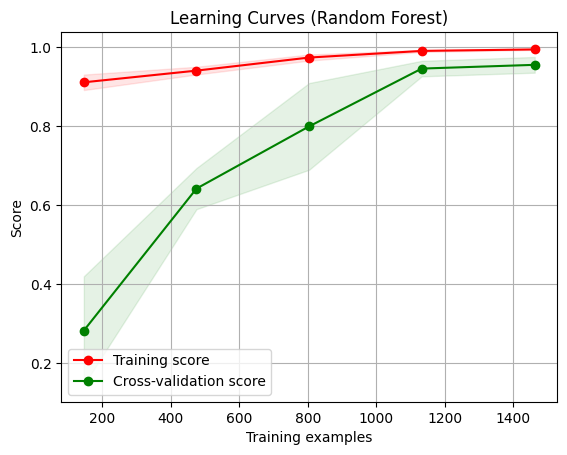

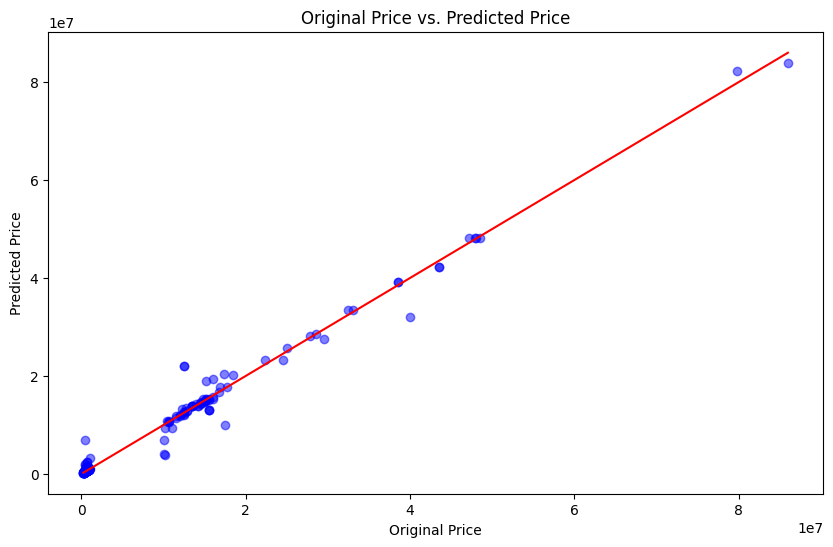

Mean Squared Error: 1170074295538.3174
R-squared: 0.9872459037644568
NMSE: 0.07590484028625721
Original Price   Predicted Price
10200000               9318965.0
15000000               14945000.0
15200000               15189833.333333332
470000               470000.0
355000               354225.8333333334
280000               286500.0
490000               485587.5
779000               731575.880952381
345000               353349.1666666666
500000               594700.0
530000               967442.0833333335
16900000               17726583.333333332
520000               533755.0
565000               939028.3333333333
310000               307307.5
720000               713450.0
490000               485587.5
830000               822650.0
415000               511700.0
500000               498660.0
810000               802200.0
625000               896075.0
735000               718050.0
519000               513070.0
700000               700190.0
690000               689700.0
480000           

In [ ]:
import numpy as np

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

def train_random_forest_from_csv(csv_file, target_column, columns_to_include, test_size=0.2, random_state=42):
    # Read data from CSV file
    df = pd.read_csv(csv_file)

    # Split data into features (X) and target variable (y)
    X = df[columns_to_include]
    y = df[target_column]

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Initialize and train the Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=random_state)
    rf_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)

    # Calculate NMSE
    y_mean = y_test.mean()
    nmse = ((y_test - y_pred) ** 2).mean() / y_mean ** 2

    # Plot learning curve
    title = "Learning Curves (Random Forest)"
    plot_learning_curve(rf_model, title, X_train, y_train, cv=5, n_jobs=-1)

    return mse, y_test, y_pred, nmse

# Example usage
# Specify the path to the CSV file and the target column
csv_file = 'cleaned_data.csv'
target_column = 'price'

# Specify the columns to include in the model
columns_to_include = ['rating', 'exterior & body', 'engine/transmission/clutch',
                     'suspension/steering','interior','ac/heater',
                      'company','variant','fuel type','model date','mileage']

# Call the function with the specified parameters
mse,y_test, y_pred, nmse = train_random_forest_from_csv(csv_file, target_column, columns_to_include)

# Plotting the original prices against the predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.title('Original Price vs. Predicted Price')
plt.xlabel('Original Price')
plt.ylabel('Predicted Price')
plt.show()

print('Mean Squared Error:', mse)
# Calculate R-squared (Coefficient of Determination)
r_squared = r2_score(y_test, y_pred)
print('R-squared:', r_squared)
print('NMSE:', nmse)

# Show predicted price and original price side by side
print('Original Price   Predicted Price')
for i in range(len(y_test)):
    print(f'{y_test.iloc[i]}               {y_pred[i]}')


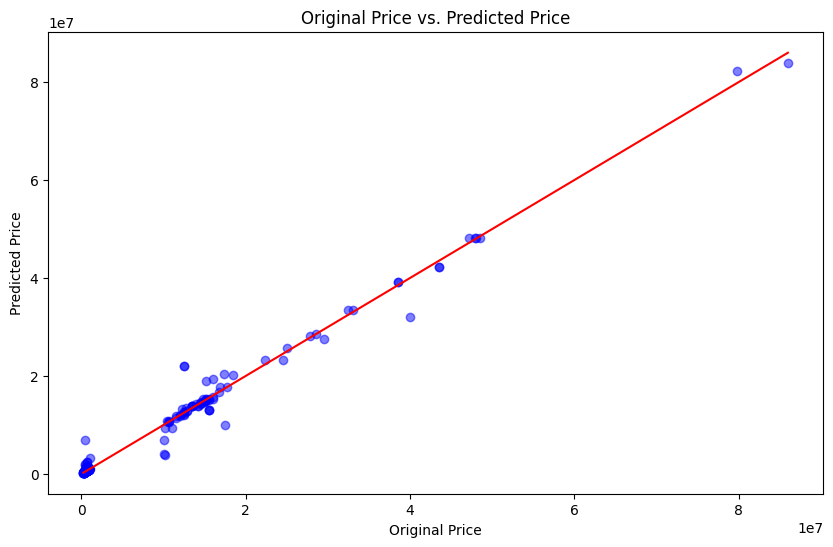

Mean Squared Error: 1170074295538.3174
R-squared: 0.9872459037644568
NMSE: 0.07590484028625721


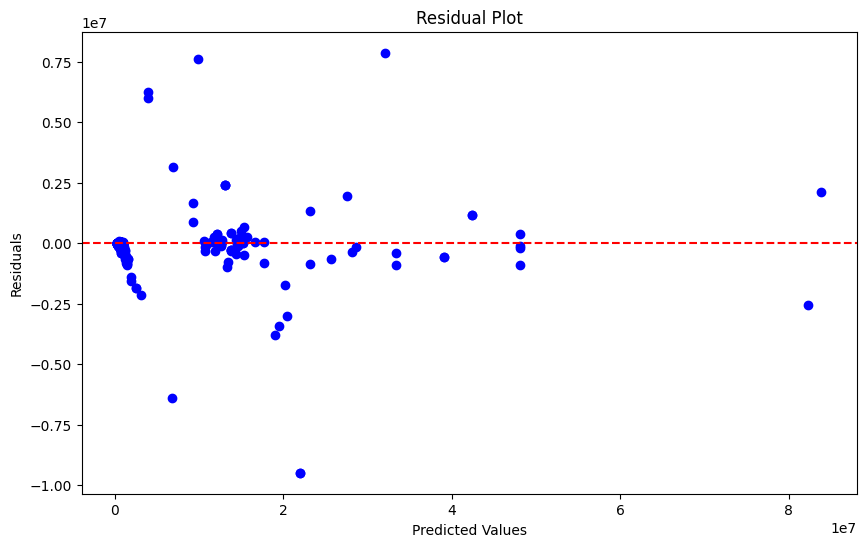

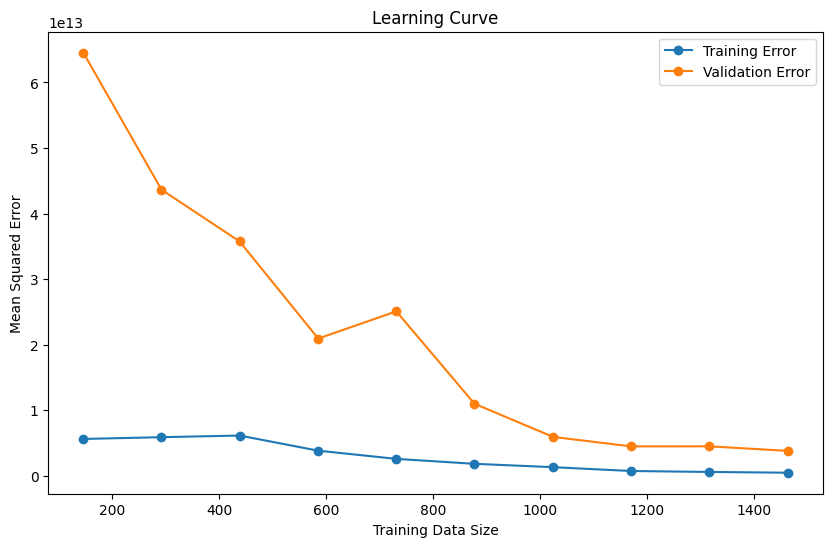

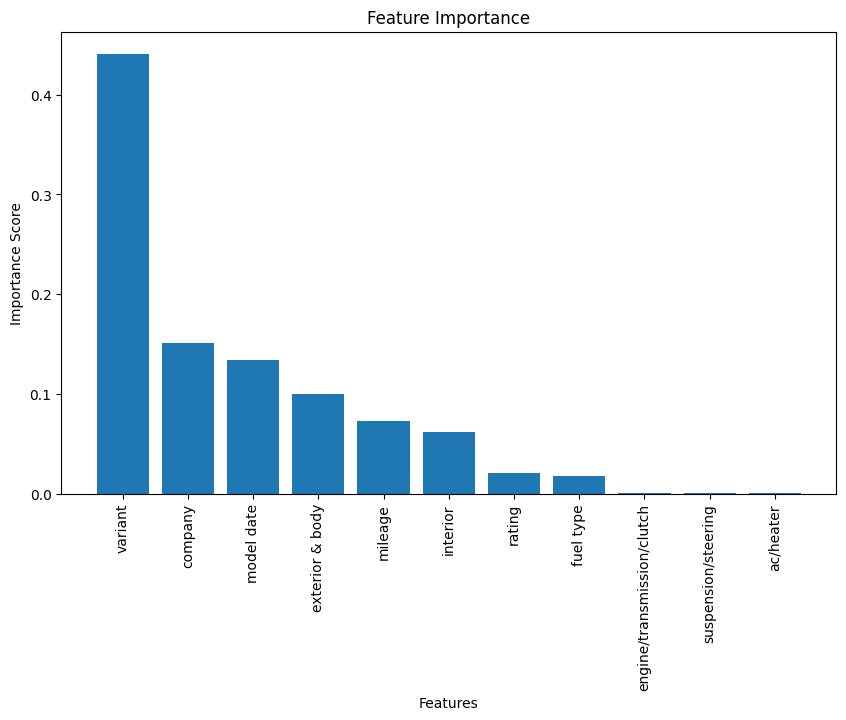

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the Random Forest model outside the function
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

def train_random_forest_from_csv(csv_file, target_column, columns_to_include, test_size=0.2, random_state=42):

    # Read data from CSV file
    df = pd.read_csv(csv_file)

    # Split data into features (X) and target variable (y)
    X = df[columns_to_include]
    y = df[target_column]

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Train the Random Forest model
    rf_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)

    # Calculate NMSE
    y_mean = y_test.mean()
    nmse = ((y_test - y_pred) ** 2).mean() / y_mean ** 2

    return mse, y_test, y_pred, nmse, X_train, y_train

# Example usage
# Specify the path to the CSV file and the target column
csv_file = 'cleaned_data.csv'
target_column = 'price'

# Specify the columns to include in the model
columns_to_include = ['rating', 'exterior & body', 'engine/transmission/clutch',
                     'suspension/steering','interior','ac/heater',
                      'company','variant','fuel type','model date','mileage']

# Call the function with the specified parameters
mse, y_test, y_pred, nmse, X_train, y_train = train_random_forest_from_csv(csv_file, target_column, columns_to_include)

# Plotting the original prices against the predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.title('Original Price vs. Predicted Price')
plt.xlabel('Original Price')
plt.ylabel('Predicted Price')
plt.show()

print('Mean Squared Error:', mse)
# Calculate R-squared (Coefficient of Determination)
r_squared = r2_score(y_test, y_pred)
print('R-squared:', r_squared)
print('NMSE:', nmse)

# Residual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test - y_pred, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(estimator=rf_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error')
train_errors_mean = -np.mean(train_scores, axis=1)
test_errors_mean = -np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors_mean, label='Training Error', marker='o')
plt.plot(train_sizes, test_errors_mean, label='Validation Error', marker='o')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


# Feature Importance
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = [columns_to_include[i] for i in sorted_idx]

plt.figure(figsize=(10, 6))
plt.bar(range(len(columns_to_include)), feature_importance[sorted_idx], align='center')
plt.xticks(range(len(columns_to_include)), sorted_features, rotation=90)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


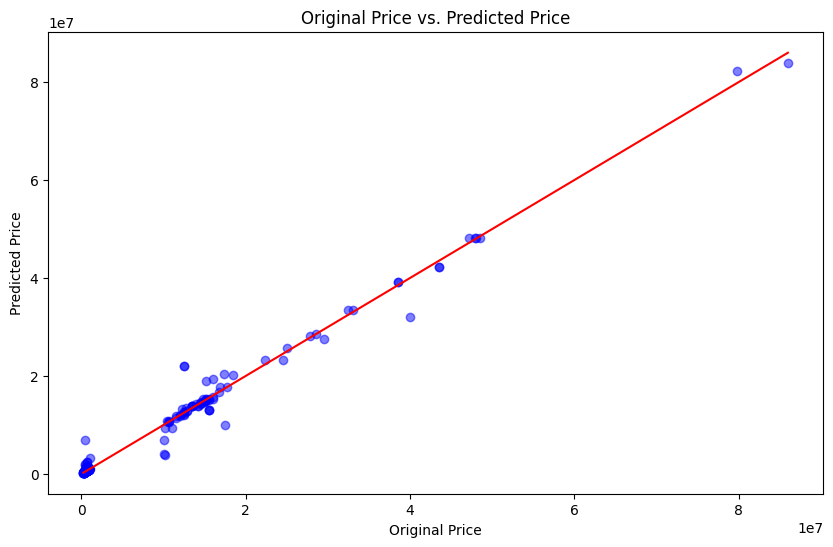

Mean Squared Error: 1170074295538.3174
R-squared: 0.9872459037644568
NMSE: 0.07590484028625721


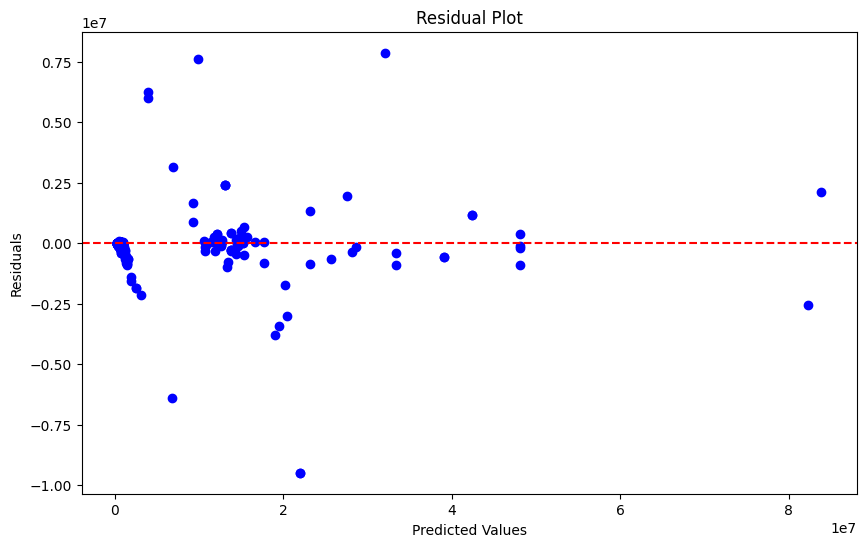

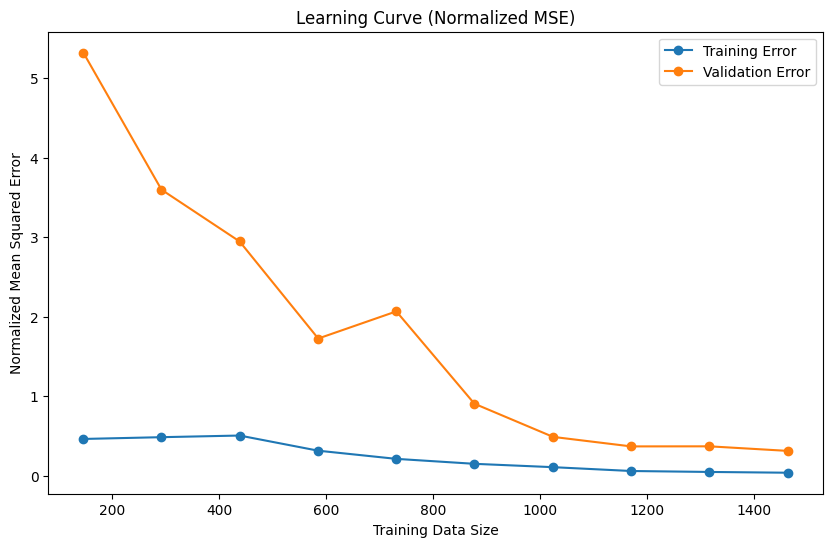

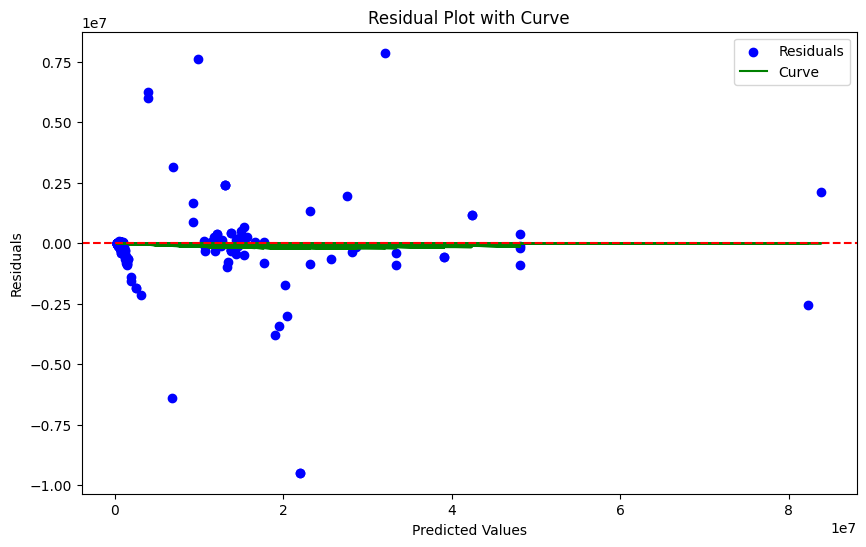

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the Random Forest model outside the function
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

def train_random_forest_from_csv(csv_file, target_column, columns_to_include, test_size=0.2, random_state=42):

    # Read data from CSV file
    df = pd.read_csv(csv_file)

    # Split data into features (X) and target variable (y)
    X = df[columns_to_include]
    y = df[target_column]

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Train the Random Forest model
    rf_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)

    # Calculate NMSE
    y_mean = y_test.mean()
    nmse = ((y_test - y_pred) ** 2).mean() / y_mean ** 2

    return mse, y_test, y_pred, nmse, X_train, y_train

# Example usage
# Specify the path to the CSV file and the target column
csv_file = 'cleaned_data.csv'
target_column = 'price'

# Specify the columns to include in the model
columns_to_include = ['rating', 'exterior & body', 'engine/transmission/clutch',
                     'suspension/steering','interior','ac/heater',
                      'company','variant','fuel type','model date','mileage']

# Call the function with the specified parameters
mse, y_test, y_pred, nmse, X_train, y_train = train_random_forest_from_csv(csv_file, target_column, columns_to_include)

# Plotting the original prices against the predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.title('Original Price vs. Predicted Price')
plt.xlabel('Original Price')
plt.ylabel('Predicted Price')
plt.show()

print('Mean Squared Error:', mse)
# Calculate R-squared (Coefficient of Determination)
r_squared = r2_score(y_test, y_pred)
print('R-squared:', r_squared)
print('NMSE:', nmse)

# Residual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test - y_pred, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(estimator=rf_model, X=X_train, y=y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error')
train_errors_mean = -np.mean(train_scores, axis=1)
test_errors_mean = -np.mean(test_scores, axis=1)

# Normalize mean squared errors
train_errors_mean /= np.mean(y_train) ** 2
test_errors_mean /= np.mean(y_train) ** 2


